In [1]:
# interactive figure
%matplotlib widget

# auto reload modules
%load_ext autoreload
%autoreload 2

import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import matplotlib.ticker as plticker
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import xarray as xr
import sca_osbl_tool as sot
from plt_tool import plot_regime_diagram, plot_regime_diagram_LaSL, plot_SL_regime_diagram, plot_pdf_contour, plot_SL_prod, \
                     plot_Lat2_hLL, add_legend, add_colorbar, mcolor_line, plot_LObukhov, plot_sbf, \
                     plot_float_traj, plot_binstat, plot_binprof, multiline
from sys import platform
from scipy import signal, stats
from constants import kappa, dnum_unit, nan, pi,g 
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%run ./Tools/load_font_cmap.py
plt.style.use('./Tools/paper.mplstyle') # load figure style

### Load float data sets

In [2]:
if platform == 'linux':
    data_root = '/media/zhihua/internal1/GDrive/UW/Research/Data/'
elif platform == 'darwin':
    data_root = '/Users/zhihua/Documents/Work/Research/Projects/PhD-projects/Data/'
outfig_dir = '/Users/zhihua/Documents/Work/Research/Projects/PhD-projects/OSBL_w_scaling/Figures/'
bool_fill = {'Iequil': False, 'Ishoal': False, 'Ideepen': False, 'ifr': False, 'ifl': False}

ustar_min = 8e-3

P11 = xr.open_dataset(data_root+'OCSP/NBF/OCSP_dftb_wave_2011dw.nc').load()
P11.close()
P11.attrs['color'] = 'xkcd:melon'
P11['maskSL'] = (P11.zoh >= -0.2) & (P11.ustar >= ustar_min) #& (P11.Iequil) #& (P11.SSP > 0)# & (P11.mz < P11.zb) #& (P11.LaSL2 > 0) #& (P11.Lat2 > 0) #
P11['maskUSL'] = P11.maskSL & (P11.zeta < 0)
P11['maskSSL'] = P11.maskSL & (P11.zeta > 0)
P11['maskBL'] = (P11.zoh >= -1.05) & (P11.ustar >= ustar_min)

P12 = xr.open_dataset(data_root+'OCSP/NBF/OCSP_dftb_wave_2012dw.nc').load()
P12.close()
P12.attrs['color'] = 'xkcd:reddish'
P12['maskSL'] = (P12.zoh >= -0.2) & (P12.ustar >= ustar_min) #& (P12.Iequil) #& (P12.SSP > 0) # & (P12.mz < P12.zb) #& (P12.LaSL2 > 0) #& (P12.Lat2 > 0) #
P12['maskUSL'] = P12.maskSL & (P12.zeta < 0)
P12['maskSSL'] = P12.maskSL & (P12.zeta > 0)
P12['maskBL'] = (P12.zoh >= -1.05) & (P12.ustar >= ustar_min)

lwa71 = xr.open_dataset(data_root+'LakeWA/NBF/LKWA_dftb_wave_71.nc').load()
lwa71.close()
lwa72 = xr.open_dataset(data_root+'LakeWA/NBF/LKWA_dftb_wave_72.nc').load()
lwa72.close()
Lwa = xr.concat((lwa71, lwa72), 'ID', fill_value=bool_fill)
Lwa = Lwa.assign_coords(ID=('ID', [71,72]))
Lwa.attrs['color'] = 'xkcd:teal'
Lwa['maskSL'] = (Lwa.zoh >= -0.2) & (Lwa.ustar >= ustar_min) #& (Lwa.Iequil) #& (Lwa.SSP > 0) # & (Lwa.mz < Lwa.zb) #& (Lwa.LaSL2 > 0) #& (Lwa.Lat2 > 0) #
Lwa['maskUSL'] = Lwa.maskSL & (Lwa.zeta < 0)
Lwa['maskSSL'] = Lwa.maskSL & (Lwa.zeta > 0)
Lwa['maskBL'] = (Lwa.zoh >= -1.05) & (Lwa.ustar >= ustar_min)

L97 = xr.open_dataset(data_root+'LabSea/NBF/LabSea_dftb_wave_1997.nc').load()
L97.close()
L97.attrs['color'] = 'xkcd:burple'
L97['maskSL'] = (L97.zoh >= -0.2) & (L97.ustar >= ustar_min) #& (L97.Iequil) #& (L97.SSP > 0) & (L97.mz < L97.zb) & (L97.LaSL2 > 0) #& (L97.Lat2 > 0) #
L97['maskUSL'] = L97.maskSL & (L97.zeta < 0)
L97['maskSSL'] = L97.maskSL & (L97.zeta > 0)
L97['maskBL'] = (L97.zoh >= -1.05) & (L97.ustar >= ustar_min)

L97E = xr.open_dataset(data_root+'LabSea/NBF/LabSea_dftb_wave_1997E.nc').load()
L97E.close()
L97E.attrs['color'] = 'xkcd:burple'
L97E['maskSL'] = (L97E.zoh >= -0.2) & (L97E.ustar >= ustar_min) #& (L97E.Iequil) #& (L97E.SSP > 0) #& (L97E.mz < L97E.zb) & (L97E.LaSL2 > 0) #& (L97E.Lat2 > 0) #
L97E['maskUSL'] = L97E.maskSL & (L97E.zeta < 0)
L97E['maskSSL'] = L97E.maskSL & (L97E.zeta > 0)
L97E['maskBL'] = (L97E.zoh >= -1.05) & (L97E.ustar >= ustar_min)

# L98 = xr.open_dataset(data_root+'LabSea/NBF/LabSea_dftb_wave_1998.nc').load()
# L98.close()
# L98.attrs['color'] = 'xkcd:liliac'
# L98['maskSL'] = (L98.zoh >= -0.2)#& (L98.Iequil) & (L98.wfs > 1e-3) & (L98.mz < L98.zb) & (L98.SSP > 0)
# L98['maskUSL'] = L98.maskSL & (L98.zeta < 0)
# L98['maskSSL'] = L98.maskSL & (L98.zeta > 0)

/Users/zhihua/miniconda3/envs/scaOSBL/lib/python3.8/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/zhihua/miniconda3/envs/scaOSBL/lib/python3.8/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/zhihua/miniconda3/envs/scaOSBL/lib/python3.8/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
/Users/zhihua/miniconda3/envs/scaOSBL/lib/python3.8/site-packages/xarray/coding/times.py:242: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [3]:
tau_opt = 'APL'
fan60 = xr.open_dataset(data_root+f'Hurricanes/ITOP/NBF/Fanapi_dftb_wave_60_{tau_opt}.nc').load()
fan60.close()
fan61 = xr.open_dataset(data_root+f'Hurricanes/ITOP/NBF/Fanapi_dftb_wave_61_{tau_opt}.nc').load()
fan61.close()
fan62 = xr.open_dataset(data_root+f'Hurricanes/ITOP/NBF/Fanapi_dftb_wave_62_{tau_opt}.nc').load()
fan62.close()
fan64 = xr.open_dataset(data_root+f'Hurricanes/ITOP/NBF/Fanapi_dftb_wave_64_{tau_opt}.nc').load()
fan64.close()
Fan = xr.concat((fan60, fan61, fan62, fan64), 'ID', fill_value=bool_fill)
Fan = Fan.assign_coords(ID=('ID', [60,61,62,64]))
Fan.attrs['color'] = 'xkcd:sky blue'
Fan['maskSL'] = (Fan.zoh >= -0.2) & (Fan.ustar >= ustar_min) #& (Fan.Iequil) #& (Fan.SSP > 0) #& (Fan.mz < Fan.zb) #& (Fan.LaSL2 > 0) #& (Fan.Lat2 > 0)#
Fan['maskUSL'] = Fan.maskSL & (Fan.zeta < 0)
Fan['maskSSL'] = Fan.maskSL & (Fan.zeta > 0)
Fan['maskBL'] = (Fan.zoh >= -1.05) & (Fan.ustar >= ustar_min)

# maskSL_Fr = (Fan.zoh >= -0.2)& (Fan.Iequil) & (Fan.wfs > 1e-3) & (Fan.ifr) & (Fan.mz < Fan.zb) & (Fan.SSP > 0)

In [4]:
P11['nqs'] = 2*P11.bld/np.sqrt(P11.wf2bulk*P11.cfac2)/1 # dt=1s
P12['nqs'] = 2*P12.bld/np.sqrt(P12.wf2bulk*P12.cfac2)/1
Lwa['nqs'] = 2*Lwa.bld/np.sqrt(Lwa.wf2bulk*Lwa.cfac2)/1
Fan['nqs'] = 2*Fan.bld/np.sqrt(Fan.wf2bulk*Fan.cfac2)/1
L97['nqs'] = 2*L97.bld/np.sqrt(L97.wf2bulk*L97.cfac2)/300 # dt=5min
L97E['nqs'] = 2*L97E.bld/np.sqrt(L97E.wf2bulk*L97E.cfac2)/300 # dt=5min
# L98['nqs'] = 2*L98.bld/np.sqrt(L98.wf2bulk*L98.cfac2)/300 # dt=5min

# time_split = pd.Timestamp('2011-04-15')
# P11nqsm = xr.where(P11.time<time_split, P11.nqs.where(P11.time<time_split).mean(), 
#                    P11.nqs.where(P11.time>=time_split).mean())
# Pnqsm = xr.merge((P11.nqs,P12.nqs)).mean().nqs

P11['ne'] = P11.n/P11.nqs.mean()
P12['ne'] = P12.n/P12.nqs.mean()
Lwa['ne'] = Lwa.n/Lwa.nqs.mean()
Fan['ne'] = Fan.n/Fan.nqs.mean()
L97['ne'] = L97.n/L97.nqs.mean()
L97E['ne'] = L97E.n/L97E.nqs.mean()
# L98['ne'] = L98.n/L98.nqs.mean()

In [109]:
np.percentile(P12.bld.where((P12.ustar >= ustar_min) & (P12.LaSL2 > 0)).dropna('time'), 0)

9.55996609750101

In [8]:
np.percentile(L97.bld.where((L97.ustar >= ustar_min) & (L97.LaSL2 > 0)).stack(z=('time','ID')).dropna('z'), 100)

1204.1997727353057

In [14]:
L97.bld.where((L97.ustar >= ustar_min) & (L97.LaSL2 > 0)).mean('ID').mean()

<xarray.DataArray 'bld' ()>
array(822.75973445)

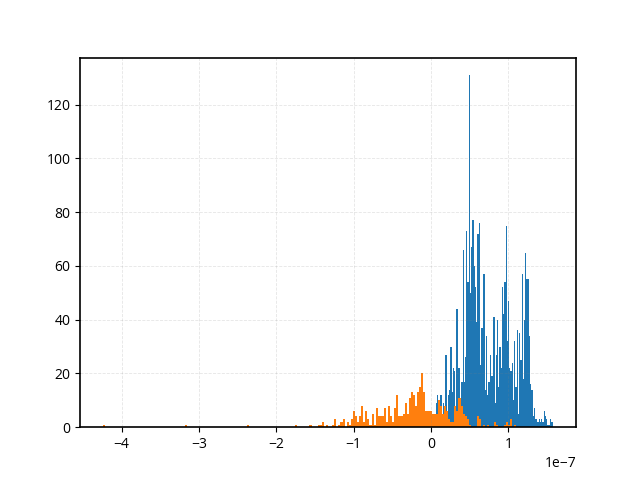

In [5]:
plt.close()
plt.figure()

plt.hist(L97.wbf.where((L97.ustar >= ustar_min) & (L97.LaSL2 > 0)).data.ravel(),100);
plt.hist(P12.wbf.where((P12.ustar >= ustar_min) & (P12.LaSL2 > 0)),200);

In [5]:
P11['mu'] = P11.SSP/np.sqrt(P11.ESP**2 + P11.BFsl**2)
P12['mu'] = P12.SSP/np.sqrt(P12.ESP**2 + P12.BFsl**2)
L97['mu'] = L97.SSP/np.sqrt(L97.ESP**2 + L97.BFsl**2)
Lwa['mu'] = Lwa.SSP/np.sqrt(Lwa.ESP**2 + Lwa.BFsl**2)
Fan['mu'] = Fan.SSP/np.sqrt(Fan.ESP**2 + Fan.BFsl**2)

In [6]:
P11['mue'] = P11.SSP*P11.spf/np.sqrt(P11.ESP**2 + P11.BFsl**2)
P12['mue'] = P12.SSP*P12.spf/np.sqrt(P12.ESP**2 + P12.BFsl**2)
L97['mue'] = L97.SSP*L97.spf/np.sqrt(L97.ESP**2 + L97.BFsl**2)
Lwa['mue'] = Lwa.SSP*Lwa.spf/np.sqrt(Lwa.ESP**2 + Lwa.BFsl**2)
Fan['mue'] = Fan.SSP*Fan.spf/np.sqrt(Fan.ESP**2 + Fan.BFsl**2)

In [7]:
P11['et'] = P11.SSP/P11.ESP
P12['et'] = P12.SSP/P12.ESP
L97['et'] = L97.SSP/L97.ESP
Lwa['et'] = Lwa.SSP/Lwa.ESP
Fan['et'] = Fan.SSP/Fan.ESP

In [8]:
P11['ete'] = P11.SSP*P11.spf/P11.ESP
P12['ete'] = P12.SSP*P12.spf/P12.ESP
L97['ete'] = L97.SSP*L97.spf/L97.ESP
Lwa['ete'] = Lwa.SSP*Lwa.spf/Lwa.ESP
Fan['ete'] = Fan.SSP*Fan.spf/Fan.ESP

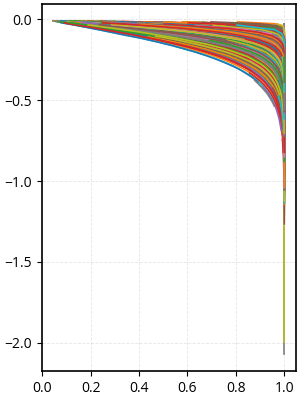

In [114]:
plt.close()
plt.figure(figsize=(3,4), constrained_layout=True)
# plt.plot(Fan.time, Fan.theta_ww.T/pi*180);
# plt.plot(Lwa.time, np.sqrt(Lwa.LaSL2).T);
# plt.ylim(0,3);
# plt.plot(Lwa.time, Lwa.ustar.T);
# plt.plot(Lwa.time, Lwa.Uscw_SL.T);

plt.plot(P11.spf.T, P11.zoh.T);
# plt.plot(P12.time, P12.mz.where(P12.maskSL), '.k');
# plt.plot(P11.myd, (P11.theta_tau + np.arctan2(P11.Uscw_SL, P11.ustar/P11.LaSL2))/pi*180);
# plt.plot(P11.myd, P11.ustar);
# plt.plot(P11.myd, np.sqrt((P11.ustar/P11.LaSL2)**2 + P11.Uscw_SL**2));


In [9]:
def Chimfunc(xi):
    if xi >= 0.72:
        Chimfunc = 1.05 - 2.43*0.72 + 1.69*0.72**2
    elif xi >= 0.35:
        Chimfunc = 1.05 - 2.43*xi + 1.69*xi**2
    else:
        Chim0 = 1.05 - 2.43*0.35 + 1.69*0.35**2
        Chimfunc = Chim0 + (0.35-xi)*(1-Chim0)/0.35
    return Chimfunc

def ChimEq(Chim):
    Ps = 0.5
    Lat = 0.3
    z0 = 0.2
    xi = Ps*Lat**(-2)/(0.94*Chim/0.4*(np.log(69/10/z0)-1/10) + 0.09*0.84 + Ps*Lat**(-2))
    return Chimfunc(xi) - Chim

### Figure 1: Example for float data processing 

In [3]:
demo = P11.copy()

demof = xr.open_dataset(data_root+'OCSP/NBF/OCSP_drifts_2011.nc').load()
demof.close()
demof['LObukhov'] = demo.LObukhov.interp(time=demof.time, method='nearest')

demoe = xr.open_dataset(data_root+'OCSP/NBF/OCSP_env_2011.nc').load()
demoe.close()

demoh = xr.open_dataset(data_root+'OCSP/NBF/OCSP_bld_2011.nc').load()
demoh.close()

demoF = xr.open_dataset(data_root+'OCSP/Mooring/2011_high_res/fluxes/OCSP_fluxes_2011.nc').load()
demoF.close()

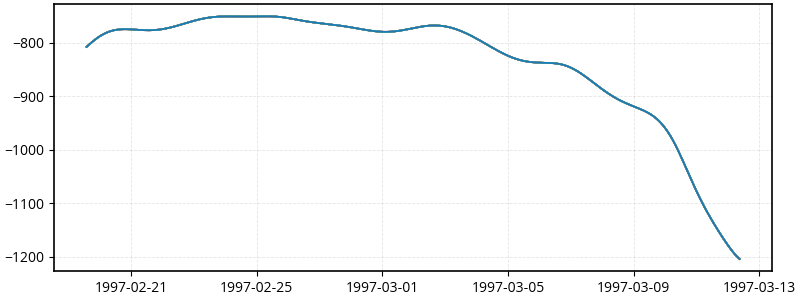

In [7]:
plt.close()
plt.figure(figsize=(8,3), constrained_layout=True)
# plt.plot(P11.time, P11.theta_ww/pi*180);
# plt.ylim(-3,3);

# plt.hist(P11.theta_ww.where(P11.theta_ww.notnull(),drop=True)/pi*180,60,density=True,alpha=0.5);
# plt.hist(P12.theta_ww.where(P12.theta_ww.notnull(),drop=True)/pi*180,60,density=True,alpha=0.5);
# plt.hist(Lwa.theta_ww.where(Lwa.theta_ww.notnull(),drop=True).data.ravel()/pi*180,60,density=True,alpha=0.5);
# plt.hist(L97.theta_ww.where(L97.theta_ww.notnull(),drop=True).data.ravel()/pi*180,60,density=True,alpha=0.5);
# plt.hist(Fan.theta_ww.where(Fan.theta_ww.notnull(),drop=True).data.ravel()/pi*180,60,density=True,alpha=0.5);
plt.plot(L97.time, -L97.bld.T);

# plt.hist(P11.xi,200,density=True);
# plt.hist(P12.xi,200,density=True);

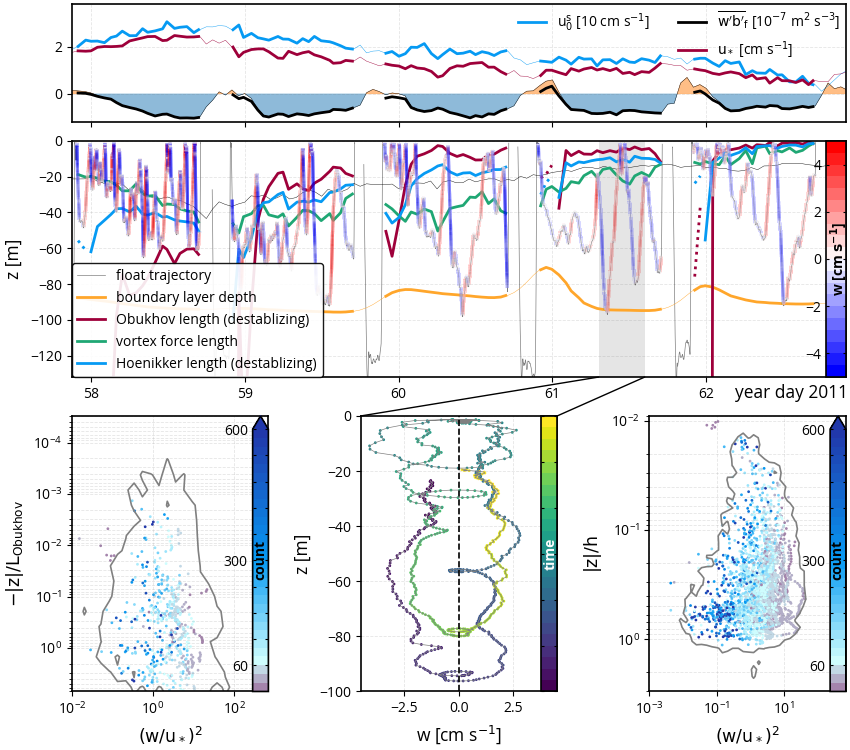

In [25]:
plt.close()
fig = plt.figure(figsize=(8.5,7.5), constrained_layout=True)

spec = fig.add_gridspec(16,3)
ax0 = fig.add_subplot(spec[:3, :])
ax0.plot(sot.pytime2yd(demo.time), 100*demo.ustar2**(1/2)/(demo.Lat2)/10, c='xkcd:azure', lw=0.3, label='_nolegend_')
ax0.plot(demo.myd, 100*demo.ustar2**(1/2)/(demo.Lat2)/10, c='xkcd:azure', lw=2, label=r'u$^s_0$ [10 cm s$^{-1}$]')
plot_sbf(sot.pytime2yd(demo.time), 1e7*demo.Bf, axis=ax0, label='_nolegend_')
ax0.plot(demo.myd, -1e7*demo.wbf, 'k', lw=2, label=r"$\overline{w'b'}_f$ [10$^{-7}$ m$^2$ s$^{-3}$]")
ax0.plot(demoF.yd, 1e2*demoF.ustar.squeeze(), c='xkcd:cranberry', lw=0.3, label='_nolegend_')
ax0.plot(demo.myd, 1e2*demo.ustar2**(1/2), c='xkcd:cranberry', lw=2, label=r'$u_*$ [cm s$^{-1}$]')
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_ylim(-1.2, 3.8)
(lines,labels) = ax0.get_legend_handles_labels()
lines.insert(1, plt.Line2D([], [], alpha=0))
labels.insert(1, '')
plt.legend(lines, labels, fontsize=10, frameon=False, loc='upper right', bbox_to_anchor=(1,1), 
           borderaxespad=0, ncol=2)


ax1 = fig.add_subplot(spec[3:9, :], sharex=ax0)
ax1.axvspan(61.3, 61.6, color='gray', alpha=0.2, ec='none')
lfloat, = plot_float_traj(demoe.ydP, -demoe.Pc, axis=ax1, lw=0.5, c='k', alpha=0.5)
ax1.plot(sot.pytime2yd(demo.time), -demo.bld, c='xkcd:mango', lw=0.3)
ax1.plot(sot.pytime2yd(demo.time), demo.zt, c='k', lw=0.3)
lbld, = ax1.plot(demo.myd, -demo.bld, c='xkcd:mango', lw=2)
lLOb = plot_LObukhov(demo.myd, demo.LOb, axis=ax1, c='xkcd:cranberry', lw=2)
lLss = plot_LObukhov(demo.myd, -demo.Lss, axis=ax1, c='xkcd:jade', lw=2)
lLHo = plot_LObukhov(demo.myd, demo.LHo, axis=ax1, c='xkcd:azure', lw=2)
for i in range(20,25):
    mask_id = demof.drift==i
    zw = mcolor_line(demof.yd.where(mask_id), demof.z.where(mask_id), 100*demof.wf.where(mask_id), 
                     crange=(-5,5), axis=ax1, cmap='bwr', cs_type='div', linewidths=2.2)
mask_ids = demof.drift.isin(range(20,25))
demof_ids = demof.where(mask_ids, drop=True)
ax1.set(xlim=(demof_ids.yd[0]-0.03, demof_ids.yd[-1]+0.2), ylim=(-132, 0), 
        xlabel='year day 2011', ylabel='z [m]')
ax1.xaxis.set_label_coords(0.93, -0.03)
ax1.legend([lfloat, lbld, lLOb[1], lLss[1], lLHo[1]],
           ['float trajectory', 'boundary layer depth', 
            'Obukhov length (destablizing)',
            'vortex force length', 'Hoenikker length (destablizing)'],
           fontsize=10, framealpha=0.9, loc='lower left', bbox_to_anchor=(0,0), borderaxespad=0, 
           edgecolor='k', handler_map={tuple: HandlerTuple(ndivide=None)});
add_colorbar(ax1, zw, r'w [cm $\bf{s^{-1}}$]', labelpad=-12.2)


ax2 = fig.add_subplot(spec[9:, 0])
mask_sl = (demo.zoLOb<0) & (demo.zoh>=-0.2) & demo.Iequil & (demo.wfs > 5e-3)
hist, xi, yi,_,_ = sot.loglog_hist2d(np.log10(demo.wf2our2.where(mask_sl)), np.log10(-demo.zoLOb.where(mask_sl)),
                                 weights=(np.log10(demo.n.where(mask_sl))), xpr=[-2, 2.5], ypr=[-5, 1.5], bins=22)
plot_pdf_contour(hist, xi, yi, levels=[0.99], axis=ax2, colors='gray', linestyles='-')
mask_sl_ids = mask_sl & demo.drift.isin(range(20,25))
scat_sl = ax2.scatter(demo.wf2our2.where(mask_sl_ids), -demo.zoLOb.where(mask_sl_ids), 1, demo.n.where(mask_sl_ids), 
            cmap=cm.get_cmap('nl_count',30), vmin=0, vmax=600)
count_label = ['']*10
for i in [0, 4, 9]:
    count_label[i] = f'{60*(i+1)}'
add_colorbar(ax2, scat_sl, 'count', labelpad=-10.8, pos=(0.92, 0, 0.08, 1), extend='max', 
             ticks=60*np.arange(1,11), ticklabel=count_label)
ax2.set(xscale='log', yscale='log', xlim=(1e-2,7e2), ylim=(7e0,3e-5), 
        xlabel=r'$(w/u_*)^2$', ylabel=r'$-|z|/L_{Obukhov}$')


ax3 = fig.add_subplot(spec[9:, 1])
mask_traj = (demof.drift==23) & (demof.yd>=61.3) & (demof.yd<=61.6)
ax3.plot(100*demof.wf.where(mask_traj)[::30], demof.z.where(mask_traj)[::30], c='gray', lw=0.5)
traj = ax3.scatter(100*demof.wf.where(mask_traj)[::30], demof.z.where(mask_traj)[::30], 
                   1, demof.yd.where(mask_traj)[::30],
                   cmap=cm.get_cmap('viridis', 24), vmin=61.3, vmax=61.6)
add_colorbar(ax3, traj, 'time', labelc='w', labelpad=-10, pos=(0.92, 0, 0.08, 1), labelL=False)
ax3.axvline(0, ls='--', c='k')
ax3.set(xlim=(-4.5,4.5), ylim=(-100,0), xlabel='w [cm s$^{-1}$]', ylabel='z [m]')


ax4 = fig.add_subplot(spec[9:, 2])
mask_bl = (np.abs(P11.zeta/P11.zoh)<10) & demo.Iequil & (demo.wfs > 5e-3)
hist, xi, yi,_,_ = sot.loglog_hist2d(np.log10(demo.wf2our2.where(mask_bl)), np.log10(-demo.zoh.where(mask_bl)),
                                 weights=(np.log10(demo.n.where(mask_bl))), xpr=[-4, 2.5], ypr=[-2.2, 0.5], bins=42)
plot_pdf_contour(hist, xi, yi, levels=[0.99], axis=ax4, colors='gray', linestyles='-')
mask_bl_ids = mask_bl & demo.drift.isin(range(20,25))
scat_bl = ax4.scatter(demo.wf2our2.where(mask_bl_ids), -demo.zoh.where(mask_bl_ids), 1, demo.n.where(mask_bl_ids), 
            cmap=cm.get_cmap('nl_count',30), vmin=0, vmax=600)
add_colorbar(ax4, scat_bl, 'count', labelpad=-10.8, pos=(0.92, 0, 0.08, 1), extend='max', 
             ticks=60*np.arange(1,11), ticklabel=count_label)
ax4.set(xscale='log', yscale='log', xlim=(1e-3,7e2), ylim=(3e0, 9e-3), 
        xlabel=r'$(w/u_*)^2$', ylabel=r'$|z|/h$');


con1 = ConnectionPatch(xyA=(61.3, -132), coordsA=ax1.transData, xyB=(-4.5, 0), coordsB=ax3.transData)
con2 = ConnectionPatch(xyA=(61.6, -132), coordsA=ax1.transData, xyB=(4.5, 0), coordsB=ax3.transData)
fig.add_artist(con1)
fig.add_artist(con2);

# u_* chopped off at the bottom!
# matplotlib bug, see https://github.com/matplotlib/matplotlib/issues/15313

# plt.savefig(outfig_dir + 'demo_data_processing.png')

### Figure 2: parameter space

#### Single-column simulations forced by global JRA-55do

In [12]:
jra55do = np.load(data_root+'Global/LRF19_Parameters_JRA55do_KPP-CVMix.npz')
glb_Lat   = jra55do['laturb']
glb_Bf    = jra55do['bflux']
glb_ustar = jra55do['ustar']
glb_bld   = jra55do['hbl']
glb_Lat2  = glb_Lat**2
glb_hLL   = -glb_Bf*glb_bld/(glb_ustar**3)*glb_Lat2

In [14]:
L17 = sio.loadmat(data_root+'LES/LF17/LF17_Data_Scatter.mat', squeeze_me=True, struct_as_record=False)
bkL17 = xr.Dataset(data_vars=dict(wr3our3=(['bf','wind','wave'], L17['b0']*L17['hb']/L17['utau']**3), 
                                  LaSLm2=(['bf','wind','wave'], 1/L17['lasl']**2), 
                                  phi=(['bf','wind','wave'], L17['wpsm'][:,:,:,0]/L17['utau']**2)), 
                   coords=dict(bf=(['bf'], [5, 10, 25, 50, 100, 200, 300, 500]),
                               wind=(['wind'], [5, 8, 10]),
                               wave=(['wave'], ['00','01','02','03','04','12','13','14'])))

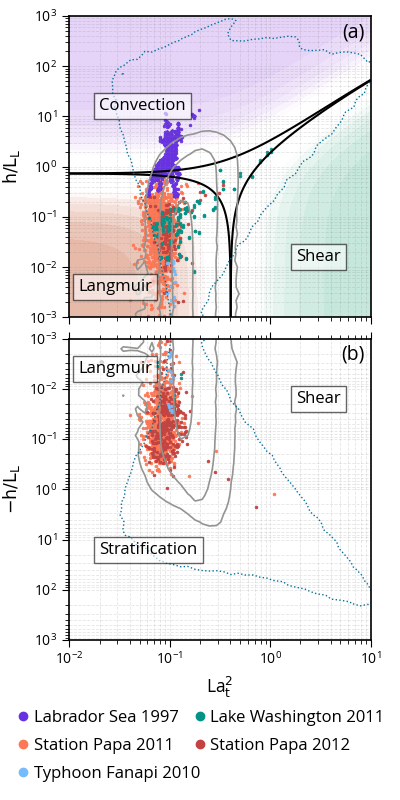

In [25]:
plt.close()
fig = plt.figure(figsize=(4,8))
spec = fig.add_gridspec(2,1)

ax1 = fig.add_subplot(spec[0,0])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax1, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(P12, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(L97, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Lwa, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Fan, axis=ax1, condition='Destabilizing')
ax1.text(0.98, 0.98, '(a)', fontsize=14, ha='right', va='top', transform=ax1.transAxes)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=3)

ax2 = fig.add_subplot(spec[1,0])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax2, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(P12, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(L97, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Lwa, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Fan, axis=ax2, condition='Stabilizing')
ax2.text(0.98, 0.98, '(b)', fontsize=14, ha='right', va='top', transform=ax2.transAxes)
ax2.tick_params(axis='x', top=True, which='both')
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=3)

plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.98, wspace=0.07, hspace=0.07)
ax0 = fig.add_axes([0.04, 0.02, 0.9, 0.1])
ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white') 
ax0.spines['right'].set_color('white')
ax0.spines['left'].set_color('white')
ax0.axes.get_yaxis().set_visible(False)
ax0.axes.get_xaxis().set_visible(False)
x_c1 = 0.02
x_c2 = 0.51
y_r1 = 0.85
y_r2 = 0.5
y_r3 = 0.15
add_legend(ax0, x_c1, y_r1, L97.color, 'Labrador Sea 1997')
add_legend(ax0, x_c2, y_r1, Lwa.color, 'Lake Washington 2011')
add_legend(ax0, x_c1, y_r2, P11.color, 'Station Papa 2011')
add_legend(ax0, x_c2, y_r2, P12.color, 'Station Papa 2012')
add_legend(ax0, x_c1, y_r3, Fan.color, 'Typhoon Fanapi 2010')
# plt.subplots_adjust(left=0.08, right=1, bottom=0.08, top=0.98, wspace=0, hspace=0.07)
# ax[1].legend([sL97, sL98, sP11, sP12, sLwa, sFan],
#              ['Labrador Sea 1997', 'Labrador Sea 1998', 'Station Papa 2011', 'Station Papa 2012', 
#               'Lake Washington 2011', 'Typhoon Fanapi 2010'],
#              loc='lower right', bbox_to_anchor=(1, 0), markerscale=3, #(0.67, 0.83)
#              fontsize=10, framealpha=0.7, handletextpad=0.1, borderaxespad=0);

# plt.savefig(outfig_dir + 'para_space_regime_diagram_BL.png');

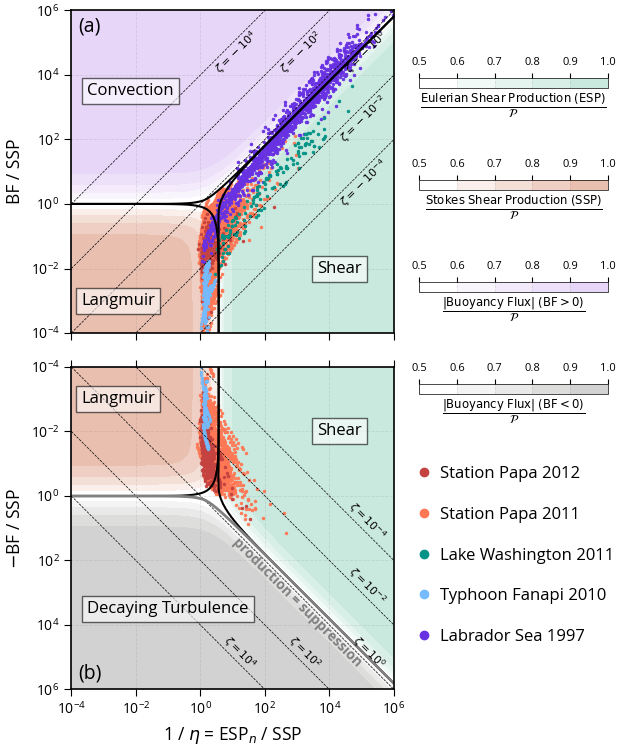

In [15]:
plt.close()
fig = plt.figure(figsize=(6.2,7.5), constrained_layout=True)
spec = fig.add_gridspec(2,2, width_ratios=[2,1], hspace=0, wspace=0)

ax1 = fig.add_subplot(spec[0,0])
cnts1 = plot_SL_regime_diagram(axis=ax1, condition='Destabilizing')
plot_SL_prod(P11, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(P12, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(L97, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(Lwa, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(Fan, use_chim=False, axis=ax1, condition='Destabilizing')
ax1.text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
ax1.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6])
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=3)
# ax1.set(xlim=(-5, 5), ylim=(0, 1))

ax2 = fig.add_subplot(spec[1,0])
cnts2 = plot_SL_regime_diagram(axis=ax2, condition='Stabilizing')
plot_SL_prod(P11, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(P12, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(L97, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(Lwa, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(Fan, use_chim=False, axis=ax2, condition='Stabilizing')
ax2.text(0.02, 0.02, '(b)', fontsize=14, ha='left', va='bottom', transform=ax2.transAxes)
ax2.set_yticks([1e-4, 1e-2, 1e0, 1e2, 1e4, 1e6])
ax2.tick_params(axis='x', top=True, which='both')
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=3)
# ax2.set(xlim=(-5, 5), ylim=(1, 0))

axl = fig.add_subplot(spec[:,1])
axl.set_axis_off()
axl0 = inset_axes(axl, width='100%', height='100%', bbox_to_anchor=(-0.1, 0.46+0.15*3, 1.05, 0.015), 
                   bbox_transform=axl.transAxes, loc='upper left', borderpad=1)
axl1 = inset_axes(axl, width='100%', height='100%', bbox_to_anchor=(-0.1, 0.46+0.15*2, 1.05, 0.015), 
                   bbox_transform=axl.transAxes, loc='upper left', borderpad=1)
axl2 = inset_axes(axl, width='100%', height='100%', bbox_to_anchor=(-0.1, 0.46+0.15*1, 1.05, 0.015), 
                   bbox_transform=axl.transAxes, loc='upper left', borderpad=1)
axl3 = inset_axes(axl, width='100%', height='100%', bbox_to_anchor=(-0.1, 0.46, 1.05, 0.015), 
                   bbox_transform=axl.transAxes, loc='upper left', borderpad=1)
cbar0 = plt.colorbar(cnts1[0], cax=axl0, orientation='horizontal')
cbar1 = plt.colorbar(cnts1[1], cax=axl1, orientation='horizontal')
cbar2 = plt.colorbar(cnts1[2], cax=axl2, orientation='horizontal')
cbar3 = plt.colorbar(cnts2[2], cax=axl3, orientation='horizontal')
axl0.text(0.5, -0.35, r'$\frac{\mathrm{Eulerian \; Shear \; Production \; (ESP)}}{\mathcal{P}}$', fontsize=12, transform=axl0.transAxes, ha='center', va='top')
axl1.text(0.5, -0.35, r'$\frac{\mathrm{Stokes \; Shear \; Production \; (SSP)}}{\mathcal{P}}$',   fontsize=12, transform=axl1.transAxes, ha='center', va='top')
axl2.text(0.5, -0.35, r'$\frac{\mathrm{|Buoyancy \; Flux| \; (BF > 0)}}{\mathcal{P}}$',  fontsize=12, transform=axl2.transAxes, ha='center', va='top')
axl3.text(0.5, -0.35, r'$\frac{\mathrm{|Buoyancy \; Flux| \; (BF < 0)}}{\mathcal{P}}$',  fontsize=12, transform=axl3.transAxes, ha='center', va='top')
axl0.tick_params(labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=8)
axl1.tick_params(labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=8)
axl2.tick_params(labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=8)
axl3.tick_params(labeltop=True, labelbottom=False, top=True, bottom=False, labelsize=8)
cbar0.outline.set_linewidth(0.5)
cbar1.outline.set_linewidth(0.5)
cbar2.outline.set_linewidth(0.5)
cbar3.outline.set_linewidth(0.5)
# axl.legend(custom_lines,
#            [r'Global PDF $\left[ La_t^2, h/L_L ]\right.$', 
#             r'Global PDF $\left[ log_{10}(La_t^2), log_{10}(h/|L_L|) ]\right.$'],
#            handlelength=3.5, fontsize=9, bbox_to_anchor=(0.03, 0.75, 0.95, 0.25), loc='center left', 
#            frameon=False, borderaxespad=1, handletextpad=0.5)


# plt.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.98, wspace=0.07, hspace=0.07)
# ax0 = fig.add_axes([0.06, 0.01, 0.9, 0.1])
# ax0.spines['bottom'].set_color('white')
# ax0.spines['top'].set_color('white') 
# ax0.spines['right'].set_color('white')
# ax0.spines['left'].set_color('white')
# ax0.axes.get_yaxis().set_visible(False)
# ax0.axes.get_xaxis().set_visible(False)
# x_c1 = 0.02
# x_c2 = 0.51
# y_r1 = 0.81
# y_r2 = 0.46
# y_r3 = 0.11
x0 = 0.02
y0 = 0.02
dy = 0.06
add_legend(axl, x0, y0+dy*1, L97.color, 'Labrador Sea 1997',    dx=0.09)
add_legend(axl, x0, y0+dy*2, Fan.color, 'Typhoon Fanapi 2010',  dx=0.09)
add_legend(axl, x0, y0+dy*3, Lwa.color, 'Lake Washington 2011', dx=0.09)
add_legend(axl, x0, y0+dy*4, P11.color, 'Station Papa 2011',    dx=0.09)
add_legend(axl, x0, y0+dy*5, P12.color, 'Station Papa 2012',    dx=0.09)

plt.savefig(outfig_dir + 'para_space_regime_diagram_SL.png', dpi=600);

In [ ]:
plt.close()
fig = plt.figure(figsize=(7.2,6.8))
spec = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(spec[0,0])
plot_SL_regime_diagram(axis=ax1, condition='Destabilizing')
plot_SL_prod(P11, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(P12, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(L97, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(Lwa, use_chim=False, axis=ax1, condition='Destabilizing')
plot_SL_prod(Fan, use_chim=False, axis=ax1, condition='Destabilizing')
ax1.text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=3)
# ax1.set(xlim=(-5, 5), ylim=(0, 1))

ax2 = fig.add_subplot(spec[1,0])
plot_SL_regime_diagram(axis=ax2, condition='Stabilizing')
plot_SL_prod(P11, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(P12, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(L97, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(Lwa, use_chim=False, axis=ax2, condition='Stabilizing')
plot_SL_prod(Fan, use_chim=False, axis=ax2, condition='Stabilizing')
ax2.text(0.02, 0.02, '(b)', fontsize=14, ha='left', va='bottom', transform=ax2.transAxes)
ax2.tick_params(axis='x', top=True, which='both')
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=3)
# ax2.set(xlim=(-5, 5), ylim=(1, 0))

ax3 = fig.add_subplot(spec[0, 1])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax3, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax3, condition='Destabilizing')
plot_Lat2_hLL(P12, axis=ax3, condition='Destabilizing')
plot_Lat2_hLL(L97, axis=ax3, condition='Destabilizing')
plot_Lat2_hLL(Lwa, axis=ax3, condition='Destabilizing')
plot_Lat2_hLL(Fan, axis=ax3, condition='Destabilizing')
ax3.text(0.98, 0.98, '(c)', fontsize=14, ha='right', va='top', transform=ax3.transAxes)
ax3.tick_params(axis='x', labelbottom=False)
ax3.tick_params(axis='both', which='major', length=5)
ax3.tick_params(axis='both', which='minor', length=3)

ax4 = fig.add_subplot(spec[1, 1])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax4, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax4, condition='Stabilizing')
plot_Lat2_hLL(P12, axis=ax4, condition='Stabilizing')
plot_Lat2_hLL(L97, axis=ax4, condition='Stabilizing')
plot_Lat2_hLL(Lwa, axis=ax4, condition='Stabilizing')
plot_Lat2_hLL(Fan, axis=ax4, condition='Stabilizing')
ax4.text(0.98, 0.02, '(d)', fontsize=14, ha='right', va='bottom', transform=ax4.transAxes)
ax4.tick_params(axis='x', top=True, which='both')
ax4.tick_params(axis='both', which='major', length=5)
ax4.tick_params(axis='both', which='minor', length=3)

plt.subplots_adjust(left=0.08, right=1, bottom=0.18, top=0.98, wspace=0.07, hspace=0.07)
ax0 = fig.add_axes([0.08, 0, 0.9, 0.1])
ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white') 
ax0.spines['right'].set_color('white')
ax0.spines['left'].set_color('white')
ax0.axes.get_yaxis().set_visible(False)
ax0.axes.get_xaxis().set_visible(False)
x_c1 = 0.05
x_c2 = 0.4
x_c3 = 0.75
y_r1 = 0.65
y_r2 = 0.2
add_legend(ax0, x_c1, y_r1, L97.color, 'Labrador Sea 1997')
add_legend(ax0, x_c2, y_r1, P11.color, 'Station Papa 2011')
add_legend(ax0, x_c3, y_r1, P12.color, 'Station Papa 2012')
add_legend(ax0, x_c1, y_r2, Lwa.color, 'Lake Washington 2011')
add_legend(ax0, x_c2, y_r2, Fan.color, 'Typhoon Fanapi 2010')

# plt.savefig(outfig_dir + 'para_space_regime_diagram.png');

/home/zhihua/Projects/general_scripts/plt_tool.py:468: RuntimeWarning: invalid value encountered in log10
  axis.contour(xx, -yy, np.log10(zz), levels=[0, 0.5, 1, 1.5, 2, 2.5], colors='k', linewidths=0.5, linestyles='--')


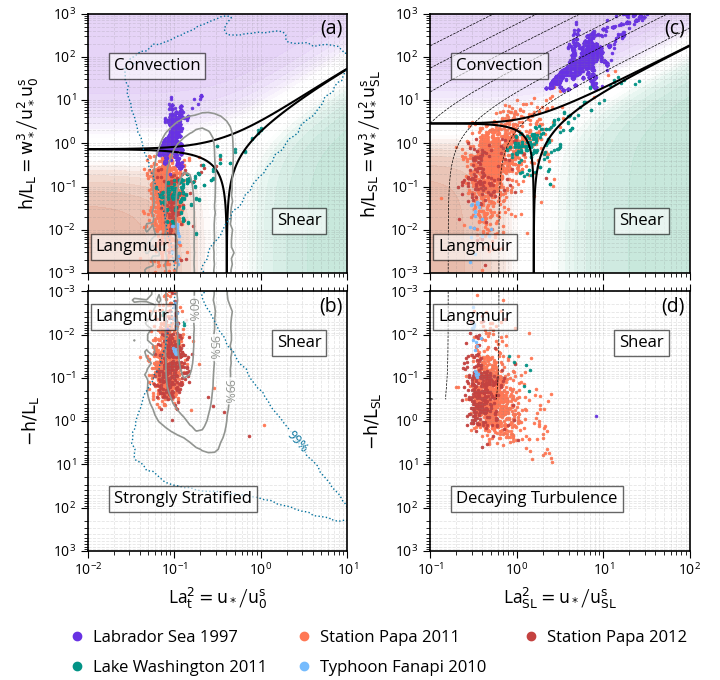

In [19]:
plt.close()
fig = plt.figure(figsize=(7.2,6.8))
spec = fig.add_gridspec(2,2)

ax1 = fig.add_subplot(spec[0,0])
cnts1, gpdf, gpdf_log = plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax1, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(P12, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(L97, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Lwa, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Fan, axis=ax1, condition='Destabilizing')
ax1.text(0.98, 0.98, '(a)', fontsize=14, ha='right', va='top', transform=ax1.transAxes)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=3)

ax2 = fig.add_subplot(spec[1,0])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax2, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(P12, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(L97, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Lwa, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Fan, axis=ax2, condition='Stabilizing')
ax2.text(0.98, 0.98, '(b)', fontsize=14, ha='right', va='top', transform=ax2.transAxes)
ax2.tick_params(axis='x', top=True, which='both')
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=3)

ax3 = fig.add_subplot(spec[0,1])
plot_regime_diagram_LaSL(axis=ax3, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(P12, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(L97, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(Lwa, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(Fan, axis=ax3, condition='Destabilizing', opt='SL')
ax3.text(0.98, 0.98, '(c)', fontsize=14, ha='right', va='top', transform=ax3.transAxes)
ax3.tick_params(axis='x', labelbottom=False)
ax3.tick_params(axis='both', which='major', length=5)
ax3.tick_params(axis='both', which='minor', length=3)

ax4 = fig.add_subplot(spec[1,1])
plot_regime_diagram_LaSL(axis=ax4, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(P12, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(L97, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(Lwa, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(Fan, axis=ax4, condition='Stabilizing', opt='SL')
ax4.text(0.98, 0.98, '(d)', fontsize=14, ha='right', va='top', transform=ax4.transAxes)
ax4.tick_params(axis='x', top=True, which='both')
ax4.tick_params(axis='both', which='major', length=5)
ax4.tick_params(axis='both', which='minor', length=3)

plt.subplots_adjust(left=0.08, right=1, bottom=0.19, top=0.98, wspace=0.07, hspace=0.07)
ax0 = fig.add_axes([0.08, 0, 0.9, 0.1])
ax0.spines['bottom'].set_color('white')
ax0.spines['top'].set_color('white') 
ax0.spines['right'].set_color('white')
ax0.spines['left'].set_color('white')
ax0.axes.get_yaxis().set_visible(False)
ax0.axes.get_xaxis().set_visible(False)
x_c1 = 0.03
x_c2 = 0.38
x_c3 = 0.73
y_r1 = 0.65
y_r2 = 0.2
add_legend(ax0, x_c1, y_r1, L97.color, 'Labrador Sea 1997')
add_legend(ax0, x_c2, y_r1, P11.color, 'Station Papa 2011')
add_legend(ax0, x_c3, y_r1, P12.color, 'Station Papa 2012')
add_legend(ax0, x_c1, y_r2, Lwa.color, 'Lake Washington 2011')
add_legend(ax0, x_c2, y_r2, Fan.color, 'Typhoon Fanapi 2010')

# plt.savefig(outfig_dir + 'para_space_regime_diagram_BL_Lax.png');

/Users/zhihua/Documents/Work/Research/Projects/PhD-projects/general_scripts/plt_tool.py:468: RuntimeWarning: invalid value encountered in log10
  axis.contour(xx, -yy, np.log10(zz), levels=[0, 0.5, 1, 1.5, 2, 2.5], colors='k', linewidths=0.5, linestyles='--')


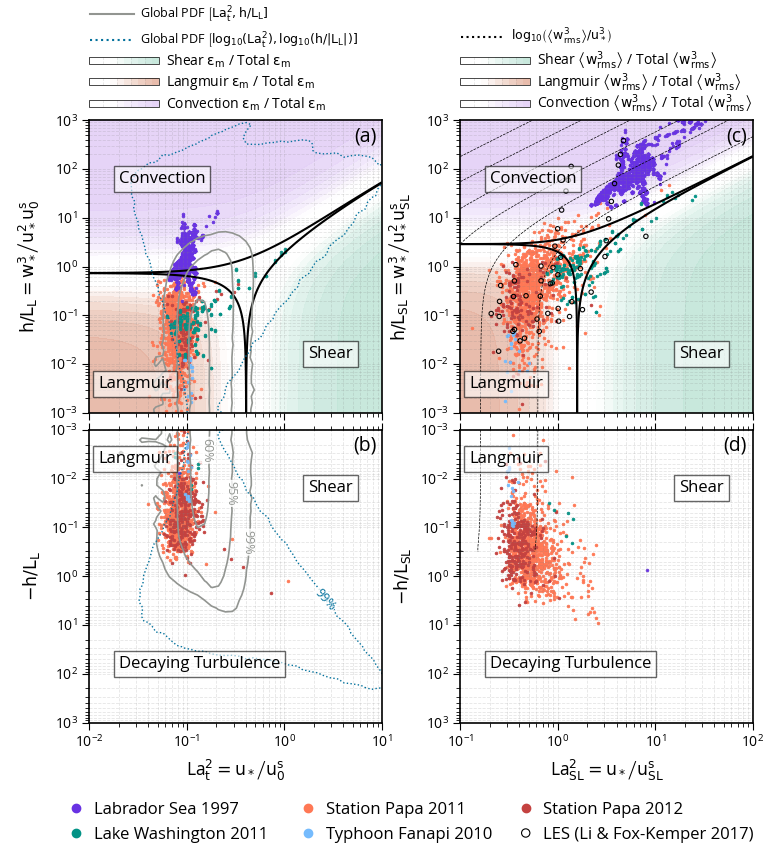

In [16]:
plt.close()
fig = plt.figure(figsize=(7.8,8.5))
spec = fig.add_gridspec(7,2)

ax1 = fig.add_subplot(spec[1:4,0])
cnts1 = plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax1, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(P12, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(L97, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Lwa, axis=ax1, condition='Destabilizing')
plot_Lat2_hLL(Fan, axis=ax1, condition='Destabilizing')
ax1.text(0.98, 0.98, '(a)', fontsize=14, ha='right', va='top', transform=ax1.transAxes)
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params(axis='both', which='major', length=5)
ax1.tick_params(axis='both', which='minor', length=3)

ax1l = fig.add_subplot(spec[0,0])
ax1l.set_axis_off()
ax1l0 = inset_axes(ax1l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.65, 0.2, 0.08), 
                   bbox_transform=ax1l.transAxes, loc='upper left', borderpad=1)
ax1l1 = inset_axes(ax1l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.4, 0.2, 0.08), 
                   bbox_transform=ax1l.transAxes, loc='upper left', borderpad=1)
ax1l2 = inset_axes(ax1l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.15, 0.2, 0.08), 
                   bbox_transform=ax1l.transAxes, loc='upper left', borderpad=1)
cbar1l0 = plt.colorbar(cnts1[0], cax=ax1l0, orientation='horizontal')
cbar1l1 = plt.colorbar(cnts1[1], cax=ax1l1, orientation='horizontal')
cbar1l2 = plt.colorbar(cnts1[2], cax=ax1l2, orientation='horizontal')
ax1l0.text(1.1,0.42, r'Shear $\epsilon_m$ / Total $\epsilon_m$', fontsize=10, transform=ax1l0.transAxes, ha='left', va='center')
ax1l1.text(1.1,0.42, r'Langmuir $\epsilon_m$ / Total $\epsilon_m$', fontsize=10, transform=ax1l1.transAxes, ha='left', va='center')
ax1l2.text(1.1,0.42, r'Convection $\epsilon_m$ / Total $\epsilon_m$', fontsize=10, transform=ax1l2.transAxes, ha='left', va='center')
ax1l0.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
ax1l1.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
ax1l2.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
cbar1l0.outline.set_linewidth(0.5)
cbar1l1.outline.set_linewidth(0.5)
cbar1l2.outline.set_linewidth(0.5)
custom_lines = [plt.Line2D([0], [0], color='xkcd:grey', lw=1.5),
                plt.Line2D([0], [0], color='xkcd:ocean blue', lw=1.5, ls=':')]
ax1l.legend(custom_lines,
           [r'Global PDF $\left[ La_t^2, h/L_L ]\right.$', 
            r'Global PDF $\left[ log_{10}(La_t^2), log_{10}(h/|L_L|) ]\right.$'],
           handlelength=3.5, fontsize=9, bbox_to_anchor=(0.03, 0.75, 0.95, 0.25), loc='center left', 
           frameon=False, borderaxespad=1, handletextpad=0.5)

ax2 = fig.add_subplot(spec[4:,0])
plot_regime_diagram(glb_Lat2, glb_hLL, axis=ax2, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(P12, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(L97, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Lwa, axis=ax2, condition='Stabilizing')
plot_Lat2_hLL(Fan, axis=ax2, condition='Stabilizing')
ax2.text(0.98, 0.98, '(b)', fontsize=14, ha='right', va='top', transform=ax2.transAxes)
ax2.tick_params(axis='x', top=True, which='both')
ax2.tick_params(axis='both', which='major', length=5)
ax2.tick_params(axis='both', which='minor', length=3)

ax3 = fig.add_subplot(spec[1:4,1])
cnts3 = plot_regime_diagram_LaSL(axis=ax3, xpow=2, condition='Destabilizing')
plot_Lat2_hLL(P11, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(P12, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(L97, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(Lwa, axis=ax3, condition='Destabilizing', opt='SL')
plot_Lat2_hLL(Fan, axis=ax3, condition='Destabilizing', opt='SL')
ax3.scatter(1/bkL17.LaSLm2, bkL17.wr3our3/bkL17.LaSLm2, 10, facecolor='none', edgecolors='xkcd:black', lw=0.8, marker='o')
ax3.text(0.98, 0.98, '(c)', fontsize=14, ha='right', va='top', transform=ax3.transAxes)
ax3.tick_params(axis='x', labelbottom=False)
ax3.tick_params(axis='both', which='major', length=5)
ax3.tick_params(axis='both', which='minor', length=3)

ax3l = fig.add_subplot(spec[0,1])
ax3l.set_axis_off()
ax3l0 = inset_axes(ax3l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.65, 0.2, 0.08), 
                   bbox_transform=ax3l.transAxes, loc='upper left', borderpad=1)
ax3l1 = inset_axes(ax3l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.4, 0.2, 0.08), 
                   bbox_transform=ax3l.transAxes, loc='upper left', borderpad=1)
ax3l2 = inset_axes(ax3l, width='100%', height='100%', bbox_to_anchor=(0.03, 0.15, 0.2, 0.08), 
                   bbox_transform=ax3l.transAxes, loc='upper left', borderpad=1)
cbar3l0 = plt.colorbar(cnts3[0], cax=ax3l0, orientation='horizontal')
cbar3l1 = plt.colorbar(cnts3[1], cax=ax3l1, orientation='horizontal')
cbar3l2 = plt.colorbar(cnts3[2], cax=ax3l2, orientation='horizontal')
#$\left\langle \overline{w^2} \right\rangle$
ax3l0.text(1.1,0.42, r'Shear $\left\langle w_{rms}^3 \right\rangle$ / Total $\left\langle w_{rms}^3 \right\rangle$', 
           fontsize=10, transform=ax3l0.transAxes, ha='left', va='center')
ax3l1.text(1.1,0.42, r'Langmuir $\left\langle w_{rms}^3 \right\rangle$ / Total $\left\langle w_{rms}^3 \right\rangle$', 
           fontsize=10, transform=ax3l1.transAxes, ha='left', va='center')
ax3l2.text(1.1,0.42, r'Convection $\left\langle w_{rms}^3 \right\rangle$ / Total $\left\langle w_{rms}^3 \right\rangle$', 
           fontsize=10, transform=ax3l2.transAxes, ha='left', va='center')
ax3l0.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
ax3l1.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
ax3l2.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
cbar3l0.outline.set_linewidth(0.5)
cbar3l1.outline.set_linewidth(0.5)
cbar3l2.outline.set_linewidth(0.5)
custom_lines = [plt.Line2D([0], [0], color='w', lw=1.5, ls=':'),
                plt.Line2D([0], [0], color='k', lw=1.5, ls=':')]
ax3l.legend(custom_lines,
           ['', r'$log_{10} \left( \left\langle w_{rms}^3 \right\rangle / u_*^3 \right)$'],#, R$\rightarrow$L: [0, 0.5, 1, 1.5, 2, 2.5]'
           handlelength=3.5, fontsize=9, bbox_to_anchor=(0.03, 0.75, 0.95, 0.25), loc='center left', 
           frameon=False, borderaxespad=1, handletextpad=0.5)

ax4 = fig.add_subplot(spec[4:,1])
plot_regime_diagram_LaSL(axis=ax4, xpow=2, condition='Stabilizing')
plot_Lat2_hLL(P11, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(P12, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(L97, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(Lwa, axis=ax4, condition='Stabilizing', opt='SL')
plot_Lat2_hLL(Fan, axis=ax4, condition='Stabilizing', opt='SL')
ax4.text(0.98, 0.98, '(d)', fontsize=14, ha='right', va='top', transform=ax4.transAxes)
ax4.tick_params(axis='x', top=True, which='both')
ax4.tick_params(axis='both', which='major', length=5)
ax4.tick_params(axis='both', which='minor', length=3)

plt.subplots_adjust(left=0.08, right=1, bottom=0.15, top=0.98, wspace=0.07, hspace=0.2)
ax0 = fig.add_axes([0.08, 0, 0.9, 0.1])
ax0.set_axis_off()
x_c1 = 0.02
x_c2 = 0.35
x_c3 = 0.66
y_r1 = 0.5
y_r2 = 0.2
add_legend(ax0, x_c1, y_r1, L97.color, 'Labrador Sea 1997')
add_legend(ax0, x_c2, y_r1, P11.color, 'Station Papa 2011')
add_legend(ax0, x_c3, y_r1, P12.color, 'Station Papa 2012')
add_legend(ax0, x_c1, y_r2, Lwa.color, 'Lake Washington 2011')
add_legend(ax0, x_c2, y_r2, Fan.color, 'Typhoon Fanapi 2010')
add_legend(ax0, x_c3, y_r2, 'none', 'LES (Li & Fox-Kemper 2017)', edgecolor='xkcd:black', lw=0.8, marker='o')

# plt.savefig(outfig_dir + 'para_space_regime_diagram_BL_Lax.png');

In [14]:
from scipy import optimize
def func(xi, x, y):
    chim = sot.get_emp_chi(xi, var='mom')
    phim = sot.get_phimL19(-y/x)
    return xi*(phim*chim*x + 1 + abs(y)) - 1
def get_iterative_pchim(x, y):
    root,_,ier,_ = optimize.fsolve(func, 0.8, args=(x, y), full_output=True)
    if ier!=1:
        root,_,ier,_ = optimize.fsolve(func, 0.5, args=(x, y), full_output=True)
        if ier!=1:
            root,_,ier,_ = optimize.fsolve(func, 0.2, args=(x, y), full_output=True)
            if ier!=1:
                print('xi not found!')
                xi = nan
    else:
        xi = root[0]
    return sot.get_emp_chi(xi, var='mom')*sot.get_phimL19(-y/x)

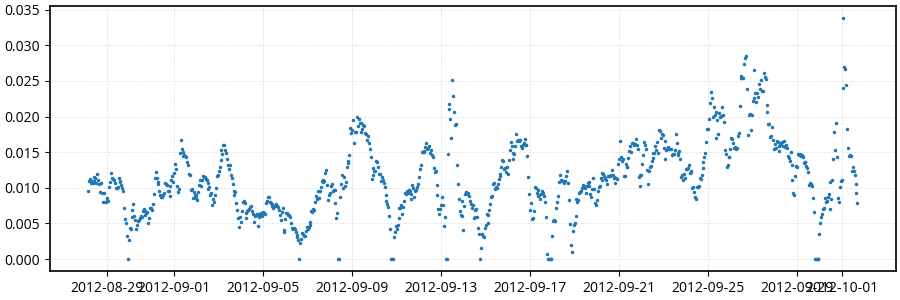

In [71]:
plt.close()
plt.figure(figsize=(9,3), constrained_layout=True)

# plt.plot(Fan.time, Fan.La_SLP_hobl.T, 'o-', ms=5, mfc='none');
# plt.gca().set_prop_cycle(None)
# plt.plot(Fan.time, Fan.La_SL_hobl.T, 'x-');

# plt.plot(Lwa.time, Lwa.La_SL.T, '.')
# plt.plot(Lwa.time, Lwa.La_t.T, '.');
# plt.plot(L98.La_SL.T)
# plt.gca().set_prop_cycle(None)
# plt.plot(L98.La_SLP.T)
# plt.ylim(0,8);
plt.plot(P12.time, P12.wfs, '.', ms=3);

# plt.hist(Lwa.La_SL.values.ravel()**(-2), 20,  histtype='step', density=True);
# plt.hist(L97.La_SL.values.ravel()**(-2), 20,  histtype='step', density=True);
# plt.hist(L98.La_SL.values.ravel()**(-2), 20,  histtype='step', density=True);
# plt.hist(P11.LaSL2, 20,  histtype='step', density=True)
# plt.hist(P12.LaSL2, 20,  histtype='step', density=True);

# plt.xlabel(r'La$_{SL}^{-2}$', fontsize=16);
# plt.title('Labrador Sea 1997', fontsize=16);
# plt.ylim(0.3, 8);
# plt.gca().set_yscale('log')

In [16]:
spec11 = xr.open_dataset(data_root+'OCSP/NBF/OCSP_drifts_spec_2011.nc').load()
spec11.close()

spec12 = xr.open_dataset(data_root+'OCSP/NBF/OCSP_drifts_spec_2012.nc').load()
spec12.close()

spec71 = xr.open_dataset(data_root+'LakeWA/NBF/LKWA_drifts_spec_71.nc').load()
spec71.close()

spec72 = xr.open_dataset(data_root+'LakeWA/NBF/LKWA_drifts_spec_72.nc').load()
spec72.close()

spec97 = xr.open_dataset(data_root+'LabSea/NBF/LabSea_drifts_spec_1997.nc').load()
spec97.close()
spec97 = spec97.stack(fdrift=('ID', 'drift')).dropna('fdrift', how='all')

spec98 = xr.open_dataset(data_root+'LabSea/NBF/LabSea_drifts_spec_1998.nc').load()
spec98.close()
spec98 = spec98.stack(fdrift=('ID', 'drift')).dropna('fdrift', how='all')

spec60 = xr.open_dataset(data_root+'Hurricanes/ITOP/NBF/Fanapi_drifts_spec_60.nc').load()
spec60.close()

spec61 = xr.open_dataset(data_root+'Hurricanes/ITOP/NBF/Fanapi_drifts_spec_61.nc').load()
spec61.close()

spec62 = xr.open_dataset(data_root+'Hurricanes/ITOP/NBF/Fanapi_drifts_spec_62.nc').load()
spec62.close()

spec64 = xr.open_dataset(data_root+'Hurricanes/ITOP/NBF/Fanapi_drifts_spec_64.nc').load()
spec64.close()

specFan = xr.concat((spec60, spec61, spec62, spec64), 'ID')
specFan = specFan.assign_coords(ID=('ID', [60,61,62,64]))
specFan = specFan.stack(fdrift=('ID', 'drift')).dropna('fdrift', how='all')

In [17]:
spec11['wLowrms'] = spec11.omegaL*spec11.attrs['Lfloat']/np.sqrt(spec11.wrms2)
spec12['wLowrms'] = spec12.omegaL*spec12.attrs['Lfloat']/np.sqrt(spec12.wrms2)
spec71['wLowrms'] = spec71.omegaL*spec71.attrs['Lfloat']/np.sqrt(spec71.wrms2)
spec72['wLowrms'] = spec72.omegaL*spec72.attrs['Lfloat']/np.sqrt(spec72.wrms2)
spec97['wLowrms'] = spec97.omegaL*spec97.attrs['Lfloat']/np.sqrt(spec97.wrms2+spec97.w2dfs)
spec98['wLowrms'] = spec98.omegaL*spec98.attrs['Lfloat']/np.sqrt(spec98.wrms2+spec98.w2dfs)
specFan['wLowrms'] = specFan.omegaL*specFan.attrs['Lfloat']/np.sqrt(specFan.wrms2)

spec11['wcowrms'] = np.sqrt(spec11.delw2/spec11.wrms2+1)
spec12['wcowrms'] = np.sqrt(spec12.delw2/spec12.wrms2+1)
spec71['wcowrms'] = np.sqrt(spec71.delw2/spec71.wrms2+1)
spec72['wcowrms'] = np.sqrt(spec72.delw2/spec72.wrms2+1)
spec97['wcowrms'] = np.sqrt(spec97.delw2/(spec97.wrms2+spec97.w2dfs)+1)
spec98['wcowrms'] = np.sqrt(spec98.delw2/(spec98.wrms2+spec98.w2dfs)+1)
specFan['wcowrms'] = np.sqrt(specFan.delw2/specFan.wrms2+1)

In [18]:
omega_dum0 = np.logspace(-1,1.8)
omega_dumL = np.logspace(-1.5,1)
omegaLo0 = np.array([3, 6, 9])[:,None]
PaaN0 = (1+(2.2/omega_dum0)**4)**(-0.5) * (1+(0.63*omega_dum0/omegaLo0)**2)**(-0.8)
PaaNL = (1+(2.2/omegaLo0/omega_dumL)**4)**(-0.5) * (1+(0.63*omega_dumL)**2)**(-0.8)

In [8]:
def plot_specMs(omegaLo0, omega_dum, PaaN, ax):
    crgb = np.array([0.6, 0.4, 0])[:,None]*np.ones((1,3))
    for i in range(len(omegaLo0)):
        ax.plot(omega_dum, PaaN[i,:], c=crgb[i,:], lw=2)

In [19]:
4e-5/np.sqrt(0.03*9.81/1025/60)

0.018285313815332195

In [9]:
spec11

<xarray.Dataset>
Dimensions:  (drift: 72, omega: 100)
Coordinates:
  * drift    (drift) int64 2 3 4 5 6 7 8 9 10 ... 98 101 102 103 104 106 107 108
  * omega    (omega) float64 0.0001 0.000111 0.0001233 ... 2.565 2.848 3.162
Data variables:
    raw      (omega, drift) float64 3.82e-10 5.196e-10 5.885e-10 ... nan nan nan
    fil      (omega, drift) float64 3.606e-10 5.15e-10 5.872e-10 ... nan nan nan
    fit      (omega, drift) float64 1.012e-10 9.543e-11 ... 4.309e-11 1.248e-10
    eps      (drift) float64 2.38e-07 4.105e-07 ... 1.422e-07 2.845e-07
    omega0   (drift) float64 0.002958 0.003999 0.002292 ... 0.001791 0.002395
    omegaL   (drift) float64 0.0104 0.01247 0.01425 ... 0.01115 0.008759 0.01104
    omegaM   (drift) float64 0.08224 0.09667 0.1002 ... 0.09837 0.08371 0.09853
    myd      (drift) float64 41.13 42.31 43.34 44.28 ... 137.3 139.3 140.3 141.3
    wrms2    (drift) float64 0.0001584 0.0001907 ... 0.0001024 0.0001487
    delw2    (drift) float64 2.894e-05 4.063e-05 ... 2.173e-05 3.424e-05
    wLowrms  (drift) float64 0.3802 0.4155 0.3189 ... 0.4901 0.3982 0.4163
    wcowrms  (drift) float64 1.088 1.101 1.068 1.058 ... 1.136 1.133 1.101 1.109
Attributes:
    Lfloat:   0.46

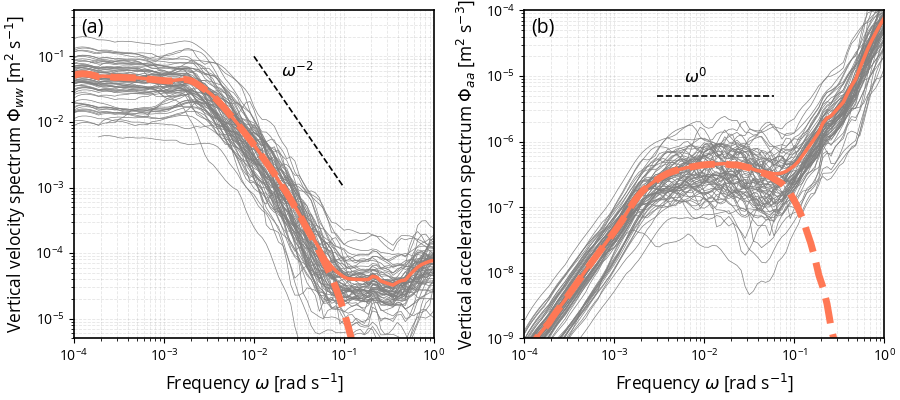

In [19]:
plt.close()
_,ax = plt.subplots(1,2, figsize=(9,4), constrained_layout=True, sharex=True)

# plt.plot(specFan.omega, specFan.omega**(-0)*specFan.raw, c=Fan.color)
# plt.plot(spec97.omega,  spec97.omega**(-0)*spec97.raw,   c=L97.color)

# plt.plot(spec71.omega, spec71.omega**(-0)*spec71.raw, c=Lwa.color)
# plt.plot(spec72.omega, spec72.omega**(-0)*spec72.raw, c=Lwa.color)

# plt.plot(spec12.omega, spec12.omega**(-0)*spec12.raw, c=P12.color)

slp = -2
ax[0].plot(spec11.omega, spec11.omega**(-2)*spec11.raw, c='grey', lw=0.5)
ax[0].plot(spec11.omega, (spec11.omega**(-2)*spec11.raw).mean('drift'), c=P11.color, lw=2.5)
ax[0].plot(spec11.omega, (spec11.omega**(-2)*spec11.fil).mean('drift'), c=P11.color, lw=5, ls='--')
ax[0].plot([1e-2, 1e-1], [1e-1, 1e-1*10**(slp)], '--k')
ax[0].text(2e-2, 5e-2, rf'$\omega^{{{slp}}}$')
ax[0].text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(5e-6, 5e-1)
ax[0].set_yscale('log')
ax[0].set_ylabel(r'Vertical velocity spectrum $\Phi_{ww}$ [m$^2$ s$^{-1}$]')
ax[0].set_xlabel(r'Frequency $\omega$ [rad s$^{-1}$]')

slp = 0
ax[1].plot(spec11.omega, spec11.omega**(-0)*spec11.raw, c='grey', lw=0.5)
ax[1].plot(spec11.omega, (spec11.omega**(-0)*spec11.raw).mean('drift'), c=P11.color, lw=2.5)
ax[1].plot(spec11.omega, (spec11.omega**(-0)*spec11.fil).mean('drift'), c=P11.color, lw=5, ls='--')
# ax[1].plot(spec11.omega, (spec11.omega**(-0)*spec11.fit).mean('drift'), c='k', lw=4)
ax[1].plot([3e-3, 6e-2], [5e-6, 5e-6*20**(slp)], '--k')
ax[1].text(6e-3, 8e-6, rf'$\omega^{{{slp}}}$')
ax[1].text(0.02, 0.98, '(b)', fontsize=14, ha='left', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(1e-9, 1e-4)
ax[1].set_xlim(1e-4, 1)
ax[1].set_yscale('log')
ax[1].set_ylabel(r'Vertical acceleration spectrum $\Phi_{aa}$ [m$^2$ s$^{-3}$]')
ax[1].set_xlabel(r'Frequency $\omega$ [rad s$^{-1}$]')
plt.xscale('log');

plt.savefig(outfig_dir + 'example_spectra_P11.png', dpi=600);

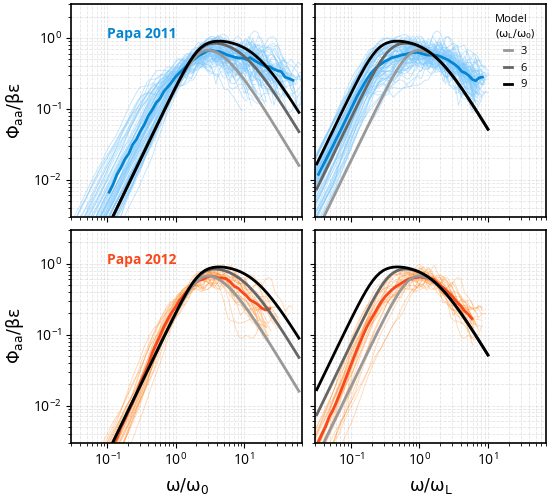

In [54]:
plt.close()
_,ax = plt.subplots(2,2, figsize=(5.5,5), constrained_layout=True, sharex='col', sharey='row')

ax[0,0].plot(spec11.omega/spec11.omega0, spec11.raw/1.8/spec11.eps, c='xkcd:sky', lw=0.6, alpha=0.5, label='_nolegend_')
bsp = sot.bin_stat_1d(spec11.omega/spec11.omega0, spec11.raw/1.8/spec11.eps, xbins=omega_dum0, ns_min=20)
ax[0,0].plot(bsp.x.m, bsp.y.s, c='xkcd:cerulean', lw=2, label='_nolegend_')
ax[0,0].text(1e-1, 1, 'Papa 2011', c='xkcd:cerulean', fontsize=10, fontweight='bold')
plot_specMs(omegaLo0, omega_dum0, PaaN0, ax[0,0])

ax[1,0].plot(spec12.omega/spec12.omega0, spec12.raw/1.8/spec12.eps, c='C1', lw=0.6, alpha=0.3, label='_nolegend_')
bsp = sot.bin_stat_1d(spec12.omega/spec12.omega0, spec12.raw/1.8/spec12.eps, xbins=omega_dum0, ns_min=20)
ax[1,0].plot(bsp.x.m, bsp.y.s, c='xkcd:reddish orange', lw=2, label='_nolegend_')
ax[1,0].text(1e-1, 1, 'Papa 2012', c='xkcd:reddish orange', fontsize=10, fontweight='bold')
plot_specMs(omegaLo0, omega_dum0, PaaN0, ax[1,0])

ax[0,1].plot(spec11.omega/spec11.omegaL, spec11.raw/1.8/spec11.eps, c='xkcd:sky', lw=0.6, alpha=0.5, label='_nolegend_')
bsp = sot.bin_stat_1d(spec11.omega/spec11.omegaL, spec11.raw/1.8/spec11.eps, xbins=omega_dumL, ns_min=20)
ax[0,1].plot(bsp.x.m, bsp.y.s, c='xkcd:cerulean', lw=2, label='_nolegend_')
plot_specMs(omegaLo0, omega_dumL, PaaNL, ax[0,1])
ax[0,1].legend([str(i) for i in omegaLo0.ravel()], fontsize=8,
               title_fontsize=8, title=r'Model' '\n' '($\omega_L/\omega_0$)', handlelength=0.7, frameon=False)

ax[1,1].plot(spec12.omega/spec12.omegaL, spec12.raw/1.8/spec12.eps, c='C1', lw=0.6, alpha=0.3, label='_nolegend_')
bsp = sot.bin_stat_1d(spec12.omega/spec12.omegaL, spec12.raw/1.8/spec12.eps, xbins=omega_dumL, ns_min=20)
ax[1,1].plot(bsp.x.m, bsp.y.s, c='xkcd:reddish orange', lw=2, label='_nolegend_')
plot_specMs(omegaLo0, omega_dumL, PaaNL, ax[1,1])

ax[1,0].set_xlabel(r'$\omega/\omega_0$')
ax[1,1].set_xlabel(r'$\omega/\omega_L$')
for iax in ax.flat:
    iax.set(xscale='log', yscale='log', 
            xlim=(3e-2,7e1), ylim=(3e-3,3), ylabel=r'$\Phi_{aa}/\beta\epsilon$')
    iax.label_outer()

# plt.savefig(outfig_dir + 'ocsp_accLspec_nondimensional.png');

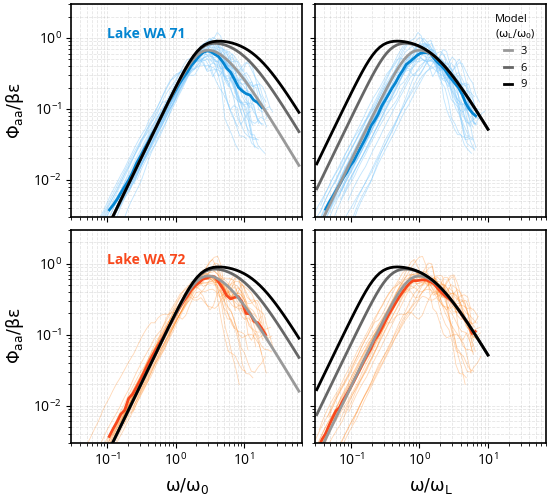

In [58]:
plt.close()
_,ax = plt.subplots(2,2, figsize=(5.5,5), constrained_layout=True, sharex='col', sharey='row')

ax[0,0].plot(spec71.omega/spec71.omega0, spec71.raw/1.8/spec71.eps, c='xkcd:sky', lw=0.6, alpha=0.5, label='_nolegend_')
bsp = sot.bin_stat_1d(spec71.omega/spec71.omega0, spec71.raw/1.8/spec71.eps, omega_dum0, ns_min=20)
ax[0,0].plot(bsp.x.m, bsp.y.m, c='xkcd:cerulean', lw=2, label='_nolegend_')
ax[0,0].text(1e-1, 1, 'Lake WA 71', c='xkcd:cerulean', fontsize=10, fontweight='bold')
plot_specMs(omegaLo0, omega_dum0, PaaN0, ax[0,0])

ax[1,0].plot(spec72.omega/spec72.omega0, spec72.raw/1.8/spec72.eps, c='C1', lw=0.6, alpha=0.3, label='_nolegend_')
bsp = sot.bin_stat_1d(spec72.omega/spec72.omega0, spec72.raw/1.8/spec72.eps, omega_dum0, ns_min=20)
ax[1,0].plot(bsp.x.m, bsp.y.m, c='xkcd:reddish orange', lw=2, label='_nolegend_')
ax[1,0].text(1e-1, 1, 'Lake WA 72', c='xkcd:reddish orange', fontsize=10, fontweight='bold')
plot_specMs(omegaLo0, omega_dum0, PaaN0, ax[1,0])

ax[0,1].plot(spec71.omega/spec71.omegaL, spec71.raw/1.8/spec71.eps, c='xkcd:sky', lw=0.6, alpha=0.5, label='_nolegend_')
bsp = sot.bin_stat_1d(spec71.omega/spec71.omegaL, spec71.raw/1.8/spec71.eps, omega_dumL, ns_min=20)
ax[0,1].plot(bsp.x.m, bsp.y.m, c='xkcd:cerulean', lw=2, label='_nolegend_')
plot_specMs(omegaLo0, omega_dumL, PaaNL, ax[0,1])
ax[0,1].legend([str(i) for i in omegaLo0.ravel()], fontsize=8,
               title_fontsize=8, title=r'Model' '\n' '($\omega_L/\omega_0$)', handlelength=0.7, frameon=False)

ax[1,1].plot(spec72.omega/spec72.omegaL, spec72.raw/1.8/spec72.eps, c='C1', lw=0.6, alpha=0.3, label='_nolegend_')
bsp = sot.bin_stat_1d(spec72.omega/spec72.omegaL, spec72.raw/1.8/spec72.eps, omega_dumL, ns_min=20)
ax[1,1].plot(bsp.x.m, bsp.y.m, c='xkcd:reddish orange', lw=2, label='_nolegend_')
plot_specMs(omegaLo0, omega_dumL, PaaNL, ax[1,1])

ax[1,0].set_xlabel(r'$\omega/\omega_0$')
ax[1,1].set_xlabel(r'$\omega/\omega_L$')
for iax in ax.flat:
    iax.set(xscale='log', yscale='log', 
            xlim=(3e-2,7e1), ylim=(3e-3,3), ylabel=r'$\Phi_{aa}/\beta\epsilon$')
    iax.label_outer()

# plt.savefig(outfig_dir + 'lkwa_accLspec_nondimensional.png');

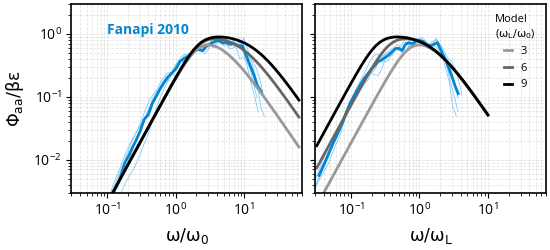

In [73]:
plt.close()
_,ax = plt.subplots(1,2, figsize=(5.5,2.5), constrained_layout=True, sharex='col', sharey='row')

ax[0].plot(specFan.omega/specFan.omega0, specFan.raw/1.8/specFan.eps, c='xkcd:sky', lw=0.6, alpha=1, label='_nolegend_')
bsp = sot.bin_stat_1d(specFan.omega/specFan.omega0, specFan.raw/1.8/specFan.eps, omega_dum0, ns_min=4)
ax[0].plot(bsp.x.m, bsp.y.m, c='xkcd:cerulean', lw=2, label='_nolegend_')
ax[0].text(1e-1, 1, 'Fan 2010', c='xkcd:cerulean', fontsize=10, fontweight='bold')
plot_specMs(omegaLo0, omega_dum0, PaaN0, ax[0])

ax[1].plot(specFan.omega/specFan.omegaL, specFan.raw/1.8/specFan.eps, c='xkcd:sky', lw=0.6, alpha=1, label='_nolegend_')
bsp = sot.bin_stat_1d(specFan.omega/specFan.omegaL, specFan.raw/1.8/specFan.eps, omega_dumL, ns_min=20)
ax[1].plot(bsp.x.m, bsp.y.m, c='xkcd:cerulean', lw=2, label='_nolegend_')
plot_specMs(omegaLo0, omega_dumL, PaaNL, ax[1])
ax[1].legend([str(i) for i in omegaLo0.ravel()], fontsize=8,
             title_fontsize=8, title=r'Model' '\n' '($\omega_L/\omega_0$)', handlelength=0.7, frameon=False)

ax[0].set_xlabel(r'$\omega/\omega_0$')
ax[1].set_xlabel(r'$\omega/\omega_L$')
for iax in ax.flat:
    iax.set(xscale='log', yscale='log', 
            xlim=(3e-2,7e1), ylim=(3e-3,3), ylabel=r'$\Phi_{aa}/\beta\epsilon$')
    iax.label_outer()

# plt.savefig(outfig_dir + 'fan_accLspec_nondimensional.png');

In [20]:
def hm_cubic(x, a, b, c):
    return a*x**3 + b*x**2 + c*x + 1

from scipy.optimize import curve_fit

In [21]:
xall = np.concatenate((spec11.wLowrms, spec12.wLowrms, spec71.wLowrms, spec72.wLowrms, 
                       spec97.wLowrms.dropna('fdrift'), spec98.wLowrms.dropna('fdrift'), specFan.wLowrms))
yall = np.concatenate((spec11.wcowrms, spec12.wcowrms, spec71.wcowrms, spec72.wcowrms, 
                       spec97.wcowrms.dropna('fdrift'), spec98.wcowrms.dropna('fdrift'), specFan.wcowrms))
pcrt = curve_fit(hm_cubic, xall, yall)[0]

In [22]:
pcrt

array([-0.35501897,  0.7057634 ,  0.02075603])

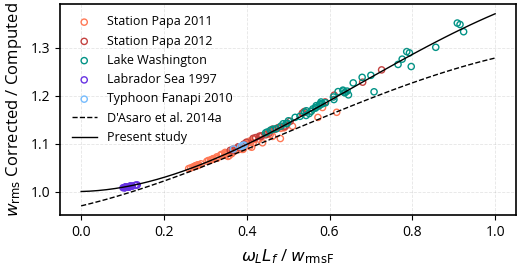

In [22]:
plt.close()
plt.figure(figsize=(5.2,2.7), constrained_layout=True)

xref = np.linspace(0,1)
yref = -0.206*xref**3 + 0.309*xref**2 + 0.206*xref + 0.97

plt.scatter(spec11.wLowrms, spec11.wcowrms, 20, facecolor='none', edgecolors=P11.color, lw=1)
plt.scatter(spec12.wLowrms, spec12.wcowrms, 20, facecolor='none', edgecolors=P12.color, lw=1)
plt.scatter(spec71.wLowrms, spec71.wcowrms, 20, facecolor='none', edgecolors=Lwa.color, lw=1)
plt.scatter(spec72.wLowrms, spec72.wcowrms, 20, facecolor='none', edgecolors=Lwa.color, lw=1, label='_nolegend_')
plt.scatter(spec97.wLowrms, spec97.wcowrms, 20, facecolor='none', edgecolors=L97.color, lw=1)
# plt.scatter(spec98.wLowrms, spec98.wcowrms, 20, facecolor='none', edgecolors='C2', lw=0.8, marker='^')
plt.scatter(specFan.wLowrms, specFan.wcowrms, 20, facecolor='none', edgecolors=Fan.color, lw=1)

plt.plot(xref, yref, c='k', lw=1, ls='--')
plt.plot(xref, hm_cubic(xref, *pcrt), 'k', lw=1)
# plt.xlim(0, 1.2)
# plt.ylim(1, 1.4)
plt.legend(['Station Papa 2011', 'Station Papa 2012', 'Lake Washington', 
            'Labrador Sea 1997', 'Typhoon Fanapi 2010', # 'Labrador Sea 1998',
            "D'Asaro et al. 2014a", 'Present study'],
           fontsize=9, loc='upper left', frameon=False)
plt.xlabel(r'$\omega_L L_f$ / $w_{\mathrm{rmsF}}$', fontsize=12)
plt.ylabel(r'$w_{\mathrm{rms}}$ Corrected / Computed', fontsize=12);

plt.savefig(outfig_dir + 'wrms_crt_fit.png', dpi=600);

In [30]:
x = np.concatenate([spec11.wLowrms.data, spec12.wLowrms.data, spec71.wLowrms.data, spec72.wLowrms.data, 
                    spec97.wLowrms.data, specFan.wLowrms.data])
y = np.concatenate([spec11.wcowrms.data, spec12.wcowrms.data, spec71.wcowrms.data, spec72.wcowrms.data, 
                    spec97.wcowrms.data, specFan.wcowrms.data])

np.nanstd(y - hm_cubic(x, *pcrt))

0.00619192747812232

In [3]:
# depth-dependent epsilon estimate based on scaling
P11 = P11.assign(epsilon=((1.76 - 0.58*np.abs(P11.z)/P11.LObukhov) * 0.85* \
                                P11.ustar2**(3/2)/kappa/np.abs(P11.z)).T)
P12 = P12.assign(epsilon=((1.76 - 0.58*np.abs(P12.z)/P12.LObukhov) * 0.85* \
                                P12.ustar2**(3/2)/kappa/np.abs(P12.z)).T)
Lwa71 = Lwa71.assign(epsilon=((1.76 - 0.58*np.abs(Lwa71.z)/Lwa71.LObukhov) * 0.85* \
                                Lwa71.ustar2**(3/2)/kappa/np.abs(Lwa71.z)).T)
Lwa72 = Lwa72.assign(epsilon=((1.76 - 0.58*np.abs(Lwa72.z)/Lwa72.LObukhov) * 0.85* \
                                Lwa72.ustar2**(3/2)/kappa/np.abs(Lwa72.z)).T)

In [4]:
p1eps_mean = P11.epsilon.mean(dim='z').groupby(P11.drift).mean().values
p2eps_mean = P12.epsilon.mean(dim='z').groupby(P12.drift).mean().values
l1eps_mean = Lwa71.epsilon.mean(dim='z').groupby(Lwa71.drift).mean().values
l2eps_mean = Lwa72.epsilon.mean(dim='z').groupby(Lwa72.drift).mean().values

p1eps_b = P11.epsbulk.groupby(P11.drift).mean().values
p2eps_b = P12.epsbulk.groupby(P12.drift).mean().values
l1eps_b = Lwa71.epsbulk.groupby(Lwa71.drift).mean().values
l2eps_b = Lwa72.epsbulk.groupby(Lwa72.drift).mean().values

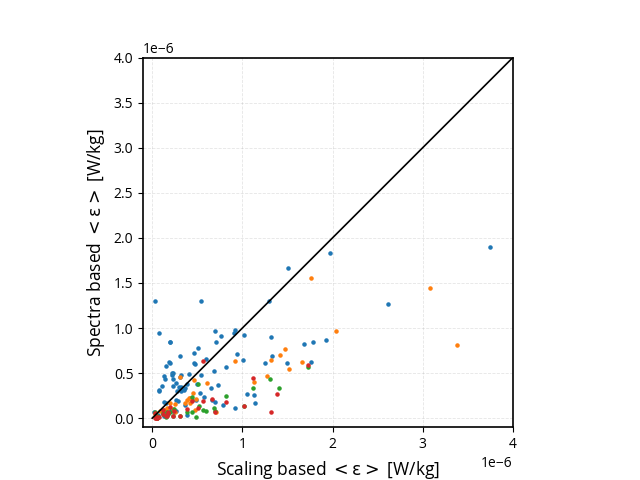

In [9]:
plt.close()
plt.figure()

plt.scatter(p1eps_mean, p1eps_b, 5)
plt.scatter(p2eps_mean, p2eps_b, 5)
plt.scatter(l1eps_mean, l1eps_b, 5)
plt.scatter(l2eps_mean, l2eps_b, 5)
plt.plot([0, 4e-6], [0, 4e-6], 'k')

# X = np.concatenate([p1eps_mean,p2eps_mean,l1eps_mean,l2eps_mean])
# Y = np.concatenate([p1eps_b,p2eps_b,l1eps_b,l2eps_b])
# # coef = np.polyfit(X[~np.isnan(Y)], Y[~np.isnan(Y)], 1)
# # poly1d_fn = np.poly1d(coef)
# a, _, _, _ = np.linalg.lstsq(X[:,None], Y)

# plt.plot(np.linspace(0,4e-6), a*(np.linspace(0,4e-6)), 'r')
                  
plt.gca().set_aspect('equal', 'box')
plt.gca().set(xlim=(-1e-7, 4e-6), ylim=((-1e-7, 4e-6)));

plt.xlabel(r'Scaling based $<\epsilon>$ [W/kg]')
plt.ylabel(r'Spectra based $<\epsilon>$ [W/kg]');

In [189]:
wf2bot11 = P11.wf2.where((P11.zoh<=-0.95) & (P11.zoh>=-1.05)).mean('z')/P11.ustar**2
wf2bot12 = P12.wf2.where((P12.zoh<=-0.95) & (P12.zoh>=-1.05)).mean('z')/P12.ustar**2

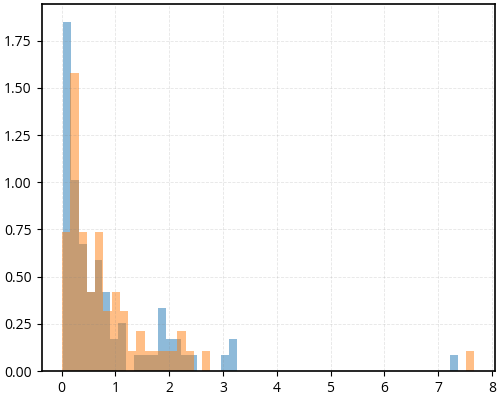

In [191]:
plt.close()
plt.figure(figsize=(5,4), constrained_layout=True)
plt.hist(wf2bot11, 50, density=True, alpha=0.5)
plt.hist(wf2bot12, 50, density=True, alpha=0.5);

In [30]:
P11dft = xr.open_dataset(data_root+'OCSP/NBF/OCSP_drifts_2011.nc').load()
P11dft.close()
P11dft

<xarray.Dataset>
Dimensions:  (time: 4725917)
Coordinates:
  * time     (time) datetime64[ns] 2011-02-09T17:25:34 ... 2011-05-21T15:58:27
Data variables: (12/16)
    drift    (time) int64 2 2 2 2 2 2 2 2 2 ... 108 108 108 108 108 108 108 108
    yd       (time) float64 40.73 40.73 40.73 40.73 ... 141.7 141.7 141.7 141.7
    z        (time) float64 -1.435 -1.384 -1.41 -1.442 ... -2.299 -2.281 -2.286
    w        (time) float64 0.0285 0.0129 -0.02932 ... 0.02381 0.006904 0.0134
    wf       (time) float64 0.01041 0.009748 0.009081 ... -0.001423 -0.001085
    wf2      (time) float64 0.0001084 9.503e-05 ... 2.026e-06 1.177e-06
    ...       ...
    ustar    (time) float64 0.01017 0.01017 0.01018 ... 0.01021 0.01021 0.01021
    wbf      (time) float64 -1.104e-08 -1.104e-08 ... -1.269e-08 -1.269e-08
    Bf       (time) float64 1.17e-08 1.17e-08 1.17e-08 ... 2.132e-08 2.132e-08
    bld      (time) float64 74.19 74.19 74.19 74.19 ... 45.05 45.05 45.05 45.05
    lat      (time) float64 50.03 50.03 50.03 50.03 ... 50.13 50.13 50.13 50.13
    lon      (time) float64 -145.0 -145.0 -145.0 -145.0 ... -144.2 -144.2 -144.2

In [ ]:
plt.close()
fig = plt.figure(figsize=(10,4.6), constrained_layout=True)

spec = fig.add_gridspec(16,1)
ax0 = fig.add_subplot(spec[:6, :])
ax0.plot(P11.myd, 100*P11.ustar)
ax0.plot(P11.myd, 100*P11.ustar/P11.LaSL2)
# plt.plot(P11.time.groupby(P11.drift).mean(), (1/P11.LaSL2).groupby(P11.drift).mean());
# plt.plot(P11.time.groupby(P11.drift).mean(), (P11.wf2.mean('z')/P11.ustar**2).groupby(P11.drift).mean());
# plt.plot(P11.time.groupby(P11.drift).mean(), (1/P11.LaSL2s).groupby(P11.drift).mean());

ax1 = fig.add_subplot(spec[6:, :], sharex=ax0)
ax1.plot(P11dft.yd, P11dft.z, '.', ms=0.05, color='gray')
TIME,Z = xr.broadcast(P11.myd, P11.z)
ax1.scatter(TIME.data.ravel(), P11.mz.data.ravel(), 5, P11.wf2our2.where(P11.maskBL&P11.Iequil).data.ravel(), 
            'o', cmap='Spectral_r', vmin=0, vmax=16)
ax1.plot(P11dft.yd, -P11dft.bld, '.k', ms=1);
# plt.colorbar();
ax0.set_ylim(0,7);
ax1.set_ylim(-70,0);
# ax1.set_xlim(126.3,142);
ax1.set_xlim(77.2,93.1);

#### Dummy ABL empirical curves

In [23]:
dum_zeta = np.concatenate((np.flip((-np.logspace(-5,1.5,50))), np.logspace(-5,1.5,50)))
dum_phi_VTKE = sot.get_emp_phi(dum_zeta, 'wrms', 'WilsonA')**2
dum_phi_VTKE_low = np.minimum(dum_phi_VTKE, sot.get_emp_phi(dum_zeta, 'wrms', 'WilsonB')**2)
dum_phi_VTKE_high = sot.get_emp_phi(dum_zeta, 'wrms', 'Panofsky')**2
KPPm_phi_VTKE = (1/sot.get_emp_phi(dum_zeta, 'mom', 'KPP'))**2
KPPh_phi_VTKE = (1/sot.get_emp_phi(dum_zeta, 'heat', 'KPP'))**2

### Bin data in $\zeta$ coordinate, separate stable and unstable conditions

#### use $\langle|z|\rangle$, and surface layer averaged shortwave radiation induced turbulent buoyancy flux

In [24]:
DOF = 5
bP11n = sot.bin_stat_1d(P11.zeta, P11.wf2our2*P11.cfac2, n=P11.ne, mask=P11.maskUSL, dof=DOF)#, x1=P11.Lat2, x2=P11.LaSL2)
bP12n = sot.bin_stat_1d(P12.zeta, P12.wf2our2*P12.cfac2, n=P12.ne, mask=P12.maskUSL, dof=DOF)#, x1=P12.Lat2, x2=P12.LaSL2)
bLwan = sot.bin_stat_1d(Lwa.zeta, Lwa.wf2our2*Lwa.cfac2, n=Lwa.ne, mask=Lwa.maskUSL, dof=DOF)#, x1=Lwa.Lat2, x2=Lwa.LaSL2)
bL97n = sot.bin_stat_1d(L97.zeta, L97.wf2our2*L97.cfac2, n=L97.ne, mask=L97.maskUSL, dof=DOF)#, x1=L97.Lat2, x2=L97.LaSL2)
bFann = sot.bin_stat_1d(Fan.zeta, Fan.wf2our2*Fan.cfac2, n=Fan.ne, mask=Fan.maskUSL, dof=DOF)#, x1=Fan.Lat2, x2=Fan.LaSL2)

bP11p = sot.bin_stat_1d(P11.zeta, P11.wf2our2*P11.cfac2, n=P11.ne, mask=P11.maskSSL, dof=DOF)#, x1=P11.Lat2, x2=P11.LaSL2)
bP12p = sot.bin_stat_1d(P12.zeta, P12.wf2our2*P12.cfac2, n=P12.ne, mask=P12.maskSSL, dof=DOF)#, x1=P12.Lat2, x2=P12.LaSL2)
# bLwap = sot.bin_stat_1d(Lwa.zeta, Lwa.wf2our2*Lwa.cfac2, n=Lwa.ne, mask=Lwa.maskSSL, dof=DOF, x1=Lwa.Lat2, x2=Lwa.LaSL2)
# bL97p = sot.bin_stat_1d(L97.zeta, L97.wf2our2*L97.cfac2, n=L97.ne, mask=L97.maskSSL, dof=DOF, x1=L97.Lat2, x2=L97.LaSL2)
bFanp = sot.bin_stat_1d(Fan.zeta, Fan.wf2our2*Fan.cfac2, n=Fan.ne, mask=Fan.maskSSL, dof=DOF)#, x1=Fan.Lat2, x2=Fan.LaSL2)

In [25]:
zeta_all = pd.concat([bP11n.x.m,bP12n.x.m,bLwan.x.m,bL97n.x.m,bFann.x.m, bP11p.x.m,bP12p.x.m,bFanp.x.m]).values
phiww_all = pd.concat([bP11n.y.s,bP12n.y.s,bLwan.y.s,bL97n.y.s,bFann.y.s, bP11p.y.s,bP12p.y.s,bFanp.y.s]).values
phiww_MO_all = sot.get_emp_phi(zeta_all, 'wrms', 'WilsonA')**2
sot.get_R2(phiww_all, phiww_MO_all)

-3.6050326681201392

In [13]:
np.mean(np.abs(phiww_MO_all-phiww_all)/phiww_all)

0.39260244816518897

In [13]:
np.corrcoef(phiww_MO_all, phiww_all)**2

array([[1.       , 0.1077698],
       [0.1077698, 1.       ]])

#### same as above, but no float size correction, no LabSea flux correction

In [26]:
DOF =5
bP11n_raw = sot.bin_stat_1d(P11.zeta, P11.wf2our2, n=P11.ne, mask=P11.maskUSL, dof=DOF)#, x1=P11.Lat2, x2=P11.LaSL2)
bP12n_raw = sot.bin_stat_1d(P12.zeta, P12.wf2our2, n=P12.ne, mask=P12.maskUSL, dof=DOF)#, x1=P12.Lat2, x2=P12.LaSL2)
bLwan_raw = sot.bin_stat_1d(Lwa.zeta, Lwa.wf2our2, n=Lwa.ne, mask=Lwa.maskUSL, dof=DOF)#, x1=Lwa.Lat2, x2=Lwa.LaSL2)
bL97n_raw = sot.bin_stat_1d(L97E.zeta, L97E.wf2our2, n=L97E.ne, mask=L97E.maskUSL, dof=DOF)#, x1=L97E.Lat2, x2=L97E.LaSL2)
bFann_raw = sot.bin_stat_1d(Fan.zeta, Fan.wf2our2, n=Fan.ne, mask=Fan.maskUSL, dof=DOF)#, x1=Fan.Lat2, x2=Fan.LaSL2)

bP11p_raw = sot.bin_stat_1d(P11.zeta, P11.wf2our2, n=P11.ne, mask=P11.maskSSL, dof=DOF)#, x1=P11.Lat2, x2=P11.LaSL2)
bP12p_raw = sot.bin_stat_1d(P12.zeta, P12.wf2our2, n=P12.ne, mask=P12.maskSSL, dof=DOF)#, x1=P12.Lat2, x2=P12.LaSL2)
bLwap_raw = sot.bin_stat_1d(Lwa.zeta, Lwa.wf2our2, n=Lwa.ne, mask=Lwa.maskSSL, dof=DOF)#, x1=Lwa.Lat2, x2=Lwa.LaSL2)
bL97p_raw = sot.bin_stat_1d(L97E.zeta, L97E.wf2our2, n=L97E.ne, mask=L97E.maskSSL, dof=DOF)#, x1=L97E.Lat2, x2=L97E.LaSL2)
bFanp_raw = sot.bin_stat_1d(Fan.zeta, Fan.wf2our2, n=Fan.ne, mask=Fan.maskSSL, dof=DOF)#, x1=Fan.Lat2, x2=Fan.LaSL2)

No data to bin!


### Figure: 1D bin averages of $\phi_{VTKE}$ $(\zeta)$

In [128]:
(np.log10(2e0) - np.log10(4e-4)) / (np.log10(2e-1) - np.log10(4e-4))

1.3705117131325855

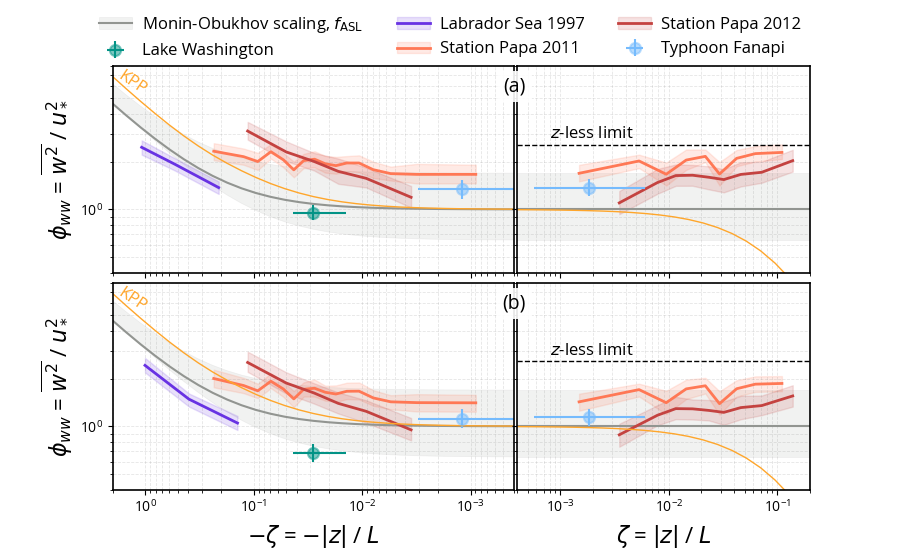

In [44]:
plt.close()
fig,ax = plt.subplots(2,2, figsize=(9,5.5), sharex='col', sharey='row', width_ratios=[1.37,1],# constrained_layout=True,
                      gridspec_kw=dict(hspace=0.05, wspace=0.01))
fgrid = plt.GridSpec(2,34, fig, hspace=0)

ax0 = ax[0,0]
ax0.axvline(0, c='k', ls=':')
ABL_line, = ax0.plot(-dum_zeta[dum_zeta<=0], dum_phi_VTKE[dum_zeta<0], lw=1.5, c='xkcd:grey')
ABL_patch = ax0.fill_between(-dum_zeta, dum_phi_VTKE_low, dum_phi_VTKE_high, lw=0.5,
                             color='xkcd:grey', alpha=0.12)
eLwa = plot_binstat(bLwan, c=Lwa.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eL97 = plot_binstat(bL97n, c=L97.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eP11 = plot_binstat(bP11n, c=P11.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eP12 = plot_binstat(bP12n, c=P12.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eFan = plot_binstat(bFann, c=Fan.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=8)
KPPwm, = ax0.plot(-dum_zeta, KPPm_phi_VTKE, lw=1, c='xkcd:mango')
# KPPwh, = ax0.plot(-dum_zeta, KPPh_phi_VTKE, lw=1, ls='--', c='xkcd:mango')
ax0.text(1.9, 7.8, 'KPP', fontsize=12, rotation=-34, color='xkcd:mango', va='top', ha='left')
ax0.text(1.03, 0.95, '(a)', fontsize=14, va='top', ha='left', transform=ax0.transAxes,
         clip_on=False, bbox=dict(facecolor='w', alpha=0.9, lw=0))
ax0.set_yscale('log')

ax1 = ax[0,1]
ax1.plot(dum_zeta[dum_zeta>0], dum_phi_VTKE[dum_zeta>0], lw=1.5, c='xkcd:grey')
ax1.fill_between(dum_zeta[dum_zeta>0], dum_phi_VTKE_low[dum_zeta>0], dum_phi_VTKE_high[dum_zeta>0],
                 lw=0.5, alpha=0.12, color='xkcd:grey')
plot_binstat(bP11p, c=P11.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bP12p, c=P12.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bFanp, c=Fan.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=8)
# plot_binstat(bL97p, c=L97.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=8)
ax1.plot(dum_zeta, KPPm_phi_VTKE, lw=1, c='xkcd:mango')
# ax1.plot(dum_zeta, KPPh_phi_VTKE, lw=1, ls='--', c='xkcd:mango')
ax1.text(0.03, 0.95, '(a)', fontsize=14, va='top', ha='right', transform=ax1.transAxes,
         clip_on=False, bbox=dict(facecolor='w', alpha=0.9, lw=0))
ax1.axhline(1.6**2, lw=1, c='k', ls='--')
ax1.text(8e-4, 2.8, r'$z$-less limit', fontsize=12)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylim(4e-1, 8)
ax1.set_xlim(4e-4,2e-1)

#### uncorrected data ####
ax2 = ax[1,0]
ax2.axvline(0, c='k', ls=':')
ax2.plot(-dum_zeta[dum_zeta<=0], dum_phi_VTKE[dum_zeta<0], lw=1.5, c='xkcd:grey')
ax2.fill_between(-dum_zeta, dum_phi_VTKE_low, dum_phi_VTKE_high, lw=0.5, color='xkcd:grey', alpha=0.12)
plot_binstat(bLwan_raw, c=Lwa.color, axis=ax2, condition='Destabilizing')#, marker='.', ms=5)
plot_binstat(bL97n_raw, c=L97.color, axis=ax2, condition='Destabilizing')#, marker='.', ms=5)
plot_binstat(bP11n_raw, c=P11.color, axis=ax2, condition='Destabilizing')#, marker='.', ms=5)
plot_binstat(bP12n_raw, c=P12.color, axis=ax2, condition='Destabilizing')#, marker='.', ms=5)
plot_binstat(bFann_raw, c=Fan.color, axis=ax2, condition='Destabilizing')#, marker='.', ms=8)
ax2.plot(-dum_zeta, KPPm_phi_VTKE, lw=1, c='xkcd:mango')
# ax2.plot(-dum_zeta, KPPh_phi_VTKE, lw=1, ls='--', c='xkcd:mango')
ax2.text(1.9, 7.8, 'KPP', fontsize=12, rotation=-34, color='xkcd:mango', va='top', ha='left')
ax2.text(1.03, 0.95, '(b)', fontsize=14, va='top', ha='left', transform=ax2.transAxes,
         clip_on=False, bbox=dict(facecolor='w', alpha=0.9, lw=0))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(4e-1, 8)
ax2.set_xlim(4e-4,2e0)
ax2.invert_xaxis()

ax3 = ax[1,1]
ax3.plot(dum_zeta[dum_zeta>0], dum_phi_VTKE[dum_zeta>0], lw=1.5, c='xkcd:grey')
ax3.fill_between(dum_zeta[dum_zeta>0], dum_phi_VTKE_low[dum_zeta>0], dum_phi_VTKE_high[dum_zeta>0],
                 lw=0.5, alpha=0.12, color='xkcd:grey')
plot_binstat(bP11p_raw, c=P11.color, axis=ax3, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bP12p_raw, c=P12.color, axis=ax3, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bFanp_raw, c=Fan.color, axis=ax3, condition='Stabilizing')#, marker='.', ms=8)
ax3.plot(dum_zeta, KPPm_phi_VTKE, lw=1, c='xkcd:mango')
ax3.text(0.03, 0.95, '(b)', fontsize=14, va='top', ha='right', transform=ax3.transAxes,
         clip_on=False, bbox=dict(facecolor='w', alpha=0.9, lw=0))
ax3.axhline(1.6**2, lw=1, c='k', ls='--')
ax3.text(8e-4, 2.8, r'$z$-less limit', fontsize=12)
ax3.set_xscale('log')
ax3.set_xlim(4e-4,2e-1)

ax0.set_ylabel(r'$\phi_{ww}$ = $\overline{w^2}$ / $u_*^2$', fontsize=16)
ax2.set_ylabel(r'$\phi_{ww}$ = $\overline{w^2}$ / $u_*^2$', fontsize=16)
ax2.set_xlabel(r'$-\zeta$ = $-|z|$ / $L$', fontsize=16)
ax3.set_xlabel(r'$\zeta$ = $|z|$ / $L$', fontsize=16);


fig.legend([(ABL_line,ABL_patch),
            # KPPwm, #KPPwh, 
            eLwa, eL97, eP11, eP12, eFan],
           [r'Monin-Obukhov scaling, $f_{\mathrm{ASL}}$',
            # 'KPP (momentom)', 
            'Lake Washington', 'Labrador Sea 1997', 
            'Station Papa 2011', 'Station Papa 2012', 'Typhoon Fanapi'],
           markerscale=1, fontsize=12, handler_map={ABL_line:HandlerLine2D(marker_pad=0)}, 
           handletextpad=0.6, frameon=False, ncol=3, loc='outside upper center');

plt.savefig(outfig_dir + 'phi_ww_1d_zeta.png', dpi=600, bbox_inches='tight');

#### skewness

In [137]:
DOF = 10
bP11n = sot.bin_stat_1d(P11.zeta, [P11.wf3,P11.wf2*P11.cfac2], n=P11.ne, mask=P11.maskUSL, dof=DOF, ystat=sot.wt_skew)#, x1=P11.Lat2, z2=P11.LaSL2
bP12n = sot.bin_stat_1d(P12.zeta, [P12.wf3,P12.wf2*P12.cfac2], n=P12.ne, mask=P12.maskUSL, dof=DOF, ystat=sot.wt_skew)#, x1=P12.Lat2, z2=P12.LaSL2
bLwan = sot.bin_stat_1d(Lwa.zeta, [Lwa.wf3,Lwa.wf2*Lwa.cfac2], n=Lwa.ne, mask=Lwa.maskUSL, dof=DOF, ystat=sot.wt_skew)#, x1=Lwa.Lat2, z2=Lwa.LaSL2
bL97n = sot.bin_stat_1d(L97.zeta, [L97.wf3,L97.wf2*L97.cfac2], n=L97.ne, mask=L97.maskUSL, dof=DOF, ystat=sot.wt_skew)#, x1=L97.Lat2, z2=L97.LaSL2
bFann = sot.bin_stat_1d(Fan.zeta, [Fan.wf3,Fan.wf2*Fan.cfac2], n=Fan.ne, mask=Fan.maskUSL, dof=DOF, ystat=sot.wt_skew)#, x1=Fan.Lat2, z2=Fan.LaSL2

bP11p = sot.bin_stat_1d(P11.zeta, [P11.wf3,P11.wf2*P11.cfac2], n=P11.ne, mask=P11.maskSSL, dof=DOF, ystat=sot.wt_skew)#, x1=P11.Lat2, z2=P11.LaSL2
bP12p = sot.bin_stat_1d(P12.zeta, [P12.wf3,P12.wf2*P12.cfac2], n=P12.ne, mask=P12.maskSSL, dof=DOF, ystat=sot.wt_skew)#, x1=P12.Lat2, z2=P12.LaSL2
bLwap = sot.bin_stat_1d(Lwa.zeta, [Lwa.wf3,Lwa.wf2*Lwa.cfac2], n=Lwa.ne, mask=Lwa.maskSSL, dof=DOF, ystat=sot.wt_skew)#, x1=Lwa.Lat2, z2=Lwa.LaSL2
bL97p = sot.bin_stat_1d(L97.zeta, [L97.wf3,L97.wf2*L97.cfac2], n=L97.ne, mask=L97.maskSSL, dof=DOF, ystat=sot.wt_skew)#, x1=L97.Lat2, z2=L97.LaSL2
bFanp = sot.bin_stat_1d(Fan.zeta, [Fan.wf3,Fan.wf2*Fan.cfac2], n=Fan.ne, mask=Fan.maskSSL, dof=DOF, ystat=sot.wt_skew)#, x1=Fan.Lat2, z2=Fan.LaSL2

No data to bin!
No data to bin!


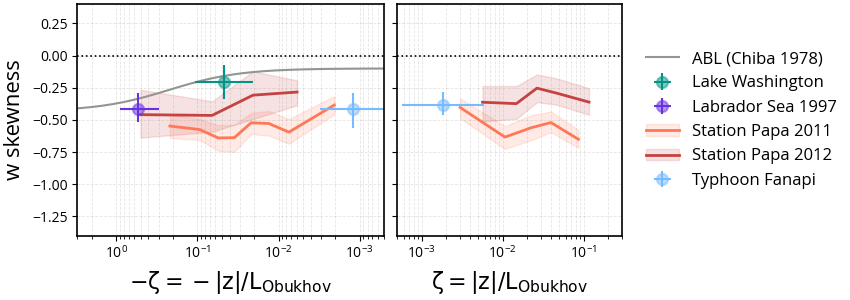

In [138]:
plt.close()
fig = plt.figure(figsize=(8.5,3), constrained_layout=True)
fgrid = plt.GridSpec(1,34, fig, hspace=0)

ax0 = plt.subplot(fgrid[:, :15])
ax0.axhline(0, c='k', ls=':')
dum_phi_wskew = sot.get_emp_phi(dum_zeta,'wskew',opt='Chiba78')
ABL_line, = ax0.plot(-dum_zeta[dum_zeta<=0], dum_phi_wskew[dum_zeta<0], lw=1.5, c='xkcd:grey')

eLwa = plot_binstat(bLwan, c=Lwa.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eL97 = plot_binstat(bL97n, c=L97.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eP11 = plot_binstat(bP11n, c=P11.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eP12 = plot_binstat(bP12n, c=P12.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=5)
eFan = plot_binstat(bFann, c=Fan.color, axis=ax0, condition='Destabilizing')#, marker='.', ms=8)
ax0.set_xscale('log')#, linthresh=10**(-3))
ax0.set_ylim(-1.4, .4)
ax0.set_xlim(3e0, 5e-4)

ax1 = plt.subplot(fgrid[:, 15:26])
ax1.axhline(0, c='k', ls=':')
# ax1.plot(dum_zeta[dum_zeta>0], dum_phi_VTKE[dum_zeta>0], lw=1.5, c='xkcd:grey')
# ax1.fill_between(dum_zeta[dum_zeta>0], dum_phi_VTKE_low[dum_zeta>0], dum_phi_VTKE_high[dum_zeta>0],
#                  lw=0.5, alpha=0.1, color='k')
plot_binstat(bP11p, c=P11.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bP12p, c=P12.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=5)
plot_binstat(bFanp, c=Fan.color, axis=ax1, condition='Stabilizing')#, marker='.', ms=8)
ax1.set_xscale('log')#, linthresh=10**(-3))
ax1.set_ylim(-1.4, .4)
ax1.set_xlim(5e-4,3e-1)
ax1.yaxis.set_ticklabels([])

plt.rcParams['text.usetex'] = True
ax0.set_xlabel(r'$-\zeta = -|z|/L_{Obukhov}$', fontsize=16)
ax0.set_ylabel('w skewness', fontsize=16);
ax1.set_xlabel(r'$\zeta = |z|/L_{Obukhov}$', fontsize=16);
plt.rcParams['text.usetex'] = False

ax2 = plt.subplot(fgrid[:, 26:])
ax2.legend([ABL_line, eLwa, eL97, eP11, eP12, eFan],
           ['ABL (Chiba 1978)',
            'Lake Washington', 'Labrador Sea 1997', 
            'Station Papa 2011', 'Station Papa 2012', 'Typhoon Fanapi'],
           markerscale=1, fontsize=12, handler_map={eLwa[0]:HandlerLine2D(marker_pad=0)}, 
           frameon=False, loc='center left');
ax2.set_axis_off()

# plt.savefig(outfig_dir + 'phi_wskew_1d_zeta.png');

### Bin data in $\eta$ and $\eta_e$ coordinate, removing ABL scaling before binning

In [35]:
DOF = 15
bP11m = sot.bin_stat_1d(P11.et, P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
                        n=P11.ne, mask=P11.maskSL, dof=DOF)#, x1=P11.zeta, x2=P11.bld/P11.LObukhov)
bP12m = sot.bin_stat_1d(P12.et, P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
                        n=P12.ne, mask=P12.maskSL, dof=DOF)#, x1=P12.zeta, x2=P12.bld/P12.LObukhov)
bLwam = sot.bin_stat_1d(Lwa.et, Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
                        n=Lwa.ne, mask=Lwa.maskSL, dof=DOF)#, x1=Lwa.zeta, x2=Lwa.bld/Lwa.LObukhov)
bL97m = sot.bin_stat_1d(L97.et, L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2, 
                        n=L97.ne, mask=L97.maskSL, dof=DOF)#, x1=L97.zeta, x2=L97.bld/L97.LObukhov)
bFanm = sot.bin_stat_1d(Fan.et, Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2, 
                        n=Fan.ne, mask=Fan.maskSL, dof=DOF)#, x1=Fan.zeta, x2=Fan.bld/Fan.LObukhov)

In [36]:
bP11me = sot.bin_stat_1d(P11.ete, P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
                        n=P11.ne, mask=P11.maskSL, dof=DOF)#, x1=P11.zeta, x2=P11.bld/P11.LObukhov)
bP12me = sot.bin_stat_1d(P12.ete, P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
                        n=P12.ne, mask=P12.maskSL, dof=DOF)#, x1=P12.zeta, x2=P12.bld/P12.LObukhov)
bLwame = sot.bin_stat_1d(Lwa.ete, Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
                        n=Lwa.ne, mask=Lwa.maskSL, dof=DOF)#, x1=Lwa.zeta, x2=Lwa.bld/Lwa.LObukhov)
bL97me = sot.bin_stat_1d(L97.ete, L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2, 
                        n=L97.ne, mask=L97.maskSL, dof=DOF)#, x1=L97.zeta, x2=L97.bld/L97.LObukhov)
bFanme = sot.bin_stat_1d(Fan.ete, Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2, 
                        n=Fan.ne, mask=Fan.maskSL, dof=DOF)#, x1=Fan.zeta, x2=Fan.bld/Fan.LObukhov)

### Bin data in $\mu$ and $\mu_e$ coordinate, removing ABL scaling before binning

In [37]:
DOF = 15
bP11m = sot.bin_stat_1d(P11.mu, P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
                        n=P11.ne, mask=P11.maskSL, dof=DOF, x1=P11.zeta, x2=P11.bld/P11.LObukhov)
bP12m = sot.bin_stat_1d(P12.mu, P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
                        n=P12.ne, mask=P12.maskSL, dof=DOF, x1=P12.zeta, x2=P12.bld/P12.LObukhov)
bLwam = sot.bin_stat_1d(Lwa.mu, Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
                        n=Lwa.ne, mask=Lwa.maskSL, dof=DOF, x1=Lwa.zeta, x2=Lwa.bld/Lwa.LObukhov)
bL97m = sot.bin_stat_1d(L97.mu, L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2, 
                        n=L97.ne, mask=L97.maskSL, dof=DOF, x1=L97.zeta, x2=L97.bld/L97.LObukhov)
bFanm = sot.bin_stat_1d(Fan.mu, Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2, 
                        n=Fan.ne, mask=Fan.maskSL, dof=DOF, x1=Fan.zeta, x2=Fan.bld/Fan.LObukhov)

In [38]:
bP11me = sot.bin_stat_1d(P11.mue, P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
                        n=P11.ne, mask=P11.maskSL, dof=DOF, x1=P11.zeta, x2=P11.bld/P11.LObukhov)
bP12me = sot.bin_stat_1d(P12.mue, P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
                        n=P12.ne, mask=P12.maskSL, dof=DOF, x1=P12.zeta, x2=P12.bld/P12.LObukhov)
bLwame = sot.bin_stat_1d(Lwa.mue, Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
                        n=Lwa.ne, mask=Lwa.maskSL, dof=DOF, x1=Lwa.zeta, x2=Lwa.bld/Lwa.LObukhov)
bL97me = sot.bin_stat_1d(L97.mue, L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2, 
                        n=L97.ne, mask=L97.maskSL, dof=DOF, x1=L97.zeta, x2=L97.bld/L97.LObukhov)
bFanme = sot.bin_stat_1d(Fan.mue, Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2, 
                        n=Fan.ne, mask=Fan.maskSL, dof=DOF, x1=Fan.zeta, x2=Fan.bld/Fan.LObukhov)

### Bin data in $La_{SL}^{-2}$ and $La_{t}^{-2}$ coordinate, removing ABL scaling before binning

In [39]:
# LaSLm2_bins = np.arange(0,5.6,0.1)
bP11sl = sot.bin_stat_1d(1/P11.LaSL2, P11.wf2our2*P11.cfac2/(sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2),
                           n=P11.ne, mask=P11.maskSL, dof=DOF)
bP12sl = sot.bin_stat_1d(1/P12.LaSL2, P12.wf2our2*P12.cfac2/(sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2),
                           n=P12.ne, mask=P12.maskSL, dof=DOF)
bLwasl = sot.bin_stat_1d(1/Lwa.LaSL2, Lwa.wf2our2*Lwa.cfac2/(sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2),
                           n=Lwa.ne, mask=Lwa.maskSL, dof=DOF)
bL97sl = sot.bin_stat_1d(1/L97.LaSL2, L97.wf2our2*L97.cfac2/(sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2),
                           n=L97.ne, mask=L97.maskSL, dof=DOF)
bFansl = sot.bin_stat_1d(1/Fan.LaSL2, Fan.wf2our2*Fan.cfac2/(sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2),
                           n=Fan.ne, mask=Fan.maskSL, dof=DOF)

In [40]:
# Latm2_bins = np.arange(0,70)
bP11t = sot.bin_stat_1d(1/P11.Lat2, P11.wf2our2*P11.cfac2/(sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2),
                           n=P11.ne, mask=P11.maskSL, dof=DOF)
bP12t = sot.bin_stat_1d(1/P12.Lat2, P12.wf2our2*P12.cfac2/(sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2),
                           n=P12.ne, mask=P12.maskSL, dof=DOF)
bLwat = sot.bin_stat_1d(1/Lwa.Lat2, Lwa.wf2our2*Lwa.cfac2/(sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2),
                           n=Lwa.ne, mask=Lwa.maskSL, dof=DOF)
bL97t = sot.bin_stat_1d(1/L97.Lat2, L97.wf2our2*L97.cfac2/(sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2),
                           n=L97.ne, mask=L97.maskSL, dof=DOF)
bFant = sot.bin_stat_1d(1/Fan.Lat2, Fan.wf2our2*Fan.cfac2/(sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2),
                           n=Fan.ne, mask=Fan.maskSL, dof=DOF)

In [41]:
def chi_1d_fit(x, b):
    return np.copysign(np.cbrt(1 + b*x)**2, 1+b*x)

In [42]:
xt = np.concatenate([bLwat.x.m, bL97t.x.m, bP11t.x.m, bP12t.x.m, bFant.x.m])
yt = np.concatenate([bLwat.y.s, bL97t.y.s, bP11t.y.s, bP12t.y.s, bFant.y.s])
pt,pcov = curve_fit(chi_1d_fit, xt, yt)
pterr = np.sqrt(np.diag(pcov))
rmset = np.mean((yt-chi_1d_fit(xt, *pt))**2)

xsl = np.concatenate([bLwasl.x.m, bL97sl.x.m, bP11sl.x.m, bP12sl.x.m, bFansl.x.m])
ysl = np.concatenate([bLwasl.y.s, bL97sl.y.s, bP11sl.y.s, bP12sl.y.s, bFansl.y.s])
psl,pcov = curve_fit(chi_1d_fit, xsl, ysl)
pslerr = np.sqrt(np.diag(pcov))
rmsesl = np.mean((ysl-chi_1d_fit(xsl, *psl))**2)

xm = np.concatenate([bLwam.x.m, bL97m.x.m, bP11m.x.m, bP12m.x.m, bFanm.x.m])
ym = np.concatenate([bLwam.y.s, bL97m.y.s, bP11m.y.s, bP12m.y.s, bFanm.y.s])
pm,pcov = curve_fit(chi_1d_fit, xm, ym)
pmerr = np.sqrt(np.diag(pcov))
rmsem = np.mean((ym-chi_1d_fit(xm, *pm))**2)

xme = np.concatenate([bLwame.x.m, bL97me.x.m, bP11me.x.m, bP12me.x.m, bFanme.x.m])
yme = np.concatenate([bLwame.y.s, bL97me.y.s, bP11me.y.s, bP12me.y.s, bFanme.y.s])
pme,pcov = curve_fit(chi_1d_fit, xme, yme)
pmeerr = np.sqrt(np.diag(pcov))
rmseme = np.mean((yme-chi_1d_fit(xme, *pme))**2)
# sot.get_R2(yme, chi_1d_fit(xme, *pme))
np.mean(np.abs(chi_1d_fit(xme, *pme)-yme)/yme)

0.13088028207495475

In [20]:
np.mean(np.abs(chi_1d_fit(xme, *pme)-yme)/yme)

0.13119719338338567

In [21]:
np.corrcoef(yme, chi_1d_fit(xme, *pme))**2

array([[1.        , 0.77667127],
       [0.77667127, 1.        ]])

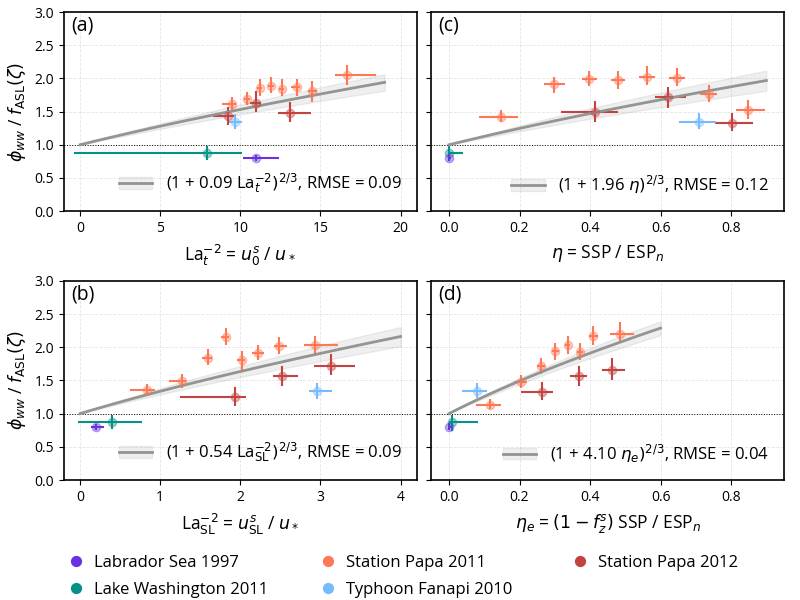

In [49]:
plt.close()
fig = plt.figure(figsize=(8,6))
fgrid = plt.GridSpec(2,10, fig)

ax0 = plt.subplot(fgrid[0, :5])
ax0.errorbar(bLwat.x.m, bLwat.y.s, xerr=bLwat.xmerr.T, yerr=bLwat.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax0.errorbar(bL97t.x.m, bL97t.y.s, xerr=bL97t.xmerr.T, yerr=bL97t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax0.errorbar(bP11t.x.m, bP11t.y.s, xerr=bP11t.xmerr.T, yerr=bP11t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax0.errorbar(bP12t.x.m, bP12t.y.s, xerr=bP12t.xmerr.T, yerr=bP12t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax0.errorbar(bFant.x.m, bFant.y.s, xerr=bFant.xmerr.T, yerr=bFant.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax0.axhline(1, ls=':', c='k', lw=0.7)
fit_t, = ax0.plot(np.linspace(0,19,100), chi_1d_fit(np.linspace(0,19,100), *pt), 'xkcd:grey', lw=2)
fit_t_err = ax0.fill_between(np.linspace(0,19,100), chi_1d_fit(np.linspace(0,19,100), *(pt-pterr)), 
                             chi_1d_fit(np.linspace(0,19,100), *(pt+pterr)), alpha=0.15, color='xkcd:grey')
ax0.legend([(fit_t,fit_t_err)], [rf'(1 + {pt[0]:.2f} La$_t^{{-2}})^{{2/3}}$, RMSE = {rmset:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax0.set_xlim(-1, 21)
ax0.set_ylim(0, 3)
ax0.text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax0.transAxes)
ax0.set_xlabel(r'La$_{t}^{-2}$ = $u^s_0$ / $u_*$')
ax0.set_ylabel(r'$\phi_{ww}$ / $f_{\mathrm{ASL}}(\zeta)$');


ax1 = plt.subplot(fgrid[1, :5])
eLwa = ax1.errorbar(bLwasl.x.m, bLwasl.y.s, xerr=bLwasl.xmerr.T, yerr=bLwasl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
eL97 = ax1.errorbar(bL97sl.x.m, bL97sl.y.s, xerr=bL97sl.xmerr.T, yerr=bL97sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
eP11 = ax1.errorbar(bP11sl.x.m, bP11sl.y.s, xerr=bP11sl.xmerr.T, yerr=bP11sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
eP12 = ax1.errorbar(bP12sl.x.m, bP12sl.y.s, xerr=bP12sl.xmerr.T, yerr=bP12sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
eFan = ax1.errorbar(bFansl.x.m, bFansl.y.s, xerr=bFansl.xmerr.T, yerr=bFansl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax1.axhline(1, ls=':', c='k', lw=0.7)
fit_sl, = ax1.plot(np.linspace(0,4,100), chi_1d_fit(np.linspace(0,4,100), *psl), 'xkcd:grey', lw=2)
fit_sl_err = ax1.fill_between(np.linspace(0,4,100), chi_1d_fit(np.linspace(0,4,100), *(psl-pslerr)), 
                              chi_1d_fit(np.linspace(0,4,100), *(psl+pslerr)), alpha=0.15, color='xkcd:grey')
ax1.legend([(fit_sl,fit_sl_err)], [rf'(1 + {psl[0]:.2f} La$_{{\mathrm{{SL}}}}^{{-2}})^{{2/3}}$, RMSE = {rmsesl:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax1.set_ylim(0, 3)
ax1.set_xlim(-0.2, 4.2)
ax1.text(0.02, 0.98, '(b)', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
ax1.set_xlabel(r'La$_{\mathrm{SL}}^{-2}$ = $u^s_{\mathrm{SL}}$ / $u_*$')
ax1.set_ylabel(r'$\phi_{ww}$ / $f_{\mathrm{ASL}}(\zeta)$');


ax2 = plt.subplot(fgrid[0, 5:10])
ax2.errorbar(bLwam.x.m, bLwam.y.s, xerr=bLwam.xmerr.T, yerr=bLwam.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax2.errorbar(bL97m.x.m, bL97m.y.s, xerr=bL97m.xmerr.T, yerr=bL97m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax2.errorbar(bP11m.x.m, bP11m.y.s, xerr=bP11m.xmerr.T, yerr=bP11m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax2.errorbar(bP12m.x.m, bP12m.y.s, xerr=bP12m.xmerr.T, yerr=bP12m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax2.errorbar(bFanm.x.m, bFanm.y.s, xerr=bFanm.xmerr.T, yerr=bFanm.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax2.axhline(1, ls=':', c='k', lw=0.7)
fit_m, = ax2.plot(np.linspace(0,0.9), chi_1d_fit(np.linspace(0,0.9), *pm), 'xkcd:grey', lw=2)
fit_m_err = ax2.fill_between(np.linspace(0,0.9), chi_1d_fit(np.linspace(0,0.9), *(pm-pmerr)), 
                              chi_1d_fit(np.linspace(0,0.9), *(pm+pmerr)), alpha=0.15, color='xkcd:grey')
ax2.legend([(fit_m,fit_m_err)], [rf'(1 + {pm[0]:.2f} $\eta)^{{2/3}}$, RMSE = {rmsem:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax2.yaxis.set_ticklabels([])
ax2.set_xlim(-0.05, 0.95)
ax2.set_ylim(0, 3)
ax2.text(0.02, 0.98, '(c)', fontsize=14, ha='left', va='top', transform=ax2.transAxes)
ax2.set_xlabel(r'$\eta$ = SSP / ESP$_n$')


ax3 = plt.subplot(fgrid[1, 5:10])
ax3.errorbar(bLwame.x.m, bLwame.y.s, xerr=bLwame.xmerr.T, yerr=bLwame.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax3.errorbar(bL97me.x.m, bL97me.y.s, xerr=bL97me.xmerr.T, yerr=bL97me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax3.errorbar(bP11me.x.m, bP11me.y.s, xerr=bP11me.xmerr.T, yerr=bP11me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax3.errorbar(bP12me.x.m, bP12me.y.s, xerr=bP12me.xmerr.T, yerr=bP12me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax3.errorbar(bFanme.x.m, bFanme.y.s, xerr=bFanme.xmerr.T, yerr=bFanme.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax3.axhline(1, ls=':', c='k', lw=0.7)
fit_me, = ax3.plot(np.linspace(0,0.6), chi_1d_fit(np.linspace(0,0.6), *pme), 'xkcd:grey', lw=2)
fit_me_err = ax3.fill_between(np.linspace(0,0.6), chi_1d_fit(np.linspace(0,0.6), *(pme-pmeerr)), 
                              chi_1d_fit(np.linspace(0,0.6), *(pme+pmeerr)), alpha=0.15, color='xkcd:grey')
ax3.legend([(fit_me,fit_me_err)], [rf'(1 + {pme[0]:.2f} $\eta_e)^{{2/3}}$, RMSE = {rmseme:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})

# ax3.plot(bLwame.x.m, chi_fit(np.vstack((bLwame.x1.m, bLwame.x.m)), *param_chi), c=Lwa.color, lw=2)
# ax3.plot(bL97me.x.m, chi_fit(np.vstack((bL97me.x1.m, bL97me.x.m)), *param_chi), c=L97.color, lw=2)
# ax3.plot(bP11me.x.m, chi_fit(np.vstack((bP11me.x1.m, bP11me.x.m)), *param_chi), c=P11.color, lw=2)
# ax3.plot(bP12me.x.m, chi_fit(np.vstack((bP12me.x1.m, bP12me.x.m)), *param_chi), c=P12.color, lw=2)
# ax3.plot(bFanme.x.m, chi_fit(np.vstack((bFanme.x1.m, bFanme.x.m)), *param_chi), c=Fan.color, lw=2)

ax3.yaxis.set_ticklabels([])
ax3.set_xlim(-0.05, 0.95)
ax3.set_ylim(0, 3)
ax3.text(0.02, 0.98, '(d)', fontsize=14, ha='left', va='top', transform=ax3.transAxes)
ax3.set_xlabel(r'$\eta_e$ = $(1-f_z^s)$ SSP / ESP$_n$');


plt.subplots_adjust(left=0.08, right=0.98, bottom=0.2, top=0.98, wspace=0.25, hspace=0.35);
ax4 = fig.add_axes([0.05, 0, 0.9, 0.1])
ax4.spines['bottom'].set_color('white')
ax4.spines['top'].set_color('white') 
ax4.spines['right'].set_color('white')
ax4.spines['left'].set_color('white')
ax4.axes.get_yaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
x_c1 = 0.05
x_c2 = 0.4
x_c3 = 0.75
y_r1 = 0.65
y_r2 = 0.2
add_legend(ax4, x_c1, y_r1, L97.color, 'Labrador Sea 1997', s=50)
add_legend(ax4, x_c2, y_r1, P11.color, 'Station Papa 2011', s=50)
add_legend(ax4, x_c3, y_r1, P12.color, 'Station Papa 2012', s=50)
add_legend(ax4, x_c1, y_r2, Lwa.color, 'Lake Washington 2011', s=50)
add_legend(ax4, x_c2, y_r2, Fan.color, 'Typhoon Fanapi 2010', s=50)

plt.savefig(outfig_dir + 'phi_ww_1d_La_et.png', dpi=600);

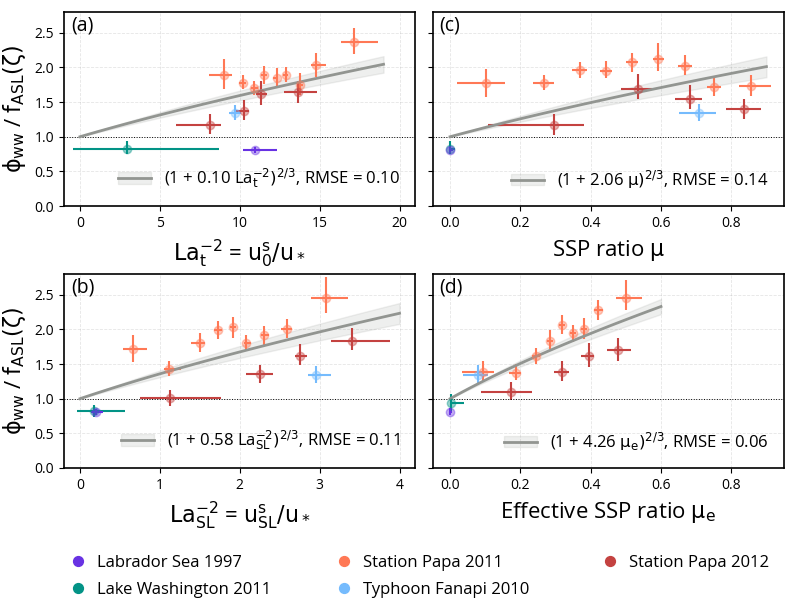

In [16]:
plt.close()
fig = plt.figure(figsize=(8,6))
fgrid = plt.GridSpec(2,10, fig)

ax0 = plt.subplot(fgrid[0, :5])
ax0.errorbar(bLwat.x.m, bLwat.y.s, xerr=bLwat.xmerr.T, yerr=bLwat.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax0.errorbar(bL97t.x.m, bL97t.y.s, xerr=bL97t.xmerr.T, yerr=bL97t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax0.errorbar(bP11t.x.m, bP11t.y.s, xerr=bP11t.xmerr.T, yerr=bP11t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax0.errorbar(bP12t.x.m, bP12t.y.s, xerr=bP12t.xmerr.T, yerr=bP12t.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax0.errorbar(bFant.x.m, bFant.y.s, xerr=bFant.xmerr.T, yerr=bFant.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax0.axhline(1, ls=':', c='k', lw=0.7)
fit_t, = ax0.plot(np.linspace(0,19,100), chi_1d_fit(np.linspace(0,19,100), *pt), 'xkcd:grey', lw=2)
fit_t_err = ax0.fill_between(np.linspace(0,19,100), chi_1d_fit(np.linspace(0,19,100), *(pt-pterr)), 
                             chi_1d_fit(np.linspace(0,19,100), *(pt+pterr)), alpha=0.15, color='xkcd:grey')
ax0.legend([(fit_t,fit_t_err)], [f'(1 + {pt[0]:.2f} La$_t^{{-2}})^{{2/3}}$, RMSE = {rmset:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax0.set_xlim(-1, 21)
ax0.set_ylim(0, 2.8)
ax0.text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax0.transAxes)
ax0.set_xlabel(r'$La_{t}^{-2}$ = $u^s_0/u_*$', fontsize=16)
ax0.set_ylabel(r'$\phi_{ww}$ / $f_{ASL}(\zeta)$', fontsize=16);


ax1 = plt.subplot(fgrid[1, :5])
eLwa = ax1.errorbar(bLwasl.x.m, bLwasl.y.s, xerr=bLwasl.xmerr.T, yerr=bLwasl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
eL97 = ax1.errorbar(bL97sl.x.m, bL97sl.y.s, xerr=bL97sl.xmerr.T, yerr=bL97sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
eP11 = ax1.errorbar(bP11sl.x.m, bP11sl.y.s, xerr=bP11sl.xmerr.T, yerr=bP11sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
eP12 = ax1.errorbar(bP12sl.x.m, bP12sl.y.s, xerr=bP12sl.xmerr.T, yerr=bP12sl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
eFan = ax1.errorbar(bFansl.x.m, bFansl.y.s, xerr=bFansl.xmerr.T, yerr=bFansl.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax1.axhline(1, ls=':', c='k', lw=0.7)
fit_sl, = ax1.plot(np.linspace(0,4,100), chi_1d_fit(np.linspace(0,4,100), *psl), 'xkcd:grey', lw=2)
fit_sl_err = ax1.fill_between(np.linspace(0,4,100), chi_1d_fit(np.linspace(0,4,100), *(psl-pslerr)), 
                              chi_1d_fit(np.linspace(0,4,100), *(psl+pslerr)), alpha=0.15, color='xkcd:grey')
ax1.legend([(fit_sl,fit_sl_err)], [f'(1 + {psl[0]:.2f} La$_{{SL}}^{{-2}})^{{2/3}}$, RMSE = {rmsesl:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax1.set_ylim(0, 2.8)
ax1.set_xlim(-0.2, 4.2)
ax1.text(0.02, 0.98, '(b)', fontsize=14, ha='left', va='top', transform=ax1.transAxes)
ax1.set_xlabel(r'$La_{SL}^{-2}$ = $u^s_{SL}/u_*$', fontsize=16)
ax1.set_ylabel(r'$\phi_{ww}$ / $f_{ASL}(\zeta)$', fontsize=16);


ax2 = plt.subplot(fgrid[0, 5:10])
ax2.errorbar(bLwam.x.m, bLwam.y.s, xerr=bLwam.xmerr.T, yerr=bLwam.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax2.errorbar(bL97m.x.m, bL97m.y.s, xerr=bL97m.xmerr.T, yerr=bL97m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax2.errorbar(bP11m.x.m, bP11m.y.s, xerr=bP11m.xmerr.T, yerr=bP11m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax2.errorbar(bP12m.x.m, bP12m.y.s, xerr=bP12m.xmerr.T, yerr=bP12m.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax2.errorbar(bFanm.x.m, bFanm.y.s, xerr=bFanm.xmerr.T, yerr=bFanm.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax2.axhline(1, ls=':', c='k', lw=0.7)
fit_m, = ax2.plot(np.linspace(0,0.9), chi_1d_fit(np.linspace(0,0.9), *pm), 'xkcd:grey', lw=2)
fit_m_err = ax2.fill_between(np.linspace(0,0.9), chi_1d_fit(np.linspace(0,0.9), *(pm-pmerr)), 
                              chi_1d_fit(np.linspace(0,0.9), *(pm+pmerr)), alpha=0.15, color='xkcd:grey')
ax2.legend([(fit_m,fit_m_err)], [f'(1 + {pm[0]:.2f} $\mu)^{{2/3}}$, RMSE = {rmsem:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})
ax2.yaxis.set_ticklabels([])
ax2.set_xlim(-0.05, 0.95)
ax2.set_ylim(0, 2.8)
ax2.text(0.02, 0.98, '(c)', fontsize=14, ha='left', va='top', transform=ax2.transAxes)
ax2.set_xlabel(r'SSP ratio $\mu$', fontsize=16)


ax3 = plt.subplot(fgrid[1, 5:10])
ax3.errorbar(bLwame.x.m, bLwame.y.s, xerr=bLwame.xmerr.T, yerr=bLwame.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Lwa.color,0.4), c=Lwa.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Lwa.color, lw=1)
ax3.errorbar(bL97me.x.m, bL97me.y.s, xerr=bL97me.xmerr.T, yerr=bL97me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(L97.color,0.4), c=L97.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=L97.color, lw=1)
ax3.errorbar(bP11me.x.m, bP11me.y.s, xerr=bP11me.xmerr.T, yerr=bP11me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P11.color,0.4), c=P11.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P11.color, lw=1)
ax3.errorbar(bP12me.x.m, bP12me.y.s, xerr=bP12me.xmerr.T, yerr=bP12me.yserr.T,
                   ls='none', mfc=mcl.to_rgba(P12.color,0.4), c=P12.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=P12.color, lw=1)
ax3.errorbar(bFanme.x.m, bFanme.y.s, xerr=bFanme.xmerr.T, yerr=bFanme.yserr.T,
                   ls='none', mfc=mcl.to_rgba(Fan.color,0.4), c=Fan.color, marker='o',
                   ms=6, elinewidth=1.5, mew=1, ecolor=Fan.color, lw=1)
ax3.axhline(1, ls=':', c='k', lw=0.7)
fit_me, = ax3.plot(np.linspace(0,0.6), chi_1d_fit(np.linspace(0,0.6), *pme), 'xkcd:grey', lw=2)
fit_me_err = ax3.fill_between(np.linspace(0,0.6), chi_1d_fit(np.linspace(0,0.6), *(pme-pmeerr)), 
                              chi_1d_fit(np.linspace(0,0.6), *(pme+pmeerr)), alpha=0.15, color='xkcd:grey')
ax3.legend([(fit_me,fit_me_err)], [f'(1 + {pme[0]:.2f} $\mu_e)^{{2/3}}$, RMSE = {rmseme:.2f}'], 
           fontsize=12, frameon=False, framealpha=1, loc='lower right', handler_map={tuple:HandlerTuple()})

# ax3.plot(bLwame.x.m, chi_fit(np.vstack((bLwame.x1.m, bLwame.x.m)), *param_chi), c=Lwa.color, lw=2)
# ax3.plot(bL97me.x.m, chi_fit(np.vstack((bL97me.x1.m, bL97me.x.m)), *param_chi), c=L97.color, lw=2)
# ax3.plot(bP11me.x.m, chi_fit(np.vstack((bP11me.x1.m, bP11me.x.m)), *param_chi), c=P11.color, lw=2)
# ax3.plot(bP12me.x.m, chi_fit(np.vstack((bP12me.x1.m, bP12me.x.m)), *param_chi), c=P12.color, lw=2)
# ax3.plot(bFanme.x.m, chi_fit(np.vstack((bFanme.x1.m, bFanme.x.m)), *param_chi), c=Fan.color, lw=2)

ax3.yaxis.set_ticklabels([])
ax3.set_xlim(-0.05, 0.95)
ax3.set_ylim(0, 2.8)
ax3.text(0.02, 0.98, '(d)', fontsize=14, ha='left', va='top', transform=ax3.transAxes)
ax3.set_xlabel(r'Effective SSP ratio $\mu_e$', fontsize=16);


plt.subplots_adjust(left=0.08, right=0.98, bottom=0.22, top=0.98, wspace=0.3, hspace=0.35);
ax4 = fig.add_axes([0.05, 0, 0.95, 0.1])
ax4.spines['bottom'].set_color('white')
ax4.spines['top'].set_color('white') 
ax4.spines['right'].set_color('white')
ax4.spines['left'].set_color('white')
ax4.axes.get_yaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
x_c1 = 0.05
x_c2 = 0.4
x_c3 = 0.75
y_r1 = 0.65
y_r2 = 0.2
add_legend(ax4, x_c1, y_r1, L97.color, 'Labrador Sea 1997', s=50)
add_legend(ax4, x_c2, y_r1, P11.color, 'Station Papa 2011', s=50)
add_legend(ax4, x_c3, y_r1, P12.color, 'Station Papa 2012', s=50)
add_legend(ax4, x_c1, y_r2, Lwa.color, 'Lake Washington 2011', s=50)
add_legend(ax4, x_c2, y_r2, Fan.color, 'Typhoon Fanapi 2010', s=50)

# plt.savefig(outfig_dir + 'phi_ww_1d_La_mu.png');

### Bin data in $\zeta$ and effective $\mu$ coordinate

#### bin data after removing ABL scaling

In [169]:
# number of dataset used is determined by the first arguement
# no L97 gives better results
DOF = 15
bzm1 = sot.bin_stat_2d([P11.zeta, P12.zeta, Lwa.zeta, Fan.zeta, L97.zeta], 
       [P11.mue, P12.mue, Lwa.mue, Fan.mue, L97.mue], 
       [P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
        P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
        Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
        Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2,
        L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2], 
       [P11.ne, P12.ne, Lwa.ne, Fan.ne, L97.ne], 
       [P11.maskUSL, P12.maskUSL, Lwa.maskUSL, Fan.maskUSL, L97.maskUSL], 
       dof=DOF, coord_err='quat')

bzm2 = sot.bin_stat_2d([P11.zeta, P12.zeta, Lwa.zeta, Fan.zeta, L97.zeta], 
       [P11.mue, P12.mue, Lwa.mue, Fan.mue, L97.mue], 
       [P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
        P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
        Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
        Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2,
        L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2], 
       [P11.ne, P12.ne, Lwa.ne, Fan.ne, L97.ne], 
       [P11.maskSSL, P12.maskSSL, Lwa.maskSSL, Fan.maskSSL, L97.maskSSL], 
       dof=DOF, coord_err='quat')

#### same as above, but use $\eta_e$

In [84]:
# number of dataset used is determined by the first arguement
# no L97 gives better results
DOF = 15
bzm1 = sot.bin_stat_2d([P11.zeta, P12.zeta, Lwa.zeta, Fan.zeta, L97.zeta], 
       [P11.ete, P12.ete, Lwa.ete, Fan.ete, L97.ete], 
       [P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
        P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
        Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
        Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2,
        L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2], 
       [P11.ne, P12.ne, Lwa.ne, Fan.ne, L97.ne], 
       [P11.maskUSL, P12.maskUSL, Lwa.maskUSL, Fan.maskUSL, L97.maskUSL], 
       dof=DOF, coord_err='quat')
bzm2 = sot.bin_stat_2d([P11.zeta, P12.zeta, Lwa.zeta, Fan.zeta, L97.zeta], 
       [P11.ete, P12.ete, Lwa.ete, Fan.ete, L97.ete], 
       [P11.wf2our2*P11.cfac2/sot.get_emp_phi(P11.zeta,'wrms','WilsonA')**2, 
        P12.wf2our2*P12.cfac2/sot.get_emp_phi(P12.zeta,'wrms','WilsonA')**2, 
        Lwa.wf2our2*Lwa.cfac2/sot.get_emp_phi(Lwa.zeta,'wrms','WilsonA')**2, 
        Fan.wf2our2*Fan.cfac2/sot.get_emp_phi(Fan.zeta,'wrms','WilsonA')**2,
        L97.wf2our2*L97.cfac2/sot.get_emp_phi(L97.zeta,'wrms','WilsonA')**2], 
       [P11.ne, P12.ne, Lwa.ne, Fan.ne, L97.ne], 
       [P11.maskSSL, P12.maskSSL, Lwa.maskSSL, Fan.maskSSL, L97.maskSSL], 
       dof=DOF, coord_err='quat')

In [85]:
# total error for chi = phi/ABL scaling
bzm1['det'] = bzm1.d[:,:,2] - bzm1.d[:,:,0]
bzm2['det'] = bzm2.d[:,:,2] - bzm2.d[:,:,0]

bzm = xr.concat([bzm1,bzm2], dim='xb')

In [79]:
def chi_fit(xy, a1, a2, a3):
    x, y = xy
    return np.cbrt(1 + a1*y + a2*y**2 + a3*y*x)
    # return np.copysign(np.cbrt(1 + a1*y + a2*y*x)**2, 1+a1*y+a2*y*x)

def phi_fit(xy, cL):
    x, y = xy
    phim = sot.get_emp_phi(x,'mom',opt='KPP')
    chim = 1#/(1 + cL*y)
    return (phim*chim - 4.5*x + cL*y)**(2/3)

In [80]:
xydata = np.vstack((bzm.x[:,:,1].data.ravel(), bzm.y[:,:,1].data.ravel()))
zdata = bzm.d[:,:,1].data.ravel()
param_phi = curve_fit(phi_fit, xydata, zdata)[0]
param_phi

array([4.62350934])

In [81]:
np.mean((zdata-phi_fit(xydata, *param_phi))**2)

0.023712420070902164

In [82]:
zetabins = np.concatenate((-np.flip(np.logspace(-2.7,-0.15,20)), np.logspace(-2.7,-1,17)))
mubins = np.linspace(0,0.5,51)
xx, yy = np.meshgrid(zetabins, mubins)
zz = phi_fit(np.vstack((xx.ravel(), yy.ravel())), *param_phi).reshape(xx.shape)
zz.max()

3.3076336941246063

In [114]:
# np.log10(2e-1/2e-3)/np.log10(1e-1/2e-3)*17
# pH15 = sio.loadmat(data_root+'OCSP/phi_ww_H15.mat', squeeze_me=True, struct_as_record=False)
# pH15['chin'] = pH15['pwwn']/sot.get_emp_phi(np.tile(pH15['zetn'],(101,1)),'wrms','WilsonA')**2
# pH15['chip'] = pH15['pwwp']/sot.get_emp_phi(np.tile(pH15['zetp'],(101,1)),'wrms','WilsonA')**2

/home/zhihua/miniconda3/envs/scaOSBL/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


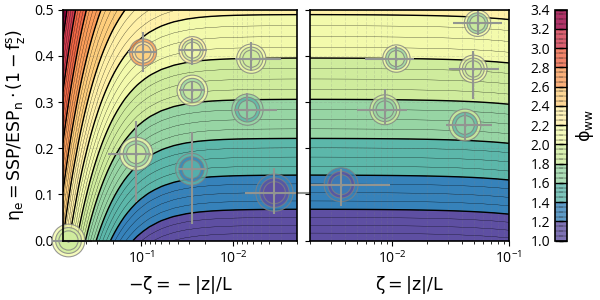

In [83]:
plt.close()

fig = plt.figure(figsize=(6,3), constrained_layout=True)
fgrid = plt.GridSpec(1,38, fig, hspace=0)
cmap = plt.cm.Spectral_r
cmax = np.ceil(zz.max()*5)/5
carray = np.arange(1,cmax+0.2,0.2)
carray1 = np.arange(1,cmax+0.05,0.05)
norm = mcl.BoundaryNorm(carray, cmap.N)

ax0 = plt.subplot(fgrid[:, :20])
ax0.contourf(-xx, yy, zz, levels=carray, cmap=cmap, norm=norm)#vmin=1, vmax=3, 
ax0.contour(-xx, yy, zz, levels=carray1, colors='k', linewidths=0.2)
ax0.contour(-xx, yy, zz, levels=carray, colors='k', linewidths=1)
# ax0.contour(-pH15['zetn'], pH15['mue'], pH15['chin'], levels=carray[2:], colors='k', linewidths=1.2)
ax0.scatter(-bzm1.x[:,:,1], bzm1.y[:,:,1], bzm.det.min()/bzm1.det*720, bzm1.d[:,:,2], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2, clip_on=False)
ax0.scatter(-bzm1.x[:,:,1], bzm1.y[:,:,1], bzm.det.min()/bzm1.det*450, bzm1.d[:,:,0], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2, clip_on=False)
ax0.scatter(-bzm1.x[:,:,1], bzm1.y[:,:,1], bzm.det.min()/bzm1.det*250, bzm1.d[:,:,1], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2, clip_on=False)
ax0.errorbar(-bzm1.x[:,:,1].data.ravel(), bzm1.y[:,:,1].data.ravel(), xerr=np.flipud(bzm1.x.diff('stat').data.reshape(-1,2).T), 
             yerr=bzm1.y.diff('stat').T.data.reshape(2,-1), zorder=2, 
             ls='none', c='xkcd:grey', marker='o', ms=1, elinewidth=1.5, mew=1, clip_on=False)
ax0.set_xscale('log')
ax0.set_ylim(0, 0.5)
ax0.set_xlim(7e-1, 2e-3)
ax0.set_xlabel(r'$-\zeta = -|z|/L$')
ax0.set_ylabel(r'$\eta_e = SSP/ESP_n \cdot (1-f_z^s)$');

ax1 = plt.subplot(fgrid[:, 20:37])
ax1.contourf(xx, yy, zz, levels=carray, cmap=cmap, norm=norm)
ax1.contour(xx, yy, zz, levels=carray1, colors='k', linewidths=0.2)
ax1.contour(xx, yy, zz, levels=carray, colors='k', linewidths=1)
# ax1.contour(pH15['zetp'], pH15['mue'], pH15['chip'], levels=carray[2:], colors='k', linewidths=1.2)
s2d = ax1.scatter(bzm2.x[:,:,1], bzm2.y[:,:,1], bzm.det.min()/bzm2.det*720, bzm2.d[:,:,2], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2)
ax1.scatter(bzm2.x[:,:,1], bzm2.y[:,:,1], bzm.det.min()/bzm2.det*450, bzm2.d[:,:,0], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2)
ax1.scatter(bzm2.x[:,:,1], bzm2.y[:,:,1], bzm.det.min()/bzm2.det*250, bzm2.d[:,:,1], 
            'o', edgecolor='gray', lw=0.8, cmap=cmap, norm=norm, alpha=0.8, zorder=2)
ax1.errorbar(bzm2.x[:,:,1].data.ravel(), bzm2.y[:,:,1].data.ravel(), xerr=bzm2.x.diff('stat').data.reshape(-1,2).T, 
             yerr=bzm2.y.diff('stat').T.data.reshape(2,-1),
             ls='none', c='xkcd:grey', marker='o', ms=1, elinewidth=1.5, mew=1)
ax1.set_xscale('log')
ax1.set_ylim(0, 0.5)
ax1.set_xlim(2e-3, 1e-1)
ax1.yaxis.set_ticklabels([])
ax1.set_xlabel(r'$\zeta = |z|/L$')

ax2 = plt.subplot(fgrid[:, 37:])
cbar = plt.colorbar(s2d, cax=ax2)
cbar.set_label(r'$\phi_{ww}$')
ax2.tick_params(axis='y', which='major', direction='in', length=6, color='k', width=1, 
                labelleft=True, labelright=False, left=True, right=True)
ax2.tick_params(axis='y', which='minor', direction='in', length=6, color='k', width=0.2, 
                labelleft=False, labelright=False, left=True, right=True)
ax2.yaxis.set_ticks(carray, major=True)
ax2.yaxis.set_ticks(carray1, minor=True);

# plt.savefig(outfig_dir + 'phi_ww_2d_zeta_ete.png');

### Scaling $\overline{w^2}$ in the boundary layer

#### Scaling bulk average of $\overline{w^2}$

In [32]:
def convective_w2(zoh, a, b):
    return a*abs(zoh)**(2/3)*(1+b*zoh)**2

def neutral_slw2(zeta, cB):
    phim = sot.get_emp_phi(zeta,'mom',opt='KPP')
    return (phim - cB*zeta)**(2/3)

def neutral_bkw2(lasl, cL):
    cS = 0.64**(3/2)
    alpha_L = cS/(cS + cL*lasl**(-2))
    gamma_S = 1#1 - alpha_L
    return (alpha_L*cS + gamma_S*cL*lasl**(-2))**(2/3)

def bin_wr3our3_LaSLm2(x, y, d, n, bins=None, coords=None):
    xc, yc = coords
    bnd = stats.binned_statistic_2d(xc, yc, [n, x*n, y*n, d*n], statistic='sum', bins=bins)[0]
    mn = bnd[0]
    mn[mn==0] = nan
    gmask = ~np.isnan(mn)
    mx = (bnd[1][gmask]/mn[gmask]).ravel()
    my = (bnd[2][gmask]/mn[gmask]).ravel()
    md = (bnd[3][gmask]/mn[gmask]).ravel()
    mnxyd = np.column_stack([mn[gmask], mx, my, md])
    return mnxyd

def pf2bk(pf):
    bk = pf.weighted(pf.ne).mean('yb')
    bk.update({'ne': pf.ne.sum('yb')})
    if 'x3' in list(pf.keys()):
        bk['phi'] = bk.d/bk.x2[:,1]
        bk['wr3our3'] = bk.x1*bk.x2[:,1]**(-3/2)
        bk['LaSLm2'] = bk.x3*bk.x2[:,1]**(-1/2)
    else:
        bk['phi'] = bk.d
        bk['wr3our3'] = bk.x1
        bk['LaSLm2'] = bk.x2
    # bk['phin'] = np.cbrt(bk.phi**(3/2) - 0.3113**(3/2)*bk.wr3our3)**2
    
    # quality of the uniform sampling in the boundary layer
    nzoh = pf.dims['yb']
    zoh_uniform = np.linspace(-1+1/nzoh/2, -1/nzoh/2, nzoh)[:,None]
    mask_unisam = (np.sqrt(((pf.y.loc[:,:,'m'] - zoh_uniform)**2).mean('yb')) <= 0.1) | \
                  ((bk.y.loc[:,'m'] <= -0.4) & (bk.y.loc[:,'m'] >= -0.6))
    var_list = ['phi','wr3our3','LaSLm2','ne','x','y']
    bk = bk[var_list].where(mask_unisam, drop=True)
    
    # further average in LaSLm2 and wr3our3 space
    xbins = np.concatenate([np.linspace(-1,-0.1,3), np.linspace(-0.05,0.05,3), 
                            np.linspace(0.1,1,3), np.linspace(5.5,10,2), np.linspace(55,100,2)])
    ybins = np.arange(0,5)
    bnd = xr.apply_ufunc(bin_wr3our3_LaSLm2, bk.wr3our3, bk.LaSLm2, bk.phi, bk.ne, 
                         input_core_dims=[['xb'], ['xb'], ['xb'], ['xb']], output_core_dims=[['point','param']], 
                         vectorize=True, output_dtypes=[float], 
                         kwargs={'bins': (xbins, ybins), 'coords': (bk.wr3our3[:,1], bk.LaSLm2[:,1])})
    
    bbk = xr.merge([bnd.isel(param=0).rename('ne'), bnd.isel(param=1).rename('wr3our3'), 
                    bnd.isel(param=2).rename('LaSLm2'), bnd.isel(param=3).rename('phi')]).transpose('point', 'stat')
    return bbk

def w2bk_model(xy, cB):
    laslm2, wr3our3 = xy
    cS = 0.64**(3/2)
    cL = 0.498
    alpha_B = cS / (cS + cB*wr3our3) #np.maximum(,0)
    alpha_L = cS / (cS + cL*laslm2)
    w3bk = alpha_L*alpha_B*cS + cL*laslm2 + cB*wr3our3
    w2bk = np.copysign(np.cbrt(w3bk)**2, w3bk)
    # HDw2 = sot.get_emp_bkw2(1/np.sqrt(laslm2))
    # w2bk = (HDw2**(3/2) + cB*wr3our3)**(2/3)
    return w2bk

def get_w2bk_neutral(bk, cB):
    cS = 0.64**(3/2)
    cL = 0.498
    alpha_B = cS / (cS + cB*bk.wr3our3)
    w3bkn = (bk.phi**(3/2) - cB*bk.wr3our3 - cL*bk.LaSLm2)/alpha_B + cL*bk.LaSLm2
    return np.copysign(np.cbrt(w3bkn)**2, w3bkn)

In [66]:
zeta = np.flip(-np.logspace(-3,1))
W08 = sot.get_emp_phi(zeta,'wrms','WilsonA')**2
cB = curve_fit(neutral_slw2, zeta, W08)[0]
print(cB)
print(np.mean((W08 - neutral_slw2(zeta, *cB))**2))
sot.get_R2(W08,neutral_slw2(zeta, *cB))

[4.66704586]
0.008945097104536642


0.9989469478882474

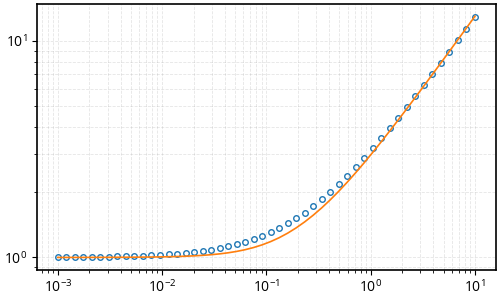

In [67]:
plt.close()
plt.figure(figsize=(5,3), constrained_layout=True)
plt.plot(-zeta, W08, 'o', fillstyle='none', ms=4)
plt.plot(-zeta, neutral_slw2(zeta, *cB));
plt.xscale('log')
plt.yscale('log')

In [8]:
lasl = np.linspace(0.4,2,100)
HD = sot.get_emp_bkw2(lasl)
cL = curve_fit(neutral_bkw2, lasl, HD)[0]
print(cL)
print(np.mean((HD - neutral_bkw2(lasl, *cL))**2))
sot.get_R2(HD,neutral_bkw2(lasl, *cL))

[0.49788999]
0.0014160309764182119


0.9871597981869016

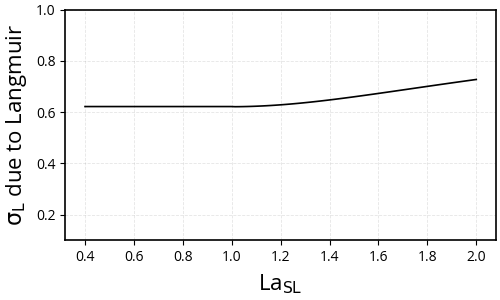

In [401]:
plt.close()
plt.figure(figsize=(5,3), constrained_layout=True)

# plt.plot(lasl, HD, 'o', fillstyle='none', ms=4)
# plt.plot(lasl, neutral_bkw2(lasl, *cs));
# plt.plot(lasl, 0.6*(1 + (1.5*lasl)**(-2) + (5.4*lasl)**(-4)));

# plt.fill_between(lasl, HD**(3/2), HD**(3/2) - 0.48**(3/2)*lasl**(-2),  alpha=0.5, lw=2)
# plt.fill_between(lasl, HD**(3/2) - 0.48**(3/2)*lasl**(-2), 0, alpha=0.5, lw=2)

# plt.plot(lasl, 0.512/HD**(3/2)); # fraction of ST wrms3 in Langmuir, no weight for ST
# plt.plot(lasl, (HD**(3/2) - 0.48**(3/2)*lasl**(-2))/0.512) # weight sigma_s for ST if no weighting for LT = 0.48*La_SL^(-4/3), combining wrms3
plt.plot(lasl, (HD - 0.48*lasl**(-4/3))/0.64, 'k') # weight sigma_s for ST if no weighting for LT = 0.48*La_SL^(-4/3), combining wrms2
# plt.plot(lasl, 0.512/(0.512 + cs[0]*lasl**(-2)), c='C1'); # weight sigma_s for ST if no weighting for LT = [cs*La_SL^(-2)]^(2/3), combining wrms3

# plt.plot(lasl, (HD**(3/2) - 0.512*0.512/(0.512 + cs[0]*lasl**(-2)))**(2/3), '--k');

plt.xlabel(r'La$_{SL}$', fontsize=16);
# plt.ylabel(r'$\sigma_w^3 \left/ u_*^3 \right.$', fontsize=16);
# plt.ylabel(r'$\sigma_w^2 \left/ u_*^2 \right.$', fontsize=16);
plt.ylabel(r'$\sigma_L$ due to Langmuir', fontsize=16);
# plt.ylim(0.5,2.5);
plt.ylim(0.1,1);

In [ ]:
# Bin w_*^2/u_*^2
pfP11 = sot.bin_stat_2d(P11.myd, P11.zoh, P11.wf2our2*P11.cfacz2, P11.ne, P11.maskBL, 
                        dof=2, Nby=20, x1=np.copysign(P11.wstar**2,P11.wstar)/P11.ustar**2, x2=1/P11.LaSL2)
pfP12 = sot.bin_stat_2d(P12.myd, P12.zoh, P12.wf2our2*P12.cfacz2, P12.ne, P12.maskBL, 
                        dof=2, Nby=20, x1=np.copysign(P12.wstar**2,P12.wstar)/P12.ustar**2, x2=1/P12.LaSL2)

pfLwa = sot.bin_stat_2d(Lwa.myd, Lwa.zoh, Lwa.wf2our2*Lwa.cfacz2, Lwa.ne, Lwa.maskBL, 
                        dof=2, Nby=20, x1=np.copysign(Lwa.wstar**2,Lwa.wstar)/Lwa.ustar**2, x2=1/Lwa.LaSL2)
pfL97 = sot.bin_stat_2d(L97.myd, L97.zoh, L97.wf2our2*L97.cfacz2, L97.ne, L97.maskBL, 
                        dof=2, Nby=20, x1=np.copysign(L97.wstar**2,L97.wstar)/L97.ustar**2, x2=1/L97.LaSL2)
pfFan = sot.bin_stat_2d(Fan.myd, Fan.zoh, Fan.wf2our2*Fan.cfacz2, Fan.ne, Fan.maskBL, 
                        dof=2, Nby=20, x1=np.copysign(Fan.wstar**2,Fan.wstar)/Fan.ustar**2, x2=1/Fan.LaSL2)

In [33]:
# Bin w_*^3/u_*^3
pfP11 = sot.bin_stat_2d(P11.myd, P11.zoh, P11.wf2our2*P11.cfac2, P11.ne, P11.maskBL,# & P11.Iequil, 
                        dof=2, Nby=20, x1=P11.wstar**3/P11.ustar**3, x2=np.maximum(1/P11.LaSL2,-100))
pfP12 = sot.bin_stat_2d(P12.myd, P12.zoh, P12.wf2our2*P12.cfac2, P12.ne, P12.maskBL,# & P12.Iequil, 
                        dof=2, Nby=20, x1=P12.wstar**3/P12.ustar**3, x2=np.maximum(1/P12.LaSL2,-100))
pfLwa = sot.bin_stat_2d(Lwa.myd, Lwa.zoh, Lwa.wf2our2*Lwa.cfac2, Lwa.ne, Lwa.maskBL,# & Lwa.Iequil, 
                        dof=2, Nby=20, x1=Lwa.wstar**3/Lwa.ustar**3, x2=np.maximum(1/Lwa.LaSL2,-100))
pfL97 = sot.bin_stat_2d(L97.myd, L97.zoh, L97.wf2our2*L97.cfac2, L97.ne, L97.maskBL,# & L97.Iequil, 
                        dof=2, Nby=20, x1=L97.wstar**3/L97.ustar**3, x2=np.maximum(1/L97.LaSL2,-100))
pfFan = sot.bin_stat_2d(Fan.myd, Fan.zoh, Fan.wf2our2*Fan.cfac2, Fan.ne, Fan.maskBL,# & Fan.Iequil, 
                        dof=2, Nby=20, x1=Fan.wstar**3/Fan.ustar**3, x2=np.maximum(1/Fan.LaSL2,-100))

In [34]:
bkP11 = pf2bk(pfP11)
bkP12 = pf2bk(pfP12)
bkFan = pf2bk(pfFan)
bkLwa = pf2bk(pfLwa)
bkL97 = pf2bk(pfL97)

In [35]:
xdata = np.concatenate([bkP11.LaSLm2[:,1], bkP12.LaSLm2[:,1], bkLwa.LaSLm2[:,1], bkL97.LaSLm2[:,1], bkFan.LaSLm2[:,1]])
ydata = np.concatenate([bkP11.wr3our3[:,1], bkP12.wr3our3[:,1], bkLwa.wr3our3[:,1], bkL97.wr3our3[:,1], bkFan.wr3our3[:,1]])
xydata = np.vstack((xdata, ydata))
zdata = np.concatenate([bkP11.phi[:,1], bkP12.phi[:,1], bkLwa.phi[:,1], bkL97.phi[:,1], bkFan.phi[:,1]])
gmask = ~np.isnan(zdata) & ~np.isnan(xdata) & ~np.isnan(ydata)
cB = 0.31**(3/2)
cBf = np.around(curve_fit(w2bk_model, xydata[:,gmask], zdata[gmask])[0],3)
cBf

array([0.127])

In [40]:
bkP11['phin'] = get_w2bk_neutral(bkP11, cB)
bkP12['phin'] = get_w2bk_neutral(bkP12, cB)
bkLwa['phin'] = get_w2bk_neutral(bkLwa, cB)
bkL97['phin'] = get_w2bk_neutral(bkL97, cB)
bkL97['phinr'] = get_w2bk_neutral(bkL97,cBf) #0.225**(3/2)
bkFan['phin'] = get_w2bk_neutral(bkFan, cB)
bkL17['phin'] = get_w2bk_neutral(bkL17, cB)

bkP11['phi_model'] = w2bk_model((bkP11.LaSLm2, bkP11.wr3our3), cB)
bkP12['phi_model'] = w2bk_model((bkP12.LaSLm2, bkP12.wr3our3), cB)
bkLwa['phi_model'] = w2bk_model((bkLwa.LaSLm2, bkLwa.wr3our3), cB)
bkL97['phi_model'] = w2bk_model((bkL97.LaSLm2, bkL97.wr3our3), cB)
bkL97['phir_model'] = w2bk_model((bkL97.LaSLm2, bkL97.wr3our3),cBf)
bkFan['phi_model'] = w2bk_model((bkFan.LaSLm2, bkFan.wr3our3), cB)
bkL17['phi_model'] = w2bk_model((bkL17.LaSLm2, bkL17.wr3our3), cB)

In [41]:
bkobs = xr.concat([bkP11.phi, bkP12.phi, bkLwa.phi, bkL97.phi, bkFan.phi], dim='point')
bkobsM = xr.concat([bkP11.phi_model, bkP12.phi_model, bkLwa.phi_model, bkL97.phir_model, bkFan.phi_model], dim='point')

In [42]:
(np.abs(bkobsM[:,1]-bkobs[:,1])/bkobs[:,1]).mean()

<xarray.DataArray ()>
array(0.07519385)
Coordinates:
    stat     <U3 'm'

In [44]:
(np.abs(bkL17.phi_model[:,:,1:]-bkL17.phi[:,:,1:])/bkL17.phi[:,:,1:]).mean()

<xarray.DataArray ()>
array(0.06716597)

/home/zhihua/miniconda3/envs/scaOSBL/lib/python3.7/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


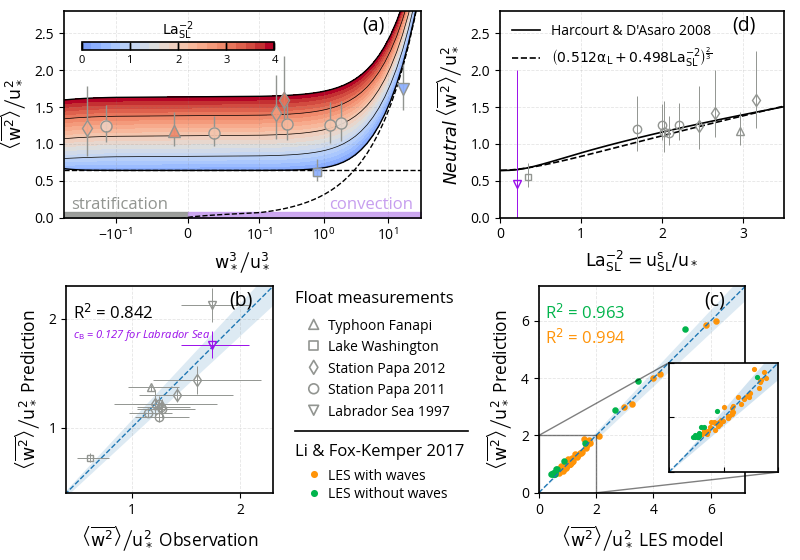

In [45]:
plt.close()
fig = plt.figure(figsize=(8,5.6))
fgrid = plt.GridSpec(14,10, fig)

x = np.concatenate([np.flip(-np.logspace(-3,-0.2)), np.logspace(-3,1.5)])[None,:] # w*^3/u*^3, only positive
y = np.linspace(0,4,21)[:,None] # LaSL^{-2}
ydum = np.linspace(1e-2,5)
w2bk_pred = w2bk_model((y,x), cB)
cmap = plt.cm.coolwarm
norm = mcl.BoundaryNorm(np.linspace(-1,4,26), cmap.N)

ax0 = fig.add_subplot(fgrid[:6,:5])
# multiline(np.tile(x,(np.size(y),1)), w2bk_pred, c=y, cmap=cmap, ax=ax0)
cw2bk = ax0.contourf(np.tile(x,(np.size(y),1)), w2bk_pred, np.tile(y,(1,np.size(x))), np.squeeze(y), cmap=cmap, norm=norm)
ax0.contour(np.tile(x,(np.size(y),1)), w2bk_pred, np.tile(y,(1,np.size(x))), np.arange(1,4), colors='k', linewidths=0.5)
ax0.plot(np.tile(x,(np.size(y),1))[[0,-1],:].T, w2bk_pred[[0,-1],:].T, c='k', lw=1)
ax0.axhline(0.64, c='k', ls='--', lw=1)
ax0.plot(x.T, np.copysign(np.cbrt(cB*x)**2,x).T, c='k', ls='--', lw=1)
ax0.errorbar(bkP11.wr3our3[:,1], bkP11.phi[:,1], yerr=bkP11.phi.diff('stat').T,# xerr=bkP11.wr3our3.diff('stat').T, 
             marker='o', ls='none', mfc='none', c='xkcd:grey', ms=8, elinewidth=1, mew=1)
ax0.errorbar(bkP12.wr3our3[:,1], bkP12.phi[:,1], yerr=bkP12.phi.diff('stat').T,# xerr=bkP12.wr3our3.diff('stat').T, 
             marker='d', ls='none', mfc='none', c='xkcd:grey', ms=8, elinewidth=1, mew=1)
ax0.errorbar(bkLwa.wr3our3[:,1], bkLwa.phi[:,1], yerr=bkLwa.phi.diff('stat').T, #xerr=bkLwa.wr3our3.diff('stat').T, 
             marker='s', ls='none', mfc='none', c='xkcd:grey', ms=6.4, elinewidth=1, mew=1)
ax0.errorbar(bkL97.wr3our3[:,1], bkL97.phi[:,1], yerr=bkL97.phi.diff('stat').T, #xerr=bkL97.wr3our3.diff('stat').T, 
             marker='v', ls='none', mfc='none', c='xkcd:grey', ms=8, elinewidth=1, mew=1)
ax0.errorbar(bkFan.wr3our3[:,1], bkFan.phi[:,1], yerr=bkFan.phi.diff('stat').T, #xerr=bkFan.wr3our3.diff('stat').T, 
             marker='^', ls='none', mfc='none', c='xkcd:grey', ms=8, elinewidth=1, mew=1)
ax0.scatter(bkP11.wr3our3[:,1], bkP11.phi[:,1], 50, bkP11.LaSLm2[:,1], cmap=cmap, norm=norm, alpha=0.9, marker='o', zorder=2);
ax0.scatter(bkP12.wr3our3[:,1], bkP12.phi[:,1], 50, bkP12.LaSLm2[:,1], cmap=cmap, norm=norm, alpha=0.9, marker='d', zorder=2);
ax0.scatter(bkLwa.wr3our3[:,1], bkLwa.phi[:,1], 40, bkLwa.LaSLm2[:,1], cmap=cmap, norm=norm, alpha=0.9, marker='s', zorder=2);
ax0.scatter(bkL97.wr3our3[:,1], bkL97.phi[:,1], 50, bkL97.LaSLm2[:,1], cmap=cmap, norm=norm, alpha=0.9, marker='v', zorder=2);
ax0.scatter(bkFan.wr3our3[:,1], bkFan.phi[:,1], 50, bkFan.LaSLm2[:,1], cmap=cmap, norm=norm, alpha=0.9, marker='^', zorder=2);
# ax0.scatter(bkL17.wr3our3, bkL17.phi, 20, bkL17.LaSLm2, cmap=cmap, norm=norm, alpha=0.9, marker='x', zorder=2);
ax0.fill_between([-1, 0], [0, 0], [0.07, 0.07], color='xkcd:grey', alpha=0.9)
ax0.fill_between([0, 40], [0, 0], [0.07, 0.07], color='xkcd:lavender', alpha=0.9)
ax0.text(0.02, 0.04, 'stratification', color='xkcd:grey', transform=ax0.transAxes, ha='left')
ax0.text(0.98, 0.04, 'convection', color='xkcd:lavender', transform=ax0.transAxes, ha='right')
ax0.text(0.9, 0.98, r'(a)', fontsize=14, transform=ax0.transAxes, ha='right', va='top', zorder=2)
ax0.set_xscale('symlog', linthresh=1e-1)
ax0.set_xlim(-0.64, 32);
ax0.set_ylim(0, 2.8)
ax0.set_xlabel(r'$w_*^3 \left/ u_*^3 \right.$')
ax0.set_ylabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$');

ax0c = inset_axes(ax0, width='100%', height='40%', bbox_to_anchor=(0.05, 0.75, 0.54, 0.1), 
                  bbox_transform=ax0.transAxes, loc='upper left', borderpad=0)
# ax0.add_patch(plt.Rectangle((0.05, 0.75), 0.54, 0.1, ls="--", ec="c", fc="none",
#                             transform=ax0.transAxes))
cbar = plt.colorbar(cw2bk, cax=ax0c, orientation='horizontal')
cbar.set_label(r'$La_{SL}^{-2}$', fontsize=10, labelpad=-34)
ax0c.tick_params(axis='x', which='major', direction='in', length=5, color='k', width=1, 
                labelbottom=True, labeltop=False, top=True, bottom=True, labelsize=8)
ax0c.xaxis.set_ticks(np.arange(0,5), major=True)

ax1 = fig.add_subplot(fgrid[:6, 6:], sharey=ax0)
sigma_L = 0.64**(3/2) / (0.64**(3/2) + 0.498*ydum)
ax1.plot(ydum, sot.get_emp_bkw2(1/np.sqrt(ydum)), c='k')
ax1.plot(ydum, (sigma_L*0.64**(3/2) + 0.498*ydum)**(2/3), '--k')
ax1.errorbar(bkP11.LaSLm2[:,1], bkP11.phin[:,1], yerr=bkP11.phin.diff('stat').T, #xerr=bkP11.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:grey', marker='o', ms=6, elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax1.errorbar(bkP12.LaSLm2[:,1], bkP12.phin[:,1], yerr=bkP12.phin.diff('stat').T, #xerr=bkP12.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:grey', marker='d', ms=6, elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax1.errorbar(bkLwa.LaSLm2[:,1], bkLwa.phin[:,1], yerr=bkLwa.phin.diff('stat').T, #xerr=bkLwa.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:grey', marker='s', ms=5, elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax1.errorbar(bkL97.LaSLm2[:,1], bkL97.phin[:,1], yerr=bkL97.phin.diff('stat').T, #xerr=bkL97.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:grey', marker='v', ms=6, elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax1.errorbar(bkL97.LaSLm2[:,1], bkL97.phinr[:,1], yerr=bkL97.phinr.diff('stat').T, #xerr=bkL97.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:violet', marker='v', ms=6, elinewidth=0.7, mew=1, ecolor='xkcd:violet')
ax1.errorbar(bkFan.LaSLm2[:,1], bkFan.phin[:,1], yerr=bkFan.phin.diff('stat').T, #xerr=bkFan.LaSLm2.diff('stat').T, 
            ls='none', mfc='none', c='xkcd:grey', marker='^', ms=6, elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax1.legend(["Harcourt & D'Asaro 2008", r'$\left( 0.512\alpha_L + 0.498La_{SL}^{-2} \right)^{\frac{2}{3}}$'], 
           fontsize=10, frameon=False, loc='upper left')
ax1.text(0.9, 0.98, r'(d)', fontsize=14, transform=ax1.transAxes, ha='right', va='top')
ax1.set_xlim(0, 3.5)
ax1.set_xlabel(r'$La_{SL}^{-2} = u^s_{SL} / u_*$');
ax1.set_ylabel(r'$\it{Neutral}$ $\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right. $');

ax2 = fig.add_subplot(fgrid[8:,3:6])
ax2.set_axis_off()
x_c1 = 0.08
x_c2 = x_c1+0.07
y_c1 = np.linspace(0.4,0.92,6)
y_c2 = np.linspace(0,0.18,3)
add_legend(ax2, x_c2, y_c1[0], 'none', 'Labrador Sea 1997', edgecolor='xkcd:grey', fontsize=10, lw=1.2, s=50, dx=0.07, marker='v')
add_legend(ax2, x_c2, y_c1[1], 'none', 'Station Papa 2011', edgecolor='xkcd:grey', fontsize=10, lw=1.2, s=50, dx=0.07, marker='o')
add_legend(ax2, x_c2, y_c1[2], 'none', 'Station Papa 2012', edgecolor='xkcd:grey', fontsize=10, lw=1.2, s=50, dx=0.07, marker='d')
add_legend(ax2, x_c2, y_c1[3], 'none', 'Lake Washington',   edgecolor='xkcd:grey', fontsize=10, lw=1.2, s=40, dx=0.07, marker='s')
add_legend(ax2, x_c2, y_c1[4], 'none', 'Typhoon Fanapi',    edgecolor='xkcd:grey', fontsize=10, lw=1.2, s=50, dx=0.07, marker='^')
ax2.text(x_c1-0.02, y_c1[5], 'Float measurements', transform=ax2.transAxes)
ax2.plot([x_c1-0.02, 0.88], [0.3, 0.3], c='k')
ax2.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.text(x_c1-0.02, y_c2[2], 'Li & Fox-Kemper 2017', transform=ax2.transAxes)
add_legend(ax2, x_c2, y_c2[1], 'xkcd:tangerine', 'LES with waves', fontsize=10, lw=1.2, s=60, dx=0.07, marker='.')
add_legend(ax2, x_c2, y_c2[0], 'xkcd:shamrock', 'LES without waves',fontsize=10, lw=1.2, s=60, dx=0.07, marker='.')

ax3 = fig.add_subplot(fgrid[8:,:3])
ax3.plot([0,3], [0,3], '--', c='C0', lw=1)
ax3.fill_between([0,3], [0,3*(1-0.075)], [0,3*1.075], color='C0', alpha=0.15, lw=0)
ax3.errorbar(bkP11.phi[:,1], bkP11.phi_model[:,1], xerr=bkP11.phi.diff('stat').T, yerr=bkP11.phi_model.diff('stat').T, 
             ms=6, mfc='none', c='xkcd:grey', ls='none', marker='o', elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax3.errorbar(bkP12.phi[:,1], bkP12.phi_model[:,1], xerr=bkP12.phi.diff('stat').T, yerr=bkP12.phi_model.diff('stat').T, 
             ms=6, mfc='none', c='xkcd:grey', ls='none', marker='d', elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax3.errorbar(bkLwa.phi[:,1], bkLwa.phi_model[:,1], xerr=bkLwa.phi.diff('stat').T, yerr=bkLwa.phi_model.diff('stat').T, 
             ms=5, mfc='none', c='xkcd:grey', ls='none', marker='s', elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax3.errorbar(bkL97.phi[:,1], bkL97.phi_model[:,1], xerr=bkL97.phi.diff('stat').T, yerr=bkL97.phi_model.diff('stat').T, 
             ms=6, mfc='none', c='xkcd:grey', ls='none', marker='v', elinewidth=0.7, mew=1, ecolor='xkcd:grey')
ax3.errorbar(bkL97.phi[:,1], bkL97.phir_model[:,1], xerr=bkL97.phi.diff('stat').T, yerr=bkL97.phir_model.diff('stat').T, 
             ms=6, mfc='none', c='xkcd:violet', ls='none', marker='v', elinewidth=0.7, mew=1, ecolor='xkcd:violet')
ax3.errorbar(bkFan.phi[:,1], bkFan.phi_model[:,1], xerr=bkFan.phi.diff('stat').T, yerr=bkFan.phi_model.diff('stat').T, 
             ms=6, mfc='none', c='xkcd:grey', ls='none', marker='^', elinewidth=0.7, mew=1, ecolor='xkcd:grey')
R2_obs = sot.get_R2(xr.concat([bkP11.phi[:,1], bkP12.phi[:,1], bkLwa.phi[:,1], bkL97.phi[:,1], bkFan.phi[:,1]], dim='point'), 
                    xr.concat([bkP11.phi_model[:,1], bkP12.phi_model[:,1], bkLwa.phi_model[:,1], bkL97.phir_model[:,1], 
                               bkFan.phi_model[:,1]], dim='point')).data
ax3.text(0.03, 0.92, f'R$^2$ = {R2_obs:.3f}', fontsize=12, transform=ax3.transAxes, ha='left', va='top')
ax3.text(0.03, 0.8, 'c$_B$ = 0.127 for Labrador Sea', fontsize=8, transform=ax3.transAxes, ha='left', va='top', 
         fontstyle='italic', color='xkcd:violet')
ax3.text(0.9, 0.98, r'(b)', fontsize=14, transform=ax3.transAxes, ha='right', va='top')
ax3.set_xlim(0.4, 2.3)
ax3.set_ylim(0.4, 2.3)
loc = plticker.MultipleLocator(base=1)
ax3.xaxis.set_major_locator(loc)
ax3.yaxis.set_major_locator(loc)
ax3.set_aspect(aspect=1)
ax3.set_ylabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$ Prediction')
ax3.set_xlabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$ Observation')

ax4 = fig.add_subplot(fgrid[8:,-4:])
ax4.plot([0,8], [0,8], '--', c='C0', lw=1)
ax4.fill_between([0,8], [0,8*(1-0.067)], [0,8*1.067], color='C0', alpha=0.15, lw=0)
ax4.scatter(bkL17.phi[:,:,1:], bkL17.phi_model[:,:,1:], 40, color='xkcd:tangerine', marker='.', lw=1.5)
ax4.scatter(bkL17.phi[:,:,0], bkL17.phi_model[:,:,0], 40, color='xkcd:shamrock', marker='.', lw=1.5)
R2_les0 = sot.get_R2(bkL17.phi[:,:,0], bkL17.phi_model[:,:,0]).data
R2_les1 = sot.get_R2(bkL17.phi[:,:,1:], bkL17.phi_model[:,:,1:]).data
ax4.text(0.03, 0.8, f'R$^2$ = {R2_les1:.3f}', color='xkcd:tangerine', fontsize=12, transform=ax4.transAxes, ha='left', va='top')
ax4.text(0.03, 0.92, f'R$^2$ = {R2_les0:.3f}', color='xkcd:shamrock', fontsize=12, transform=ax4.transAxes, ha='left', va='top')
ax4.text(0.9, 0.98, r'(c)', fontsize=14, transform=ax4.transAxes, ha='right', va='top')
ax4.set_xlim(0, 7.2)
ax4.set_ylim(0, 7.2)
loc = plticker.MultipleLocator(base=2)
ax4.xaxis.set_major_locator(loc)
ax4.yaxis.set_major_locator(loc)
ax4.set_aspect(aspect=1)
ax4.set_ylabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$ Prediction')
ax4.set_xlabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$ LES model')

ax4ins = ax4.inset_axes([0.63, 0.1, 0.53, 0.53])
ax4ins.plot([0,2], [0,2], '--', c='C0', lw=1)
ax4ins.fill_between([0,2], [0,2*0.85], [0,2*1.15], color='C0', alpha=0.2, lw=0)
ax4ins.scatter(bkL17.phi[:,:,1:], bkL17.phi_model[:,:,1:], 20, color='xkcd:tangerine', marker='.', lw=1.5)
ax4ins.scatter(bkL17.phi[:,:,0], bkL17.phi_model[:,:,0], 20, color='xkcd:shamrock', marker='.', lw=1.5)
ax4ins.set_xlim(0, 2)
ax4ins.set_ylim(0, 2)
ax4ins.set_xticklabels([])
ax4ins.set_yticklabels([])
ax4ins.tick_params(axis='x',direction='in')
ax4ins.tick_params(axis='y',direction='in')
loc = plticker.MultipleLocator(base=1)
ax4ins.xaxis.set_major_locator(loc)
ax4ins.yaxis.set_major_locator(loc)
ax4.indicate_inset_zoom(ax4ins, edgecolor='k')

plt.subplots_adjust(left=0.08, right=0.98, bottom=0.12, top=0.98, wspace=0.1, hspace=0)

plt.savefig(outfig_dir + 'phi_wwbk.png');

In [ ]:
plt.close()
plt.figure(figsize=(4,3), constrained_layout=True)

# x = np.linspace(0,10)
# plt.plot(x, ( ((0.3*x)**3 + 0.64**3) / (0.64**(3/2)+(0.3*x)**(3/2)) )**(2/3), c='xkcd:grey')

cmap = plt.cm.Spectral_r
carray = np.arange(0.6,1.45,0.05)
norm = mcl.BoundaryNorm(carray, cmap.N)

sbkw = plt.scatter(np.average(bkP11[7], axis=0, weights=bkP11[6]), np.average(bkP11[8], axis=0, weights=bkP11[6]), 10, 
         np.sqrt(np.average(bkP11[2], axis=0, weights=bkP11[6])), 'o', cmap=cmap, norm=norm, alpha=0.8);
plt.scatter(np.average(bkP12[7], axis=0, weights=bkP12[6]), np.average(bkP12[8], axis=0, weights=bkP12[6]), 10, 
         np.sqrt(np.average(bkP12[2], axis=0, weights=bkP12[6])), 'o', cmap=cmap, norm=norm, alpha=0.8);
plt.scatter(np.average(bkLwa[7], axis=0, weights=bkLwa[6]), np.average(bkLwa[8], axis=0, weights=bkLwa[6]), 10, 
         np.sqrt(np.average(bkLwa[2], axis=0, weights=bkLwa[6])), 'o', cmap=cmap, norm=norm, alpha=0.8);
plt.scatter(np.average(bkL97[7], axis=0, weights=bkL97[6]), np.average(bkL97[8], axis=0, weights=bkL97[6]), 10, 
         np.sqrt(np.average(bkL97[2], axis=0, weights=bkL97[6])), 'o', cmap=cmap, norm=norm, alpha=0.8);
plt.scatter(np.average(bkFan[7], axis=0, weights=bkFan[6]), np.average(bkFan[8], axis=0, weights=bkFan[6]), 10, 
         np.sqrt(np.average(bkFan[2], axis=0, weights=bkFan[6])), 'o', cmap=cmap, norm=norm, alpha=0.8);

cbar = plt.colorbar(sbkw)
cbar.set_label(r'$\langle \overline{w^2} \rangle$ / $u_*^2$', fontsize=16)

# plt.xlim(0, 5);
# plt.ylim(0, 2);

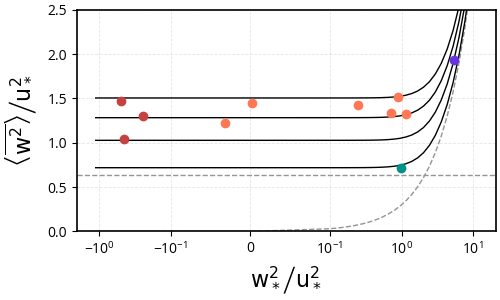

In [143]:
plt.close()
plt.figure(figsize=(5,3), constrained_layout=True)

x = np.concatenate([np.flip(-np.logspace(-3,0.05)), np.logspace(-3,1.05)])[None,:] # w*^2/u*^2, only positive
y = np.concatenate([[1e-3], np.arange(1,4)])[:,None] + 0.5 # LaSL^{-2}
cB = 0.3
HD = sot.get_emp_bkw2(1/np.sqrt(y))

plt.axhline(0.64, c='xkcd:grey', ls='--', lw=1)
plt.plot(x.T, np.maximum(cB*x,1e-4).T, c='xkcd:grey', ls='--', lw=1)

sigma_s = 0.64**(3/2) / (0.64**(3/2) + np.maximum(np.copysign((cB*np.abs(x))**(3/2),x),0))
# sigma_s = HD**(3/2) / (HD**(3/2) + np.maximum(np.copysign((cB*np.abs(x))**(3/2),x),0))
wbk_model = np.cbrt( sigma_s*0.64**(3/2) + HD**(3/2) - 0.64**(3/2) + \
                     np.maximum(np.copysign((cB*np.abs(x))**(3/2),x),0) )**2
plt.plot(np.tile(x,(np.size(y),1)).T, wbk_model.T, lw=1, c='k')

plt.plot(bkP11.wr2our2[:,1], bkP11.w2our2[:,1], 'o', c=P11.color);
plt.plot(bkP12.wr2our2[:,1], bkP12.w2our2[:,1], 'o', c=P12.color);
plt.plot(bkLwa.wr2our2[:,1], bkLwa.w2our2[:,1], 'o', c=Lwa.color);
plt.plot(bkL97.wr2our2[:,1], bkL97.w2our2[:,1], 'o', c=L97.color);
plt.plot(bkFan.wr2our2[:,1], bkFan.w2our2[:,1], 'o', c=Fan.color);

plt.xscale('symlog', linthresh=1e-1)
# plt.xscale('log')
# plt.xlim(1e-2, 15);
plt.ylim(0, 2.5)

plt.xlabel(r'$w_*^2 \left/ u_*^2 \right.$', fontsize=16)
plt.ylabel(r'$\left\langle \overline{w^2} \right\rangle \left/ u_*^2 \right.$', fontsize=16);

#### Scaling profiles of $\overline{w^2}$ in $z/h$ coordinate

In [46]:
dum_zoh = -np.logspace(-3.25, 0.05, 100)
dum_ABL_w2 = sot.get_emp_f(abs(dum_zoh), 'wrms')**2
dum_ABL_w3 = sot.get_emp_f(abs(dum_zoh), 'w3')

In [47]:
P11['rB'] = cB*P11.wstar**3/P11.ustar**3 / w2bk_model((P11.UsSL/P11.ustar, -P11.bld/kappa/P11.LObukhov), cB)**(3/2)
P12['rB'] = cB*P12.wstar**3/P12.ustar**3 / w2bk_model((P12.UsSL/P12.ustar, -P12.bld/kappa/P12.LObukhov), cB)**(3/2)
Lwa['rB'] = cB*Lwa.wstar**3/Lwa.ustar**3 / w2bk_model((Lwa.UsSL/Lwa.ustar, -Lwa.bld/kappa/Lwa.LObukhov), cB)**(3/2)
L97['rB'] = cB*L97.wstar**3/L97.ustar**3 / w2bk_model((L97.UsSL/L97.ustar, -L97.bld/kappa/L97.LObukhov), cB)**(3/2)
L97E['rB'] = cB*L97E.wstar**3/L97E.ustar**3 / w2bk_model((L97E.UsSL/L97E.ustar, -L97E.bld/kappa/L97E.LObukhov), cB)**(3/2)
Fan['rB'] = cB*Fan.wstar**3/Fan.ustar**3 / w2bk_model((Fan.UsSL/Fan.ustar, -Fan.bld/kappa/Fan.LObukhov), cB)**(3/2)

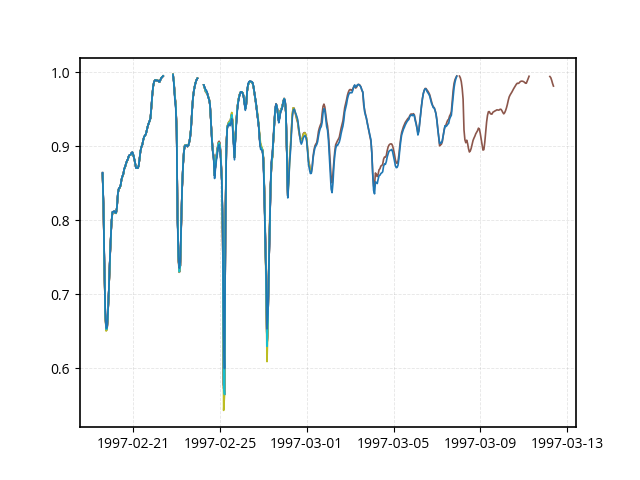

In [125]:
plt.close()
plt.figure()
plt.plot(L97.time.where(L97.ustar>=8e-3), L97.rB.T.where(L97.ustar>=8e-3));

In [48]:
#CBuoy = 5
P11['maskCBL'] = P11.maskBL & (P11.rB>0.5) #(P11.bld/P11.LObukhov*P11.ustar/P11.UsSL < -CBuoy)#P11.LaSL2 
P11['maskNBL'] = P11.maskBL & (np.abs(P11.rB)<0.5) #(np.abs(P11.bld/P11.LObukhov**P11.ustar/P11.UsSL) < CBuoy)

P12['maskCBL'] = P12.maskBL & (P12.rB>0.5) #(P12.bld/P12.LObukhov*P12.ustar/P12.UsSL < -CBuoy)
P12['maskNBL'] = P12.maskBL & (np.abs(P12.rB)<0.5) #(np.abs(P12.bld/P12.LObukhov*P12.ustar/P12.UsSL) < CBuoy)

Lwa['maskCBL'] = Lwa.maskBL & (Lwa.rB>0.5) #(Lwa.bld/Lwa.LObukhov*Lwa.LaSL2s < -CBuoy)
Lwa['maskNBL'] = Lwa.maskBL & (np.abs(Lwa.rB)<0.5) #(np.abs(Lwa.bld/Lwa.LObukhov*Lwa.LaSL2s) < CBuoy)

L97['maskCBL'] = L97.maskBL & (L97.rB>0.5) #(L97.bld/L97.LObukhov*L97.LaSL2s < -CBuoy)
L97['maskNBL'] = L97.maskBL & (np.abs(L97.rB)<0.5) #(np.abs(L97.bld/L97.LObukhov*L97.LaSL2s) < CBuoy)

L97E['maskCBL'] = L97E.maskBL & (L97E.rB>0.5) #(L97E.bld/L97E.LObukhov*L97E.LaSL2s < -CBuoy)
L97E['maskNBL'] = L97E.maskBL & (np.abs(L97E.rB)<0.5) #(np.abs(L97E.bld/L97E.LObukhov*L97E.LaSL2s) < CBuoy)

Fan['maskCBL'] = Fan.maskBL & (Fan.rB>0.5) #(Fan.bld/Fan.LObukhov*Fan.LaSL2s < -CBuoy)
Fan['maskNBL'] = Fan.maskBL & (np.abs(Fan.rB)<0.5) #(np.abs(Fan.bld/Fan.LObukhov*Fan.LaSL2s) < CBuoy)

# L98['maskCBL'] = L98.bld/L98.LObukhov <= -10
# L98['maskNBL'] = np.abs(L98.bld/L98.LObukhov) < 10

In [49]:
DOF = 5
bP11c = sot.bin_stat_1d(P11.zoh, P11.wf2owr2*P11.cfac2, n=P11.ne, mask=P11.maskCBL, dof=DOF)#, x1=P11.stds/P11.bld, x2=P11.LaSL2)
bLwac = sot.bin_stat_1d(Lwa.zoh, Lwa.wf2owr2*Lwa.cfac2, n=Lwa.ne, mask=Lwa.maskCBL, dof=DOF)#, x1=Lwa.stds/Lwa.bld, x2=Lwa.LaSL2)
bL97c = sot.bin_stat_1d(L97.zoh, L97.wf2owr2*L97.cfac2, n=L97.ne, mask=L97.maskCBL, dof=DOF)#, x1=L97.stds/L97.bld, x2=L97.LaSL2)
bL97Ec = sot.bin_stat_1d(L97E.zoh, L97E.wf2owr2*L97E.cfac2, n=L97E.ne, mask=L97E.maskCBL, dof=DOF)#, x1=L97E.stds/L97E.bld, x2=L97E.LaSL2)

DOF = 5
bP11n = sot.bin_stat_1d(P11.zoh, P11.wf2our2*P11.cfac2, n=P11.ne, mask=P11.maskNBL, dof=10, x1=P11.stds/P11.bld)#, x2=P11.wstar**2)
bP12n = sot.bin_stat_1d(P12.zoh, P12.wf2our2*P12.cfac2, n=P12.ne, mask=P12.maskNBL, dof=10, x1=P12.stds/P12.bld)#, x2=P12.wstar**2)
bLwan = sot.bin_stat_1d(Lwa.zoh, Lwa.wf2our2*Lwa.cfac2, n=Lwa.ne, mask=Lwa.maskNBL, dof=DOF, x1=Lwa.stds/Lwa.bld)#, x2=Lwa.wstar**2)
bFann = sot.bin_stat_1d(Fan.zoh, Fan.wf2our2*Fan.cfac2, n=Fan.ne, mask=Fan.maskNBL, dof=DOF, x1=Fan.stds/Fan.bld)#, x2=Fan.wstar**2)

In [111]:
pw2c = curve_fit(convective_w2, np.hstack([bL97c.x.m,bLwac.x.m]), np.hstack([bL97c.y.s,bLwac.y.s]))[0]
pw2c

array([1.55425187, 0.82599351])

In [125]:
DOF = 5
bP11c = sot.bin_stat_1d(P11.zoh, P11.wf2owr2, n=P11.ne, mask=P11.maskCBL, dof=DOF)#, x1=P11.stds/P11.bld, x2=P11.LaSL2)
bP12c = sot.bin_stat_1d(P12.zoh, P12.wf2owr2, n=P12.ne, mask=P12.maskCBL, dof=DOF)#, x1=P12.stds/P12.bld, x2=P12.LaSL2)
bLwac = sot.bin_stat_1d(Lwa.zoh, Lwa.wf2owr2, n=Lwa.ne, mask=Lwa.maskCBL, dof=DOF)#, x1=Lwa.stds/Lwa.bld, x2=Lwa.LaSL2)
bL97c = sot.bin_stat_1d(L97.zoh, L97.wf2owr2, n=L97.ne, mask=L97.maskCBL, dof=DOF)#, x1=L97.stds/L97.bld, x2=L97.LaSL2)
bL97Ec = sot.bin_stat_1d(L97E.zoh, L97E.wf2owr2, n=L97E.ne, mask=L97E.maskCBL, dof=DOF)#, x1=L97E.stds/L97E.bld, x2=L97E.LaSL2)

DOF = 5
bP11n = sot.bin_stat_1d(P11.zoh, P11.wf2our2, n=P11.ne, mask=P11.maskNBL, dof=15)#, x1=P11.stds/P11.bld, x2=P11.LaSL2)
bP12n = sot.bin_stat_1d(P12.zoh, P12.wf2our2, n=P12.ne, mask=P12.maskNBL, dof=15)#, x1=P12.stds/P12.bld, x2=P12.LaSL2)
bLwan = sot.bin_stat_1d(Lwa.zoh, Lwa.wf2our2, n=Lwa.ne, mask=Lwa.maskNBL, dof=DOF)#, x1=Lwa.stds/Lwa.bld, x2=Lwa.LaSL2)
bFann = sot.bin_stat_1d(Fan.zoh, Fan.wf2our2, n=Fan.ne, mask=Fan.maskNBL, dof=DOF)#, x1=Fan.stds/Fan.bld, x2=Fan.LaSL2)

In [50]:
P11n_stdsoh = bP11n.x1.mean()
P12n_stdsoh = bP12n.x1.mean()
Fann_stdsoh = bFann.x1.mean()

P11nzm = bP11n.x.loc[bP11n.y.s.idxmax()]
P12nzm = bP12n.x.loc[bP12n.y.s.idxmax()]
Fannzm = bFann.x.loc[bFann.y.s.idxmax()]

In [51]:
def linear_fit(x, a, b):
    return a + b*x

In [70]:
pm

array([-1.86240916e-03,  4.02339810e+00])

In [52]:
pm,pcov = curve_fit(linear_fit, [P11n_stdsoh.m, P12n_stdsoh.m, Fann_stdsoh.m], 
                                [-P11nzm.m, -P12nzm.m, -Fannzm.m])
pmerr = np.sqrt(np.diag(pcov))

/home/zhihua/miniconda3/envs/scaOSBL/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


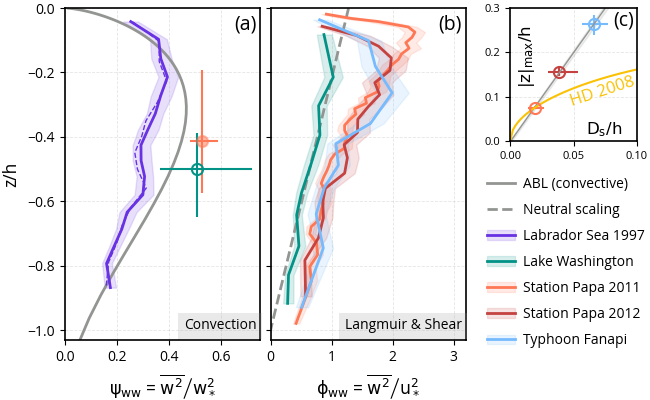

In [69]:
plt.close()
fig = plt.figure(figsize=(6.5,4), constrained_layout=True)
fgrid = plt.GridSpec(5,34, fig, hspace=0)

## test removing mean w in zeta bins
# plt.plot(bP11.x.m, bP11.y.s - bndwour.y.s**2, 'ok', ms=6, mfc='none')
## test removing mean w in zeta bins

ax0 = plt.subplot(fgrid[:, :12])
ABL_cline, = ax0.plot(dum_ABL_w2, dum_zoh, lw=2, c='xkcd:grey')
# ax0.plot(1.08**2*(abs(dum_zoh))**(2/3)*(1+0.9*dum_zoh)**(2/3), dum_zoh, lw=2, c='xkcd:yellow')
# ax0.plot(convective_w2(dum_zoh, *pw2c), dum_zoh, lw=2, c='xkcd:peach')
# ax0.plot((1.2*abs(dum_zoh))**(2/3)*(1+0.9*dum_zoh), dum_zoh, lw=2, c='xkcd:ocean')

plot_binprof(bP11c, c=P11.color, axis=ax0) # DOF < 5
eL97 = plot_binprof(bL97c, c=L97.color, axis=ax0)
eL97E = plot_binprof(bL97Ec, c=L97.color, axis=ax0, ls='--', alpha=0, lw=1)
plot_binprof(bLwac, c=Lwa.color, axis=ax0)

ax1 = plt.subplot(fgrid[:, 12:24])
# ABL_nline, = ax1.plot((1+np.linspace(-1,0))**(1/2), np.linspace(-1,0), 
#                       c='xkcd:grey', lw=2, ls='--') # Stull 1988
ABL_nline, = ax1.plot(1.28*(1+dum_zoh), dum_zoh, lw=2, c='xkcd:grey', ls='--')
eP11 = plot_binprof(bP11n, c=P11.color, axis=ax1)
# ax1.plot(((1+np.maximum(dum_zoh,0))**(1/2)**(3/2) + (dum_ABL_w2*bP11n.x2.m.mean()/bP11n.x1.m.mean())**(3/2))**(2/3), 
#          dum_zoh, c=P11.color, ls='--')

eP12 = plot_binprof(bP12n, c=P12.color, axis=ax1)
# ax1.plot(((1+np.maximum(dum_zoh,0))**(1/2)**(3/2) + (dum_ABL_w2*bP12n.x2.m.mean()/bP12n.x1.m.mean())**(3/2))**(2/3), 
#          dum_zoh, c=P12.color, ls='--')

eLwa = plot_binprof(bLwan, c=Lwa.color, axis=ax1)
# ax1.plot(((1+np.maximum(dum_zoh,0))**(1/2)**(3/2) + (dum_ABL_w2*bLwan.x2.m.mean()/bLwan.x1.m.mean())**(3/2))**(2/3), 
#          dum_zoh, c=Lwa.color, ls='--')

# plot_binprof(bL97n, c=L97.color, axis=ax1)
# ax1.plot(((1+np.maximum(dum_zoh,0))**(1/2)**(3/2) + (dum_ABL_w2*bL97n.x2.m.mean()/bL97n.x1.m.mean())**(3/2))**(2/3), 
#          dum_zoh, c=L97.color, ls='--')
# plot_binprof(bL97En, c=L97.color, axis=ax1, ls='--', alpha=0, lw=1)

eFan = plot_binprof(bFann, c=Fan.color, axis=ax1)
# ax1.plot(((1+np.maximum(dum_zoh,0))**(1/2)**(3/2) + (dum_ABL_w2*bFann.x2.m.mean()/bFann.x1.m.mean())**(3/2))**(2/3), 
#          dum_zoh, c=Fan.color, ls='--')

# ax1.plot(-10*np.linspace(-1,0)*(1+np.linspace(-1,0))**2, np.linspace(-1,0), c='xkcd:mango', lw=1) # KPP shape

# ABL (stratified)
# ax1.plot(1*(1+np.linspace(-1,0))**(3/2), np.linspace(-1,0), c='k', lw=1.5) # Nieuwstadt et al 1984
# ax2.plot(3.1*(1+np.linspace(-1,0))**1.75, np.linspace(-1,0), c='xkcd:grey', lw=1.5) # Lenschow et al 1988

ax4 = plt.subplot(fgrid[:2, 26:])
ax4.errorbar(P11n_stdsoh.m, -P11nzm.m, 
             xerr=np.array([P11n_stdsoh.m-P11n_stdsoh.ml, P11n_stdsoh.mu-P11n_stdsoh.m]).reshape(2,-1),
             yerr=np.array([P11nzm.m-P11nzm.ml, P11nzm.mu-P11nzm.m]).reshape(2,-1), 
             ms=8, mfc='none', c=P11.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=P11.color);
ax4.errorbar(P12n_stdsoh.m, -P12nzm.m, 
             xerr=np.array([P12n_stdsoh.m-P12n_stdsoh.ml, P12n_stdsoh.mu-P12n_stdsoh.m]).reshape(2,-1),
             yerr=np.array([P12nzm.m-P12nzm.ml, P12nzm.mu-P12nzm.m]).reshape(2,-1), 
             ms=8, mfc='none', c=P12.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=P12.color);
ax4.errorbar(Fann_stdsoh.m, -Fannzm.m, 
             xerr=np.array([Fann_stdsoh.m-Fann_stdsoh.ml, Fann_stdsoh.mu-Fann_stdsoh.m]).reshape(2,-1),
             yerr=np.array([Fannzm.m-Fannzm.ml, Fannzm.mu-Fannzm.m]).reshape(2,-1), 
             ms=8, mfc='none', c=Fan.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=Fan.color)
ax4.plot(np.linspace(0,0.1), linear_fit(np.linspace(0,0.1), *pm), 'xkcd:grey', lw=1)
ax4.fill_between(np.linspace(0,0.1), linear_fit(np.linspace(0,0.1), *(pm-pmerr)), 
                              linear_fit(np.linspace(0,0.1), *(pm+pmerr)), alpha=0.15, color='xkcd:grey')
ax4.plot(np.linspace(0,0.1), 0.22*np.sqrt(np.tanh(6*np.linspace(0,0.1))), c='xkcd:goldenrod', lw=1.5)
ax4.text(0.1, 0.15, 'HD 2008', fontsize=12, rotation=18, color='xkcd:goldenrod', ha='right',va='top')
ax4.text(0.005, 0.12, r'$|z|_{max}/h$', fontsize=12, rotation=90, ha='left',va='bottom')
ax4.text(0.06, 0.005, r'$D_s/h$', fontsize=12, ha='left',va='bottom')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax4.set_xlim(0, 0.1)
ax4.set_ylim(0, 0.3)
ax0.set_ylim(-1.03, 0)
ax1.set_ylim(-1.03, 0)
# ax2.set_ylim(-1.03, 0)
ax0.set_xlim(0, 0.75)
ax1.set_xlim(0, 3.2)
# ax2.set_xlim(0, 3.78)
ax0.set_ylabel('z/h')
ax0.set_xlabel(r'$\psi_{ww}$ = $\overline{w^2} \left/ w_*^2 \right.$')
ax1.set_xlabel(r'$\phi_{ww}$ = $\overline{w^2} \left/ u_*^2 \right.$')
# ax4.set_ylabel(r'$|z|_{max}/h$', fontsize=10);
# ax4.set_xlabel(r'$D_s/h$', fontsize=10);
ax1.yaxis.set_ticklabels([])
ax0.text(0.98, 0.98, '(a)', fontsize=14, ha='right', va='top', transform=ax0.transAxes);
ax1.text(0.98, 0.98, '(b)', fontsize=14, ha='right', va='top', transform=ax1.transAxes);
ax4.text(0.98, 0.98, '(c)', fontsize=14, ha='right', va='top', transform=ax4.transAxes);
t_ax0 = ax0.text(0.98, 0.02, 'Convection', fontsize=10, ha='right', va='bottom', transform=ax0.transAxes);
t_ax0.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'))
t_ax1 = ax1.text(0.98, 0.02, 'Langmuir & Shear', fontsize=10, ha='right', va='bottom', transform=ax1.transAxes);
t_ax1.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'))

ax2 = plt.subplot(fgrid[2:, 24:])
ax2.legend([ABL_cline, ABL_nline, eL97, eLwa, eP11, eP12, eFan], 
           [r'ABL (convective)', 'Neutral scaling', # (Lenschow et al. 1980)
            'Labrador Sea 1997', #'Labrador Sea 1998',
            'Lake Washington',
            'Station Papa 2011', 'Station Papa 2012',
            'Typhoon Fanapi'],
           markerscale=1, fontsize=10, handler_map={ABL_cline:HandlerLine2D(marker_pad=0)}, 
           frameon=False, loc='lower right', borderaxespad=-1, handletextpad=0.6, labelspacing=0.8);
ax2.yaxis.set_ticklabels([])
ax2.set_axis_off()
plt.subplots_adjust(left=0.1, right=0.98, bottom=0.15, top=0.98, wspace=1.5, hspace=0)

plt.savefig(outfig_dir + 'psi_phi_ww_1d_zoh.png');

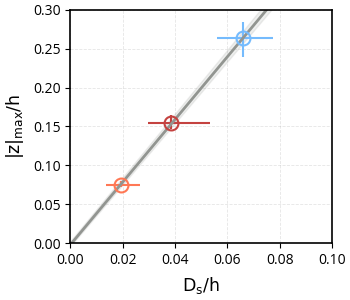

In [37]:
plt.close()
plt.figure(figsize=(3.5,3), constrained_layout=True)

plt.errorbar(P11n_stdsoh.m, -P11nzm.m, 
             xerr=np.array([P11n_stdsoh.m-P11n_stdsoh.ml, P11n_stdsoh.mu-P11n_stdsoh.m]).reshape(2,-1),
             yerr=np.array([P11nzm.m-P11nzm.ml, P11nzm.mu-P11nzm.m]).reshape(2,-1), 
             ms=10, mfc='none', c=P11.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=P11.color);

plt.errorbar(P12n_stdsoh.m, -P12nzm.m, 
             xerr=np.array([P12n_stdsoh.m-P12n_stdsoh.ml, P12n_stdsoh.mu-P12n_stdsoh.m]).reshape(2,-1),
             yerr=np.array([P12nzm.m-P12nzm.ml, P12nzm.mu-P12nzm.m]).reshape(2,-1), 
             ms=10, mfc='none', c=P12.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=P12.color);

plt.errorbar(Fann_stdsoh.m, -Fannzm.m, 
             xerr=np.array([Fann_stdsoh.m-Fann_stdsoh.ml, Fann_stdsoh.mu-Fann_stdsoh.m]).reshape(2,-1),
             yerr=np.array([Fannzm.m-Fannzm.ml, Fannzm.mu-Fannzm.m]).reshape(2,-1), 
             ms=10, mfc='none', c=Fan.color, ls='none', marker='o', elinewidth=1.5, mew=1.5, ecolor=Fan.color)

plt.xlim(0, 0.1);
plt.ylim(0, 0.3)
plt.ylabel(r'$|z|_{max}/h$');
plt.xlabel(r'$D_s/h$');
# plt.savefig(outfig_dir + 'phi_ww_max_depth.png');

#### Scaling profiles of $\overline{w^3}$

In [97]:
DOF = 10
bP11n = sot.bin_stat_1d(P11.zoh, P11.wf3, n=P11.ne, dof=15, mask=P11.maskCBL, x1=P11.Lat2, z2=P11.LaSL2)
bP12n = sot.bin_stat_1d(P12.zoh, P12.wf3, n=P12.ne, dof=15, mask=P12.maskCBL, x1=P12.Lat2, z2=P12.LaSL2)
bLwan = sot.bin_stat_1d(Lwa.zoh, Lwa.wf3, n=Lwa.ne, dof=DOF, mask=Lwa.maskCBL, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bL97n = sot.bin_stat_1d(L97.zoh, L97.wf3, n=L97.ne, dof=DOF, mask=L97.maskCBL, x1=L97.Lat2, z2=L97.LaSL2)

bP11p = sot.bin_stat_1d(P11.zoh, P11.wf3, n=P11.ne, mask=P11.maskNBL, dof=15, x1=P11.Lat2, z2=P11.LaSL2)
bP12p = sot.bin_stat_1d(P12.zoh, P12.wf3, n=P12.ne, mask=P12.maskNBL, dof=15, x1=P12.Lat2, z2=P12.LaSL2)
bLwap = sot.bin_stat_1d(Lwa.zoh, Lwa.wf3, n=Lwa.ne, mask=Lwa.maskNBL, dof=DOF, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bL97p = sot.bin_stat_1d(L97.zoh, L97.wf3, n=L97.ne, mask=L97.maskNBL, dof=DOF, x1=L97.Lat2, z2=L97.LaSL2)
bFanp = sot.bin_stat_1d(Fan.zoh, Fan.wf3, n=Fan.ne, mask=Fan.maskNBL, dof=DOF, x1=Fan.Lat2, z2=Fan.LaSL2)

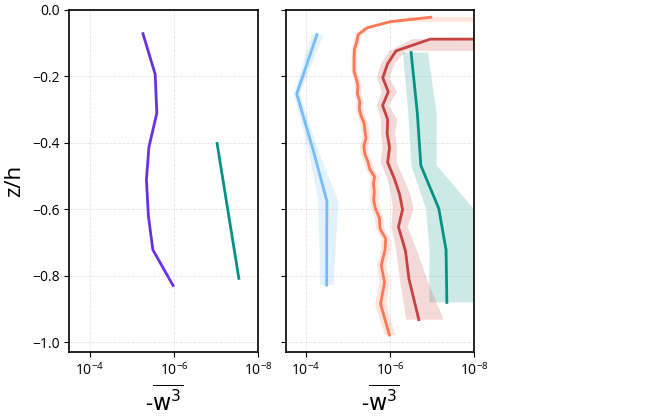

In [9]:
plt.close()
fig = plt.figure(figsize=(6.5,4.2), constrained_layout=True)
fgrid = plt.GridSpec(1,34, fig, hspace=0)

ax0 = plt.subplot(fgrid[:, :12])
ax0.axvline(0, c='k', ls=':')
eLwa_line, = ax0.plot(-bLwan.y.s, bLwan.x.m, c=Lwa.color, lw=2)
eLwa_patch = ax0.fill_betweenx(bLwan.x.m, bLwan.y.sl, bLwan.y.su, alpha=0.2, color=Lwa.color, ec='none')
eL97_line, = ax0.plot(-bL97n.y.s, bL97n.x.m, c=L97.color, lw=2)
eL97_patch = ax0.fill_betweenx(bL97n.x.m, bL97n.y.sl, bL97n.y.su, alpha=0.2, color=L97.color)
# eL98_line, = ax[0].plot(skewL98.y.s, skewL98.x.m, c=L98.color, lw=2)
# eL98_patch = ax[0].fill_betweenx(skewL98.x.m, skewL98.y.sl, skewL98.y.su, alpha=0.05, color=L98.color)
# eP11_line, = ax0.plot(bP11n.y.s, bP11n.x.m, c=P11.color, lw=2)
# eP11_patch = ax0.fill_betweenx(bP11n.x.m, bP11n.y.sl, bP11n.y.su, alpha=0.1, color=P11.color, ec='none')
# eP12_line, = ax0.plot(bP12n.y.s, bP12n.x.m, c=P12.color, lw=2)
# eP12_patch = ax0.fill_betweenx(bP12n.x.m, bP12n.y.sl, bP12n.y.su, alpha=0.1, color=P12.color, ec='none')
# eFan_line, = ax0.plot(bFann.y.s, bFann.x.m, c=Fan.color, lw=2)
# eFan_patch = ax0.fill_betweenx(bFann.x.m, bFann.y.sl, bFann.y.su, alpha=0.1, color=Fan.color, ec='none')

ax1 = plt.subplot(fgrid[:, 12:24])
ax1.axvline(0, c='k', ls=':')
ax1.plot(-bLwap.y.s, bLwap.x.m, c=Lwa.color, lw=2)
ax1.fill_betweenx(bLwap.x.m, -bLwap.y.sl, -bLwap.y.su, alpha=0.2, color=Lwa.color, ec='none')
ax1.plot(-bL97p.y.s, bL97p.x.m, c=L97.color, lw=2)
ax1.fill_betweenx(bL97p.x.m, -bL97p.y.sl, -bL97p.y.su, alpha=0.2, color=L97.color)
ax1.plot(-bP11p.y.s, bP11p.x.m, c=P11.color, lw=2)
ax1.fill_betweenx(bP11p.x.m, -bP11p.y.sl, -bP11p.y.su, alpha=0.2, color=P11.color, ec='none')
ax1.plot(-bP12p.y.s, bP12p.x.m, c=P12.color, lw=2)
ax1.fill_betweenx(bP12p.x.m, -bP12p.y.sl, -bP12p.y.su, alpha=0.2, color=P12.color, ec='none')
ax1.plot(-bFanp.y.s, bFanp.x.m, c=Fan.color, lw=2)
ax1.fill_betweenx(bFanp.x.m, -bFanp.y.sl, -bFanp.y.su, alpha=0.2, color=Fan.color, ec='none')


ax0.set_xscale('log')
ax1.set_xscale('log')
ax0.set_xlim(3e-4, 1e-8)
ax1.set_xlim(3e-4, 1e-8)
ax0.set_ylim(-1.03, 0)
ax1.set_ylim(-1.03, 0)
# ax[0].set_xlim(-10.2, 5.2)
ax0.set_ylabel('z/h', fontsize=16)
ax0.set_xlabel(r'-$\overline{w^3}$',fontsize=16)
ax1.set_xlabel(r'-$\overline{w^3}$',fontsize=16);
ax1.yaxis.set_ticklabels([]);
# plt.rcParams['text.usetex'] = True
# ax[0].set_xlabel(r'$\overline{w^3} \left/ (\overline{w^2})^{3/2} \right.$',fontsize=16);
# ax[1].set_xlabel(r'$\overline{w^3} \left/ (\overline{w^2})^{3/2} \right.$',fontsize=16);
# ax[2].set_xlabel(r'$\overline{w^3} \left/ (\overline{w^2})^{3/2} \right.$',fontsize=16);
# plt.rcParams['text.usetex'] = False
# ax[0].set_xlabel(r'$<w^3>$',fontsize=16);

#### Scaling profiles of normalized $\overline{w^3}$ and w skewness

In [39]:
DOF = 5
bP11c = sot.bin_stat_1d(P11.zoh, P11.wf3/P11.wstar**3, n=P11.ne, dof=DOF, mask=P11.maskCBL)#, x1=P11.Lat2, z2=P11.LaSL2)
bLwac = sot.bin_stat_1d(Lwa.zoh, Lwa.wf3/Lwa.wstar**3, n=Lwa.ne, dof=DOF, mask=Lwa.maskCBL)#, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bL97c = sot.bin_stat_1d(L97.zoh, L97.wf3/L97.wstar**3, n=L97.ne, dof=DOF, mask=L97.maskCBL)#, x1=L97.Lat2, z2=L97.LaSL2)
bL97Ec = sot.bin_stat_1d(L97E.zoh, L97E.wf3/L97E.wstar**3, n=L97E.ne, dof=DOF, mask=L97E.maskCBL)#, x1=L97E.Lat2, z2=L97E.LaSL2)

DOF = 5
bP11n = sot.bin_stat_1d(P11.zoh, P11.wf3/P11.ustar**3, n=P11.ne, mask=P11.maskNBL, dof=10)#, x1=P11.Lat2, z2=P11.LaSL2)
bP12n = sot.bin_stat_1d(P12.zoh, P12.wf3/P12.ustar**3, n=P12.ne, mask=P12.maskNBL, dof=10)#, x1=P12.Lat2, z2=P12.LaSL2)
bLwan = sot.bin_stat_1d(Lwa.zoh, Lwa.wf3/Lwa.ustar**3, n=Lwa.ne, mask=Lwa.maskNBL, dof=DOF)#, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bFann = sot.bin_stat_1d(Fan.zoh, Fan.wf3/Fan.ustar**3, n=Fan.ne, mask=Fan.maskNBL, dof=DOF)#, x1=Fan.Lat2, z2=Fan.LaSL2)

In [40]:
DOF = 5
bP11Sc = sot.bin_stat_1d(P11.zoh, [P11.wf3/P11.wstar**3,P11.wf2owr2*P11.cfac2], n=P11.ne, dof=DOF, mask=P11.maskCBL, ystat=sot.wt_skew)#, x1=P11.Lat2, z2=P11.LaSL2)
bLwaSc = sot.bin_stat_1d(Lwa.zoh, [Lwa.wf3/Lwa.wstar**3,Lwa.wf2owr2*Lwa.cfac2], n=Lwa.ne, dof=DOF, mask=Lwa.maskCBL, ystat=sot.wt_skew)#, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bL97Sc = sot.bin_stat_1d(L97.zoh, [L97.wf3/L97.wstar**3,L97.wf2owr2*L97.cfac2], n=L97.ne, dof=DOF, mask=L97.maskCBL, ystat=sot.wt_skew)#, x1=L97.Lat2, z2=L97.LaSL2)
bL97ESc = sot.bin_stat_1d(L97E.zoh, [L97E.wf3/L97E.wstar**3,L97E.wf2owr2*L97E.cfac2], n=L97E.ne, dof=DOF, mask=L97E.maskCBL, ystat=sot.wt_skew)#, x1=L97E.Lat2, z2=L97E.LaSL2)

DOF = 5
bP11Sn = sot.bin_stat_1d(P11.zoh, [P11.wf3/P11.ustar**3,P11.wf2our2*P11.cfac2], n=P11.ne, mask=P11.maskNBL, dof=10, ystat=sot.wt_skew)#, x1=P11.Lat2, z2=P11.LaSL2)
bP12Sn = sot.bin_stat_1d(P12.zoh, [P12.wf3/P12.ustar**3,P12.wf2our2*P12.cfac2], n=P12.ne, mask=P12.maskNBL, dof=10, ystat=sot.wt_skew)#, x1=P12.Lat2, z2=P12.LaSL2)
bLwaSn = sot.bin_stat_1d(Lwa.zoh, [Lwa.wf3/Lwa.ustar**3,Lwa.wf2our2*Lwa.cfac2], n=Lwa.ne, mask=Lwa.maskNBL, dof=DOF, ystat=sot.wt_skew)#, x1=Lwa.Lat2, z2=Lwa.LaSL2)
bFanSn = sot.bin_stat_1d(Fan.zoh, [Fan.wf3/Fan.ustar**3,Fan.wf2our2*Fan.cfac2], n=Fan.ne, mask=Fan.maskNBL, dof=DOF, ystat=sot.wt_skew)#, x1=Fan.Lat2, z2=Fan.LaSL2)

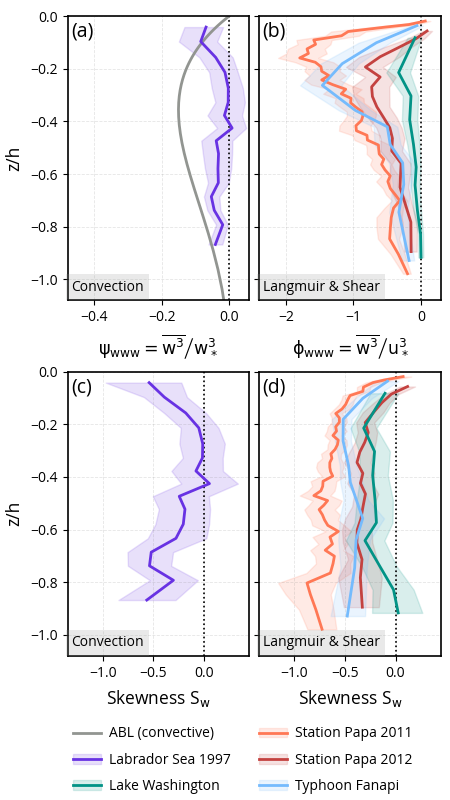

In [41]:
plt.close()
fig = plt.figure(figsize=(4.5,8))
fgrid = plt.GridSpec(2,24, fig)

ax0 = plt.subplot(fgrid[0, :12])
ax0.axvline(0, c='k', ls=':')
ABL_cline, = ax0.plot(-dum_ABL_w3, dum_zoh, lw=2, c='xkcd:grey')
# ABL_patch = plt.fill_between(dum_zeta, dum_phi_VTKE_low, dum_phi_VTKE_high,
#                  color='xkcd:purplish grey', alpha=0.15)
# plot_binprof(bP11c, c=P11.color, axis=ax0) # DOF < 5
eL97 = plot_binprof(bL97c, c=L97.color, axis=ax0)
# plot_binprof(bL97Ec, c=L97.color, axis=ax0, ls='--', alpha=0, lw=1)
# plot_binprof(bLwac, c=Lwa.color, axis=ax0)

ax1 = plt.subplot(fgrid[0, 12:])
ax1.axvline(0, c='k', ls=':')
# ABL_nline, = ax1.plot((1+np.linspace(-1,0))**(1/2), np.linspace(-1,0), 
#                       c='xkcd:grey', lw=2, ls='--') # Stull 1988
eP11 = plot_binprof(bP11n, c=P11.color, axis=ax1)
eP12 = plot_binprof(bP12n, c=P12.color, axis=ax1)
eLwa = plot_binprof(bLwan, c=Lwa.color, axis=ax1)
eFan = plot_binprof(bFann, c=Fan.color, axis=ax1)

# skewness
ax2 = plt.subplot(fgrid[1, :12])
ax2.axvline(0, c='k', ls=':')
# plot_binprof(bP11Sc, c=P11.color, axis=ax2) # DOF < 5
plot_binprof(bL97Sc, c=L97.color, axis=ax2)
# plot_binprof(bL97ESc, c=L97.color, axis=ax2, ls='--', alpha=0, lw=1)
# plot_binprof(bLwaSc, c=Lwa.color, axis=ax2)

ax3 = plt.subplot(fgrid[1, 12:])
ax3.axvline(0, c='k', ls=':')
plot_binprof(bP11Sn, c=P11.color, axis=ax3)
plot_binprof(bP12Sn, c=P12.color, axis=ax3)
plot_binprof(bLwaSn, c=Lwa.color, axis=ax3)
plot_binprof(bFanSn, c=Fan.color, axis=ax3)

ax0.set_xlim(-0.48, 0.06)
ax1.set_xlim(-2.4, 0.3)
ax2.set_xlim(-1.35, 0.45)
ax3.set_xlim(-1.35, 0.45)
ax0.set_ylim(-1.08, 0)
ax1.set_ylim(-1.08, 0)
ax2.set_ylim(-1.08, 0)
ax3.set_ylim(-1.08, 0)
ax0.set_ylabel('z/h')
ax2.set_ylabel('z/h')
ax0.set_xlabel(r'$\psi_{www} = \overline{w^3} \left/ w_*^3 \right.$')
ax1.set_xlabel(r'$\phi_{www} = \overline{w^3} \left/ u_*^3 \right.$')
ax2.set_xlabel(r'Skewness S$_w$')
ax3.set_xlabel(r'Skewness S$_w$')
ax1.yaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax0.text(0.02, 0.98, '(a)', fontsize=14, ha='left', va='top', transform=ax0.transAxes);
ax1.text(0.02, 0.98, '(b)', fontsize=14, ha='left', va='top', transform=ax1.transAxes);
ax2.text(0.02, 0.98, '(c)', fontsize=14, ha='left', va='top', transform=ax2.transAxes);
ax3.text(0.02, 0.98, '(d)', fontsize=14, ha='left', va='top', transform=ax3.transAxes);
t_ax0 = ax0.text(0.02, 0.02, 'Convection', fontsize=10, ha='left', va='bottom', transform=ax0.transAxes)
t_ax0.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'))
t_ax1 = ax1.text(0.02, 0.02, 'Langmuir & Shear', fontsize=10, ha='left', va='bottom', transform=ax1.transAxes)
t_ax1.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'));
t_ax2 = ax2.text(0.02, 0.02, 'Convection', fontsize=10 , ha='left', va='bottom', transform=ax2.transAxes)
t_ax2.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'))
t_ax3 = ax3.text(0.02, 0.02, 'Langmuir & Shear', fontsize=10, ha='left', va='bottom', transform=ax3.transAxes)
t_ax3.set_bbox(dict(facecolor='xkcd:grey', alpha=0.2, edgecolor='none'));

plt.subplots_adjust(left=0.15, right=0.98, bottom=0.18, top=0.98, wspace=1.5, hspace=0.25)
ax4 = fig.add_axes([0.08, 0, 0.92, 0.1])
ax4.legend([ABL_cline, eL97, eLwa, eP11, eP12, eFan], 
           [r'ABL (convective)', # (Lenschow et al. 1980)
            'Labrador Sea 1997', #'Labrador Sea 1998',
            'Lake Washington',
            'Station Papa 2011', 'Station Papa 2012',
            'Typhoon Fanapi'],
           markerscale=1, fontsize=10, handler_map={ABL_cline:HandlerLine2D(marker_pad=0)}, 
           frameon=False, loc='center', borderaxespad=0, handletextpad=0.6, labelspacing=0.8, 
           ncol=2);
ax4.yaxis.set_ticklabels([])
ax4.set_axis_off()

plt.savefig(outfig_dir + 'psi_phi_www_skew_1d_zoh_noscatter.png');